In [1]:
%load_ext autoreload
%autoreload 2

import os
import gym 
from matplotlib import pyplot as plt
import numpy as np
from ddpg_torch.ddpg_agent import Agent
from envs.escape_room_continuous_space_env import EscapeRoomEnv
from tqdm import trange
import seaborn as sns
from constants import (
    CHECKPOINT_RADIUS,
    ENV_HEIGHT,
    ENV_WIDTH,
    MAX_WHEEL_VELOCITY,
    SCALE_FACTOR,
)


In [2]:
# Goal (550, 350)

def train_diff_robot_custom_env(env, alpha=0.00001, beta=0.0001, tau=0.001, n_games=5000):
    agent = Agent(
        alpha=alpha,
        beta=beta,
        input_dims=env.observation_space.shape,
        tau=tau,
        batch_size=64,
        fc1_dims=400,
        fc2_dims=300,
        n_actions=env.action_space.shape[0],
    )

    filename = f"EscapeRoom_alpha_{agent.alpha}_beta_{agent.beta}_{n_games}_games"
    figure_file = f"plots/{filename}.png"
    score_history = []
    critic_losses = []
    actor_losses = []
    rewards = []
    actions = []
    states = []
    next_states = []

    save_interval = n_games // 10  # Save model and plot every 10% of n_games
    pbar = trange(n_games)

    for i in pbar:
        state, info = env.reset()
        done = False
        score = 0

        while not done:
            action = agent.choose_action(state)
            next_state, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated
            agent.remember(state, action, reward, next_state, done)
            learn_outputs = agent.learn()
            if learn_outputs:
                critic_loss, actor_loss = learn_outputs
            else:
                critic_loss, actor_loss = (0, 0)  # Default values when learning doesn't happen

            score += reward
            state = next_state

            # Collect data for analysis
            rewards.append(reward)
            actions.append(action)
            states.append(state)
            next_states.append(next_state)
            score_history.append(score)
            critic_losses.append(critic_loss)
            actor_losses.append(actor_loss)

        avg_score = np.mean(score_history)  # Calculate average score after appending current score

        if i % save_interval == 0 or i == n_games - 1:  # Save model and plot at intervals
            agent.save_models()

        pbar.set_description(
            f"Episode {i}: Score {score:.1f}, Info : {info['reason']}, Average Score {avg_score:.3f}, Actor Losses {actor_losses[-1]:.3f}, Critic Losses {critic_losses[-1]:.3f}"
        )

    return {
        "no_of_games" : n_games,
        "score_history": score_history,
        "critic_losses": critic_losses,
        "actor_losses": actor_losses,
        "rewards": rewards,
        "actions": actions,
        "states": states,
        "next_states": next_states,
        "figure_file": figure_file
    }

In [3]:
# Load the environment
env = EscapeRoomEnv(max_steps_per_episode=1500, goal = (550 , 350), delta= 15)

training_data = train_diff_robot_custom_env(env, alpha=0.0003, beta=0.001, tau=0.001, n_games=2500)

/home/deep/.local/lib/python3.10/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
  0%|          | 0/2500 [00:00<?, ?it/s]/home/deep/data/NEU/RL/Project/Project_Deep/Enhancing_Autonomous_Robot_Navigation_with_DRL/ddpg_torch/ddpg_agent.py:64: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:275.)
  state = T.tensor([observation], dtype=T.float).to(self.actor.device)
Episode 243: Score 10744.0, Info : Goal_reached, Average Score -742.765, Actor Losses 3.535, Critic Losses 9.668:  10%|▉         | 244/2500 [04:22<1:19:36,  2.12s/it]        

Goal 'G' reached in 776 steps with cumulative reward 11076.331902635715 for this episode.


Episode 765: Score 11927.2, Info : Goal_reached, Average Score -567.032, Actor Losses -93.633, Critic Losses 16.063:  31%|███       | 766/2500 [28:18<1:46:31,  3.69s/it]       

Goal 'G' reached in 327 steps with cumulative reward 11720.897181584121 for this episode.


Episode 781: Score 10846.9, Info : Goal_reached, Average Score -564.804, Actor Losses -99.963, Critic Losses 36.747:  31%|███▏      | 782/2500 [29:29<2:01:52,  4.26s/it]      

Goal 'G' reached in 1460 steps with cumulative reward 10706.921272686426 for this episode.


Episode 792: Score 11782.0, Info : Goal_reached, Average Score -566.595, Actor Losses -117.233, Critic Losses 14.049:  32%|███▏      | 793/2500 [30:17<1:46:38,  3.75s/it]     

Goal 'G' reached in 407 steps with cumulative reward 11544.731054499842 for this episode.


Episode 841: Score 10905.5, Info : Goal_reached, Average Score -546.963, Actor Losses -133.228, Critic Losses 11.345:  34%|███▎      | 842/2500 [33:55<2:06:02,  4.56s/it]      

Goal 'G' reached in 1265 steps with cumulative reward 10782.235522901787 for this episode.


Episode 918: Score 9017.2, Info : Goal_reached, Average Score -593.337, Actor Losses -110.633, Critic Losses 132.267:  37%|███▋      | 919/2500 [39:54<1:52:01,  4.25s/it]      

Goal 'G' reached in 872 steps with cumulative reward 11000.497916900169 for this episode.


Episode 931: Score 7756.0, Info : Goal_reached, Average Score -604.222, Actor Losses -131.924, Critic Losses 9.824:  37%|███▋      | 932/2500 [40:50<1:59:21,  4.57s/it]         

Goal 'G' reached in 1288 steps with cumulative reward 10773.033232377413 for this episode.


Episode 1091: Score 10931.1, Info : Goal_reached, Average Score -578.307, Actor Losses -124.501, Critic Losses 66.012:  44%|████▎     | 1092/2500 [50:37<56:53,  2.42s/it]        

Goal 'G' reached in 828 steps with cumulative reward 11035.641839217216 for this episode.


Episode 1285: Score 10398.7, Info : Goal_reached, Average Score -589.837, Actor Losses -186.758, Critic Losses 16.335:  51%|█████▏    | 1286/2500 [56:31<1:22:24,  4.07s/it]      

Goal 'G' reached in 1138 steps with cumulative reward 10839.78543131713 for this episode.


Episode 1288: Score 11464.7, Info : Goal_reached, Average Score -593.826, Actor Losses -190.281, Critic Losses 64.451:  52%|█████▏    | 1289/2500 [56:43<1:15:43,  3.75s/it]     

Goal 'G' reached in 591 steps with cumulative reward 11264.40276691762 for this episode.


Episode 1289: Score 10779.5, Info : Goal_reached, Average Score -593.051, Actor Losses -202.477, Critic Losses 496.333:  52%|█████▏    | 1290/2500 [56:48<1:20:54,  4.01s/it]

Goal 'G' reached in 1435 steps with cumulative reward 10716.059604709882 for this episode.


Episode 1295: Score 11308.8, Info : Goal_reached, Average Score -596.928, Actor Losses -227.228, Critic Losses 518.687:  52%|█████▏    | 1296/2500 [57:06<1:05:24,  3.26s/it]    

Goal 'G' reached in 711 steps with cumulative reward 11133.859609184567 for this episode.


Episode 1305: Score 8562.4, Info : Goal_reached, Average Score -612.482, Actor Losses -251.713, Critic Losses 96.800:  52%|█████▏    | 1306/2500 [57:55<1:28:27,  4.45s/it]       

Goal 'G' reached in 1293 steps with cumulative reward 10770.542179259803 for this episode.


Episode 1357: Score 11228.9, Info : Goal_reached, Average Score -588.135, Actor Losses -286.768, Critic Losses 501.260:  54%|█████▍    | 1358/2500 [1:02:02<1:07:59,  3.57s/it]     

Goal 'G' reached in 753 steps with cumulative reward 11097.208921592748 for this episode.


Episode 1391: Score 7808.6, Info : Goal_reached, Average Score -620.103, Actor Losses -339.133, Critic Losses 793.131:  56%|█████▌    | 1392/2500 [1:04:46<1:21:05,  4.39s/it]      

Goal 'G' reached in 1205 steps with cumulative reward 10810.300522434658 for this episode.


Episode 1393: Score 8643.9, Info : Goal_reached, Average Score -625.335, Actor Losses -331.711, Critic Losses 20.262:  56%|█████▌    | 1394/2500 [1:04:54<1:15:24,  4.09s/it]       

Goal 'G' reached in 808 steps with cumulative reward 11050.40292211318 for this episode.


Episode 1394: Score 11565.6, Info : Goal_reached, Average Score -625.057, Actor Losses -341.914, Critic Losses 25.689:  56%|█████▌    | 1395/2500 [1:04:56<1:01:55,  3.36s/it]

Goal 'G' reached in 479 steps with cumulative reward 11420.127823986106 for this episode.


Episode 1395: Score 10972.0, Info : Goal_reached, Average Score -624.552, Actor Losses -331.408, Critic Losses 105.330:  56%|█████▌    | 1396/2500 [1:04:59<1:01:26,  3.34s/it]

Goal 'G' reached in 926 steps with cumulative reward 10964.360616022803 for this episode.


Episode 1396: Score 11169.5, Info : Goal_reached, Average Score -624.170, Actor Losses -326.862, Critic Losses 295.830:  56%|█████▌    | 1397/2500 [1:05:02<57:32,  3.13s/it]  

Goal 'G' reached in 727 steps with cumulative reward 11120.429120963981 for this episode.


Episode 1411: Score 9332.9, Info : Goal_reached, Average Score -632.459, Actor Losses -351.624, Critic Losses 114.958:  56%|█████▋    | 1412/2500 [1:06:08<1:11:35,  3.95s/it]       

Goal 'G' reached in 988 steps with cumulative reward 10925.200425108063 for this episode.


Episode 1416: Score 9744.3, Info : Goal_reached, Average Score -633.631, Actor Losses -369.328, Critic Losses 47.651:  57%|█████▋    | 1417/2500 [1:06:34<1:28:25,  4.90s/it]      

Goal 'G' reached in 1477 steps with cumulative reward 10701.820580946702 for this episode.


Episode 1420: Score 12029.0, Info : Goal_reached, Average Score -632.446, Actor Losses -426.070, Critic Losses 72.171:  57%|█████▋    | 1421/2500 [1:06:48<1:03:56,  3.56s/it]     

Goal 'G' reached in 274 steps with cumulative reward 11869.654621496127 for this episode.


Episode 1427: Score 11372.6, Info : Goal_reached, Average Score -635.159, Actor Losses -408.371, Critic Losses 72.892:  57%|█████▋    | 1428/2500 [1:07:13<53:21,  2.99s/it]        

Goal 'G' reached in 512 steps with cumulative reward 11368.84545000552 for this episode.


Episode 1440: Score 10638.1, Info : Goal_reached, Average Score -640.638, Actor Losses -411.196, Critic Losses 111.913:  58%|█████▊    | 1441/2500 [1:08:16<1:23:19,  4.72s/it]      

Goal 'G' reached in 1260 steps with cumulative reward 10785.506147424829 for this episode.


Episode 1442: Score 11129.8, Info : Goal_reached, Average Score -640.312, Actor Losses -380.473, Critic Losses 33.127:  58%|█████▊    | 1443/2500 [1:08:25<1:16:08,  4.32s/it]      

Goal 'G' reached in 872 steps with cumulative reward 11001.78266915979 for this episode.


Episode 1443: Score 10912.6, Info : Goal_reached, Average Score -639.562, Actor Losses -356.447, Critic Losses 109.013:  58%|█████▊    | 1444/2500 [1:08:29<1:17:00,  4.38s/it]

Goal 'G' reached in 1265 steps with cumulative reward 10783.726959292411 for this episode.


Episode 1445: Score 7333.9, Info : Goal_reached, Average Score -642.308, Actor Losses -427.391, Critic Losses 139.941:  58%|█████▊    | 1446/2500 [1:08:38<1:14:30,  4.24s/it]      

Goal 'G' reached in 1005 steps with cumulative reward 10914.369975072475 for this episode.


Episode 1446: Score 10706.7, Info : Goal_reached, Average Score -642.068, Actor Losses -386.819, Critic Losses 28.110:  58%|█████▊    | 1447/2500 [1:08:40<1:04:04,  3.65s/it]

Goal 'G' reached in 667 steps with cumulative reward 11179.798472242344 for this episode.


Episode 1448: Score 11699.7, Info : Goal_reached, Average Score -644.248, Actor Losses -403.432, Critic Losses 40.503:  58%|█████▊    | 1449/2500 [1:08:46<57:27,  3.28s/it]       

Goal 'G' reached in 427 steps with cumulative reward 11507.020176428314 for this episode.


Episode 1449: Score 11574.5, Info : Goal_reached, Average Score -643.961, Actor Losses -350.064, Critic Losses 413.897:  58%|█████▊    | 1450/2500 [1:08:48<48:58,  2.80s/it]

Goal 'G' reached in 487 steps with cumulative reward 11407.673913822158 for this episode.


Episode 1452: Score 11392.1, Info : Goal_reached, Average Score -646.403, Actor Losses -415.950, Critic Losses 97.621:  58%|█████▊    | 1453/2500 [1:08:59<54:19,  3.11s/it]         

Goal 'G' reached in 349 steps with cumulative reward 11669.60160664611 for this episode.


Episode 1453: Score 9750.4, Info : Goal_reached, Average Score -646.299, Actor Losses -419.571, Critic Losses 1171.665:  58%|█████▊    | 1454/2500 [1:09:03<58:27,  3.35s/it]

Goal 'G' reached in 1145 steps with cumulative reward 10839.191312357842 for this episode.


Episode 1454: Score 11471.2, Info : Goal_reached, Average Score -646.026, Actor Losses -351.979, Critic Losses 104.884:  58%|█████▊    | 1455/2500 [1:09:05<49:45,  2.86s/it]

Goal 'G' reached in 491 steps with cumulative reward 11401.261545622923 for this episode.


Episode 1456: Score 10769.7, Info : Goal_reached, Average Score -647.135, Actor Losses -452.084, Critic Losses 96.225:  58%|█████▊    | 1457/2500 [1:09:11<50:35,  2.91s/it]        

Goal 'G' reached in 486 steps with cumulative reward 11409.540571442501 for this episode.


Episode 1459: Score 10032.8, Info : Goal_reached, Average Score -645.531, Actor Losses -389.668, Critic Losses 45.758:  58%|█████▊    | 1460/2500 [1:09:27<1:14:08,  4.28s/it]      

Goal 'G' reached in 1383 steps with cumulative reward 10736.106231202099 for this episode.


Episode 1467: Score 10926.3, Info : Goal_reached, Average Score -650.076, Actor Losses -375.239, Critic Losses 40.739:  59%|█████▊    | 1468/2500 [1:10:02<1:05:11,  3.79s/it]      

Goal 'G' reached in 1117 steps with cumulative reward 10853.53070217473 for this episode.


Episode 1469: Score 10950.4, Info : Goal_reached, Average Score -649.060, Actor Losses -450.961, Critic Losses 312.055:  59%|█████▉    | 1470/2500 [1:10:10<1:07:06,  3.91s/it]     

Goal 'G' reached in 1094 steps with cumulative reward 10863.842145288312 for this episode.


Episode 1566: Score 11546.8, Info : Goal_reached, Average Score -675.731, Actor Losses -457.083, Critic Losses 185.406:  63%|██████▎   | 1567/2500 [1:14:02<51:10,  3.29s/it]        

Goal 'G' reached in 470 steps with cumulative reward 11434.836330393808 for this episode.


Episode 1640: Score 11195.2, Info : Goal_reached, Average Score -678.782, Actor Losses -413.559, Critic Losses 217.876:  66%|██████▌   | 1641/2500 [1:15:45<40:01,  2.80s/it]       

Goal 'G' reached in 730 steps with cumulative reward 11118.276344976257 for this episode.


Episode 1641: Score 11272.0, Info : Goal_reached, Average Score -678.456, Actor Losses -484.192, Critic Losses 204.760:  66%|██████▌   | 1642/2500 [1:15:47<37:08,  2.60s/it]

Goal 'G' reached in 652 steps with cumulative reward 11196.159070284091 for this episode.


Episode 1649: Score 10819.5, Info : Goal_reached, Average Score -682.352, Actor Losses -477.656, Critic Losses 66.109:  66%|██████▌   | 1650/2500 [1:16:15<47:45,  3.37s/it]      

Goal 'G' reached in 1199 steps with cumulative reward 10813.590213812355 for this episode.


Episode 1719: Score 12587.0, Info : Goal_reached, Average Score -770.205, Actor Losses -719.195, Critic Losses 147.889:  69%|██████▉   | 1720/2500 [1:21:35<39:09,  3.01s/it]          

Goal 'G' reached in 143 steps with cumulative reward 12443.46824408762 for this episode.


Episode 1725: Score 12503.5, Info : Goal_reached, Average Score -769.871, Actor Losses -688.245, Critic Losses 1777.365:  69%|██████▉   | 1726/2500 [1:21:37<09:55,  1.30it/s] 

Goal 'G' reached in 157 steps with cumulative reward 12358.489621627174 for this episode.


Episode 1726: Score 12564.6, Info : Goal_reached, Average Score -769.781, Actor Losses -690.515, Critic Losses 363.537:  69%|██████▉   | 1727/2500 [1:21:38<09:03,  1.42it/s] 

Goal 'G' reached in 145 steps with cumulative reward 12430.518836437432 for this episode.


Episode 1728: Score 11979.4, Info : Goal_reached, Average Score -769.600, Actor Losses -821.965, Critic Losses 218.422:  69%|██████▉   | 1729/2500 [1:21:39<08:44,  1.47it/s]

Goal 'G' reached in 251 steps with cumulative reward 11944.77387763432 for this episode.


Episode 1729: Score 12640.7, Info : Goal_reached, Average Score -769.515, Actor Losses -594.301, Critic Losses 121.483:  69%|██████▉   | 1730/2500 [1:21:40<08:10,  1.57it/s]

Goal 'G' reached in 134 steps with cumulative reward 12503.210146955427 for this episode.


Episode 1739: Score 10884.2, Info : Goal_reached, Average Score -768.073, Actor Losses -767.500, Critic Losses 1362.745:  70%|██████▉   | 1740/2500 [1:22:14<46:30,  3.67s/it]    

Goal 'G' reached in 869 steps with cumulative reward 11004.730776286651 for this episode.


Episode 1740: Score 11079.2, Info : Goal_reached, Average Score -767.643, Actor Losses -639.047, Critic Losses 532.339:  70%|██████▉   | 1741/2500 [1:22:17<43:40,  3.45s/it] 

Goal 'G' reached in 841 steps with cumulative reward 11025.715203550928 for this episode.


Episode 1755: Score 10142.1, Info : Goal_reached, Average Score -757.403, Actor Losses -892.113, Critic Losses 7429.458:  70%|███████   | 1756/2500 [1:23:34<1:00:45,  4.90s/it]    

Goal 'G' reached in 1013 steps with cumulative reward 10910.395932244875 for this episode.


Episode 1758: Score 10702.6, Info : Goal_reached, Average Score -755.453, Actor Losses -991.972, Critic Losses 1536.144:  70%|███████   | 1759/2500 [1:23:50<1:02:28,  5.06s/it]     

Goal 'G' reached in 1372 steps with cumulative reward 10740.271984842286 for this episode.


Episode 1763: Score 11176.0, Info : Goal_reached, Average Score -752.846, Actor Losses -928.111, Critic Losses 340.306:  71%|███████   | 1764/2500 [1:24:10<52:45,  4.30s/it]      

Goal 'G' reached in 756 steps with cumulative reward 11095.437737286533 for this episode.


Episode 1764: Score 11441.5, Info : Goal_reached, Average Score -752.580, Actor Losses -1044.175, Critic Losses 692.275:  71%|███████   | 1765/2500 [1:24:12<44:36,  3.64s/it]

Goal 'G' reached in 510 steps with cumulative reward 11373.58918187497 for this episode.


Episode 1770: Score 10770.1, Info : Goal_reached, Average Score -752.758, Actor Losses -1085.002, Critic Losses 783.853:  71%|███████   | 1771/2500 [1:24:38<52:46,  4.34s/it]    

Goal 'G' reached in 1075 steps with cumulative reward 10875.479643416584 for this episode.


Episode 1771: Score 10795.4, Info : Goal_reached, Average Score -752.354, Actor Losses -1102.610, Critic Losses 1253.213:  71%|███████   | 1772/2500 [1:24:41<47:41,  3.93s/it]

Goal 'G' reached in 873 steps with cumulative reward 11001.23194589995 for this episode.


Episode 1772: Score 11889.6, Info : Goal_reached, Average Score -752.187, Actor Losses -901.015, Critic Losses 224.052:  71%|███████   | 1773/2500 [1:24:43<37:24,  3.09s/it]  

Goal 'G' reached in 310 steps with cumulative reward 11766.529599517115 for this episode.


Episode 1773: Score 10102.5, Info : Goal_reached, Average Score -751.886, Actor Losses -1214.800, Critic Losses 548.588:  71%|███████   | 1774/2500 [1:24:47<41:31,  3.43s/it]

Goal 'G' reached in 1162 steps with cumulative reward 10830.543678077483 for this episode.


Episode 1774: Score 11606.7, Info : Goal_reached, Average Score -751.655, Actor Losses -1028.506, Critic Losses 2470.952:  71%|███████   | 1775/2500 [1:24:48<34:39,  2.87s/it]

Goal 'G' reached in 437 steps with cumulative reward 11490.418628207739 for this episode.


Episode 1775: Score 11555.5, Info : Goal_reached, Average Score -751.411, Actor Losses -944.089, Critic Losses 1842.860:  71%|███████   | 1776/2500 [1:24:50<30:32,  2.53s/it] 

Goal 'G' reached in 461 steps with cumulative reward 11449.985638098864 for this episode.


Episode 1777: Score 11465.2, Info : Goal_reached, Average Score -752.105, Actor Losses -1099.576, Critic Losses 2343.870:  71%|███████   | 1778/2500 [1:24:57<35:21,  2.94s/it]   

Goal 'G' reached in 545 steps with cumulative reward 11323.557323809218 for this episode.


Episode 1779: Score 11959.7, Info : Goal_reached, Average Score -751.586, Actor Losses -1076.506, Critic Losses 11867.128:  71%|███████   | 1780/2500 [1:25:01<27:22,  2.28s/it]

Goal 'G' reached in 298 steps with cumulative reward 11799.127510639131 for this episode.


Episode 1780: Score 12070.4, Info : Goal_reached, Average Score -751.438, Actor Losses -1145.773, Critic Losses 834.353:  71%|███████   | 1781/2500 [1:25:02<22:32,  1.88s/it]  

Goal 'G' reached in 264 steps with cumulative reward 11901.389238994067 for this episode.


Episode 1782: Score 8636.0, Info : Goal_reached, Average Score -751.393, Actor Losses -1100.417, Critic Losses 261.349:  71%|███████▏  | 1783/2500 [1:25:12<39:42,  3.32s/it]     

Goal 'G' reached in 1260 steps with cumulative reward 10786.148891673844 for this episode.


Episode 1783: Score 11488.3, Info : Goal_reached, Average Score -751.112, Actor Losses -993.098, Critic Losses 133.744:  71%|███████▏  | 1784/2500 [1:25:13<34:45,  2.91s/it]

Goal 'G' reached in 531 steps with cumulative reward 11343.427996732806 for this episode.


Episode 1786: Score 11699.6, Info : Goal_reached, Average Score -752.886, Actor Losses -1255.844, Critic Losses 893.865:  71%|███████▏  | 1787/2500 [1:25:21<31:48,  2.68s/it]     

Goal 'G' reached in 358 steps with cumulative reward 11648.837782208086 for this episode.


Episode 1787: Score 11662.7, Info : Goal_reached, Average Score -752.684, Actor Losses -985.478, Critic Losses 349.169:  72%|███████▏  | 1788/2500 [1:25:23<27:04,  2.28s/it] 

Goal 'G' reached in 395 steps with cumulative reward 11568.918870716727 for this episode.


Episode 1788: Score 11625.4, Info : Goal_reached, Average Score -752.445, Actor Losses -1243.388, Critic Losses 1107.460:  72%|███████▏  | 1789/2500 [1:25:24<24:22,  2.06s/it]

Goal 'G' reached in 447 steps with cumulative reward 11473.196845789771 for this episode.


Episode 1789: Score 11822.1, Info : Goal_reached, Average Score -752.260, Actor Losses -1229.750, Critic Losses 1131.844:  72%|███████▏  | 1790/2500 [1:25:25<20:58,  1.77s/it]

Goal 'G' reached in 344 steps with cumulative reward 11680.320358602292 for this episode.


Episode 1790: Score 11495.2, Info : Goal_reached, Average Score -751.992, Actor Losses -1055.860, Critic Losses 980.867:  72%|███████▏  | 1791/2500 [1:25:27<20:50,  1.76s/it] 

Goal 'G' reached in 510 steps with cumulative reward 11373.047597597375 for this episode.


Episode 1792: Score 9194.0, Info : Goal_reached, Average Score -751.723, Actor Losses -1052.669, Critic Losses 399.926:  72%|███████▏  | 1793/2500 [1:25:31<23:48,  2.02s/it]  

Goal 'G' reached in 826 steps with cumulative reward 11037.371023003094 for this episode.


Episode 1794: Score 12219.2, Info : Goal_reached, Average Score -754.306, Actor Losses -1045.643, Critic Losses 532.361:  72%|███████▏  | 1795/2500 [1:25:37<26:35,  2.26s/it]       

Goal 'G' reached in 214 steps with cumulative reward 12082.691874623179 for this episode.


Episode 1795: Score 12007.9, Info : Goal_reached, Average Score -754.161, Actor Losses -1052.938, Critic Losses 1629.630:  72%|███████▏  | 1796/2500 [1:25:38<21:46,  1.86s/it]

Goal 'G' reached in 268 steps with cumulative reward 11888.814965956846 for this episode.


Episode 1796: Score 11778.4, Info : Goal_reached, Average Score -753.974, Actor Losses -1127.725, Critic Losses 190.163:  72%|███████▏  | 1797/2500 [1:25:39<19:19,  1.65s/it] 

Goal 'G' reached in 350 steps with cumulative reward 11667.067501722331 for this episode.


Episode 1797: Score 11796.4, Info : Goal_reached, Average Score -753.789, Actor Losses -1129.537, Critic Losses 5029.929:  72%|███████▏  | 1798/2500 [1:25:41<17:59,  1.54s/it]

Goal 'G' reached in 346 steps with cumulative reward 11676.435829916034 for this episode.


Episode 1798: Score 12126.6, Info : Goal_reached, Average Score -753.659, Actor Losses -1096.734, Critic Losses 270.737:  72%|███████▏  | 1799/2500 [1:25:41<15:45,  1.35s/it] 

Goal 'G' reached in 235 steps with cumulative reward 12001.183883941954 for this episode.


Episode 1799: Score 5573.9, Info : Goal_reached, Average Score -754.915, Actor Losses -1165.084, Critic Losses 334.592:  72%|███████▏  | 1800/2500 [1:25:46<27:07,  2.33s/it] 

Goal 'G' reached in 1368 steps with cumulative reward 10742.374994620237 for this episode.


Episode 1800: Score 12283.4, Info : Goal_reached, Average Score -754.801, Actor Losses -1090.718, Critic Losses 338.922:  72%|███████▏  | 1801/2500 [1:25:47<21:37,  1.86s/it]

Goal 'G' reached in 200 steps with cumulative reward 12141.530600493265 for this episode.


Episode 1801: Score 12172.4, Info : Goal_reached, Average Score -754.676, Actor Losses -1054.436, Critic Losses 153.589:  72%|███████▏  | 1802/2500 [1:25:48<17:48,  1.53s/it]

Goal 'G' reached in 226 steps with cumulative reward 12035.13052071755 for this episode.


Episode 1802: Score 12253.9, Info : Goal_reached, Average Score -754.562, Actor Losses -1126.839, Critic Losses 1141.268:  72%|███████▏  | 1803/2500 [1:25:48<14:50,  1.28s/it]

Goal 'G' reached in 204 steps with cumulative reward 12124.369500209 for this episode.


Episode 1803: Score 11829.2, Info : Goal_reached, Average Score -754.385, Actor Losses -1172.315, Critic Losses 396.048:  72%|███████▏  | 1804/2500 [1:25:49<14:23,  1.24s/it] 

Goal 'G' reached in 332 steps with cumulative reward 11710.296634577888 for this episode.


Episode 1804: Score 12397.1, Info : Goal_reached, Average Score -754.285, Actor Losses -1060.706, Critic Losses 215.697:  72%|███████▏  | 1805/2500 [1:25:50<12:08,  1.05s/it]

Goal 'G' reached in 175 steps with cumulative reward 12261.048125653888 for this episode.


Episode 1805: Score 12149.5, Info : Goal_reached, Average Score -754.156, Actor Losses -1138.607, Critic Losses 1679.304:  72%|███████▏  | 1806/2500 [1:25:51<11:08,  1.04it/s]

Goal 'G' reached in 233 steps with cumulative reward 12007.61484037624 for this episode.


Episode 1806: Score 11983.6, Info : Goal_reached, Average Score -753.999, Actor Losses -1017.015, Critic Losses 578.789:  72%|███████▏  | 1807/2500 [1:25:52<11:10,  1.03it/s] 

Goal 'G' reached in 286 steps with cumulative reward 11833.71104718246 for this episode.


Episode 1807: Score 11166.0, Info : Goal_reached, Average Score -753.580, Actor Losses -1105.794, Critic Losses 736.598:  72%|███████▏  | 1808/2500 [1:25:55<17:12,  1.49s/it]

Goal 'G' reached in 812 steps with cumulative reward 11047.67761188667 for this episode.


Episode 1808: Score 12207.3, Info : Goal_reached, Average Score -753.461, Actor Losses -1112.463, Critic Losses 561.588:  72%|███████▏  | 1809/2500 [1:25:55<14:45,  1.28s/it]

Goal 'G' reached in 214 steps with cumulative reward 12082.730200154569 for this episode.


Episode 1809: Score 11841.5, Info : Goal_reached, Average Score -753.290, Actor Losses -1065.521, Critic Losses 913.312:  72%|███████▏  | 1810/2500 [1:25:56<14:18,  1.24s/it]

Goal 'G' reached in 320 steps with cumulative reward 11739.583040927075 for this episode.


Episode 1811: Score 12276.9, Info : Goal_reached, Average Score -753.155, Actor Losses -1099.375, Critic Losses 45333.242:  72%|███████▏  | 1812/2500 [1:25:57<10:02,  1.14it/s]

Goal 'G' reached in 204 steps with cumulative reward 12124.003573744392 for this episode.


Episode 1812: Score 11891.1, Info : Goal_reached, Average Score -752.981, Actor Losses -1303.840, Critic Losses 248.215:  73%|███████▎  | 1813/2500 [1:25:59<10:55,  1.05it/s]  

Goal 'G' reached in 320 steps with cumulative reward 11740.253638619022 for this episode.


Episode 1813: Score 12126.7, Info : Goal_reached, Average Score -752.849, Actor Losses -1248.897, Critic Losses 322.323:  73%|███████▎  | 1814/2500 [1:25:59<10:47,  1.06it/s]

Goal 'G' reached in 240 steps with cumulative reward 11982.855410909275 for this episode.


Episode 1814: Score 12193.7, Info : Goal_reached, Average Score -752.721, Actor Losses -1179.801, Critic Losses 1377.368:  73%|███████▎  | 1815/2500 [1:26:00<10:23,  1.10it/s]

Goal 'G' reached in 228 steps with cumulative reward 12027.096136948763 for this episode.


Episode 1817: Score 12221.6, Info : Goal_reached, Average Score -752.906, Actor Losses -1269.568, Critic Losses 8085.854:  73%|███████▎  | 1818/2500 [1:26:07<20:30,  1.80s/it]    

Goal 'G' reached in 219 steps with cumulative reward 12062.52625647602 for this episode.


Episode 1818: Score 12639.9, Info : Goal_reached, Average Score -752.828, Actor Losses -1195.902, Critic Losses 4869.835:  73%|███████▎  | 1819/2500 [1:26:08<16:12,  1.43s/it]

Goal 'G' reached in 134 steps with cumulative reward 12502.339599337476 for this episode.


Episode 1821: Score 12864.0, Info : Goal_reached, Average Score -752.648, Actor Losses -1097.031, Critic Losses 1819.102:  73%|███████▎  | 1822/2500 [1:26:09<08:39,  1.31it/s]

Goal 'G' reached in 105 steps with cumulative reward 12728.862551712642 for this episode.


Episode 1822: Score 12892.2, Info : Goal_reached, Average Score -752.585, Actor Losses -1259.131, Critic Losses 819.360:  73%|███████▎  | 1823/2500 [1:26:10<07:33,  1.49it/s] 

Goal 'G' reached in 102 steps with cumulative reward 12756.07566959168 for this episode.


Episode 1823: Score 12935.8, Info : Goal_reached, Average Score -752.525, Actor Losses -1206.954, Critic Losses 1430.095:  73%|███████▎  | 1824/2500 [1:26:10<06:45,  1.67it/s]

Goal 'G' reached in 98 steps with cumulative reward 12793.596271471613 for this episode.


Episode 1824: Score 12925.5, Info : Goal_reached, Average Score -752.464, Actor Losses -1009.170, Critic Losses 2111.703:  73%|███████▎  | 1825/2500 [1:26:10<05:59,  1.88it/s]

Goal 'G' reached in 98 steps with cumulative reward 12793.770951367933 for this episode.


Episode 1825: Score 11857.2, Info : Goal_reached, Average Score -752.304, Actor Losses -1146.427, Critic Losses 328.394:  73%|███████▎  | 1826/2500 [1:26:12<08:07,  1.38it/s] 

Goal 'G' reached in 311 steps with cumulative reward 11763.103701893531 for this episode.


Episode 1826: Score 11518.9, Info : Goal_reached, Average Score -752.168, Actor Losses -1310.987, Critic Losses 816.490:  73%|███████▎  | 1827/2500 [1:26:13<09:13,  1.22it/s]

Goal 'G' reached in 277 steps with cumulative reward 11860.230157389262 for this episode.


Episode 1827: Score 12140.3, Info : Goal_reached, Average Score -752.042, Actor Losses -1079.274, Critic Losses 962.564:  73%|███████▎  | 1828/2500 [1:26:14<09:16,  1.21it/s]

Goal 'G' reached in 231 steps with cumulative reward 12015.463694956235 for this episode.


Episode 1828: Score 12621.1, Info : Goal_reached, Average Score -751.962, Actor Losses -1021.427, Critic Losses 330.671:  73%|███████▎  | 1829/2500 [1:26:14<08:22,  1.33it/s]

Goal 'G' reached in 138 steps with cumulative reward 12476.16303830657 for this episode.


Episode 1829: Score 12406.4, Info : Goal_reached, Average Score -751.866, Actor Losses -1236.572, Critic Losses 238.189:  73%|███████▎  | 1830/2500 [1:26:15<08:01,  1.39it/s]

Goal 'G' reached in 170 steps with cumulative reward 12286.895605247995 for this episode.


Episode 1830: Score 12325.3, Info : Goal_reached, Average Score -751.757, Actor Losses -1262.687, Critic Losses 761.363:  73%|███████▎  | 1831/2500 [1:26:16<08:16,  1.35it/s]

Goal 'G' reached in 191 steps with cumulative reward 12182.230559191397 for this episode.


Episode 1831: Score 12650.2, Info : Goal_reached, Average Score -751.679, Actor Losses -1399.232, Critic Losses 22795.486:  73%|███████▎  | 1832/2500 [1:26:16<07:35,  1.47it/s]

Goal 'G' reached in 133 steps with cumulative reward 12509.978426929689 for this episode.


Episode 1832: Score 12523.7, Info : Goal_reached, Average Score -751.594, Actor Losses -1227.724, Critic Losses 1907.857:  73%|███████▎  | 1833/2500 [1:26:17<07:21,  1.51it/s] 

Goal 'G' reached in 150 steps with cumulative reward 12400.145373861886 for this episode.


Episode 1833: Score 12519.3, Info : Goal_reached, Average Score -751.504, Actor Losses -1212.822, Critic Losses 1149.335:  73%|███████▎  | 1834/2500 [1:26:17<07:08,  1.55it/s]

Goal 'G' reached in 154 steps with cumulative reward 12375.344006748222 for this episode.


Episode 1834: Score 12800.8, Info : Goal_reached, Average Score -751.435, Actor Losses -1168.912, Critic Losses 341.808:  73%|███████▎  | 1835/2500 [1:26:18<06:25,  1.73it/s] 

Goal 'G' reached in 113 steps with cumulative reward 12659.474716621482 for this episode.


Episode 1835: Score 12409.7, Info : Goal_reached, Average Score -751.339, Actor Losses -1198.271, Critic Losses 745.578:  73%|███████▎  | 1836/2500 [1:26:18<06:46,  1.63it/s]

Goal 'G' reached in 170 steps with cumulative reward 12286.117719647904 for this episode.


Episode 1836: Score 12219.7, Info : Goal_reached, Average Score -751.225, Actor Losses -1042.247, Critic Losses 2648.728:  73%|███████▎  | 1837/2500 [1:26:19<07:18,  1.51it/s]

Goal 'G' reached in 209 steps with cumulative reward 12103.039657003545 for this episode.


Episode 1839: Score 12777.0, Info : Goal_reached, Average Score -754.640, Actor Losses -1384.410, Critic Losses 729.173:  74%|███████▎  | 1840/2500 [1:26:30<23:15,  2.11s/it]     

Goal 'G' reached in 114 steps with cumulative reward 12652.514902299577 for this episode.


Episode 1840: Score 10138.9, Info : Goal_reached, Average Score -754.387, Actor Losses -1351.535, Critic Losses 345.092:  74%|███████▎  | 1841/2500 [1:26:33<28:51,  2.63s/it]

Goal 'G' reached in 1031 steps with cumulative reward 10899.856197114252 for this episode.


Episode 1845: Score 12353.3, Info : Goal_reached, Average Score -755.039, Actor Losses -1069.716, Critic Losses 2150.734:  74%|███████▍  | 1846/2500 [1:26:41<15:03,  1.38s/it]    

Goal 'G' reached in 185 steps with cumulative reward 12211.41376846532 for this episode.


Episode 1847: Score 12443.4, Info : Goal_reached, Average Score -754.783, Actor Losses -1269.812, Critic Losses 1391.618:  74%|███████▍  | 1848/2500 [1:26:43<12:43,  1.17s/it]

Goal 'G' reached in 166 steps with cumulative reward 12308.410013512532 for this episode.


Episode 1848: Score 11963.3, Info : Goal_reached, Average Score -754.636, Actor Losses -1348.553, Critic Losses 6391.665:  74%|███████▍  | 1849/2500 [1:26:44<12:24,  1.14s/it]

Goal 'G' reached in 278 steps with cumulative reward 11857.818843668925 for this episode.


Episode 1849: Score 11886.8, Info : Goal_reached, Average Score -754.483, Actor Losses -1189.887, Critic Losses 822.085:  74%|███████▍  | 1850/2500 [1:26:45<12:23,  1.14s/it] 

Goal 'G' reached in 296 steps with cumulative reward 11805.177287935752 for this episode.


Episode 1852: Score 12395.6, Info : Goal_reached, Average Score -756.506, Actor Losses -1178.443, Critic Losses 1091.810:  74%|███████▍  | 1853/2500 [1:26:52<15:55,  1.48s/it]    

Goal 'G' reached in 174 steps with cumulative reward 12265.860085011382 for this episode.


Episode 1853: Score 12369.5, Info : Goal_reached, Average Score -756.403, Actor Losses -1162.230, Critic Losses 1495.783:  74%|███████▍  | 1854/2500 [1:26:52<13:11,  1.22s/it]

Goal 'G' reached in 182 steps with cumulative reward 12224.993784774702 for this episode.


Episode 1856: Score 12246.6, Info : Goal_reached, Average Score -756.117, Actor Losses -1601.911, Critic Losses 16515.385:  74%|███████▍  | 1857/2500 [1:26:55<09:14,  1.16it/s]

Goal 'G' reached in 206 steps with cumulative reward 12115.279993077818 for this episode.


Episode 1859: Score 11529.5, Info : Goal_reached, Average Score -755.710, Actor Losses -1437.918, Critic Losses 22203.809:  74%|███████▍  | 1860/2500 [1:26:58<11:11,  1.05s/it]

Goal 'G' reached in 394 steps with cumulative reward 11571.369438414717 for this episode.


Episode 1860: Score 12095.0, Info : Goal_reached, Average Score -755.581, Actor Losses -1214.211, Critic Losses 727.442:  74%|███████▍  | 1861/2500 [1:26:59<10:47,  1.01s/it]  

Goal 'G' reached in 242 steps with cumulative reward 11976.09606378973 for this episode.


Episode 1861: Score 12448.0, Info : Goal_reached, Average Score -755.488, Actor Losses -1311.415, Critic Losses 1083.070:  74%|███████▍  | 1862/2500 [1:26:59<09:32,  1.11it/s]

Goal 'G' reached in 164 steps with cumulative reward 12319.128540216936 for this episode.


Episode 1862: Score 11520.9, Info : Goal_reached, Average Score -755.247, Actor Losses -1175.494, Critic Losses 4317.034:  75%|███████▍  | 1863/2500 [1:27:01<12:11,  1.15s/it]

Goal 'G' reached in 474 steps with cumulative reward 11428.090341934245 for this episode.


Episode 1863: Score 12488.2, Info : Goal_reached, Average Score -755.158, Actor Losses -1200.283, Critic Losses 470.469:  75%|███████▍  | 1864/2500 [1:27:02<10:30,  1.01it/s] 

Goal 'G' reached in 157 steps with cumulative reward 12358.530149311991 for this episode.


Episode 1864: Score 11410.9, Info : Goal_reached, Average Score -754.872, Actor Losses -1265.776, Critic Losses 957.888:  75%|███████▍  | 1865/2500 [1:27:04<14:03,  1.33s/it]

Goal 'G' reached in 566 steps with cumulative reward 11296.47052161987 for this episode.


Episode 1865: Score 12460.1, Info : Goal_reached, Average Score -754.781, Actor Losses -1270.693, Critic Losses 1681.911:  75%|███████▍  | 1866/2500 [1:27:04<11:49,  1.12s/it]

Goal 'G' reached in 161 steps with cumulative reward 12335.729645232983 for this episode.


Episode 1866: Score 12239.2, Info : Goal_reached, Average Score -754.675, Actor Losses -1221.665, Critic Losses 1150.097:  75%|███████▍  | 1867/2500 [1:27:05<10:33,  1.00s/it]

Goal 'G' reached in 197 steps with cumulative reward 12155.333720839231 for this episode.


Episode 1867: Score 11656.2, Info : Goal_reached, Average Score -754.473, Actor Losses -1268.455, Critic Losses 1396.774:  75%|███████▍  | 1868/2500 [1:27:07<11:43,  1.11s/it]

Goal 'G' reached in 395 steps with cumulative reward 11570.015845166039 for this episode.


Episode 1868: Score 12216.7, Info : Goal_reached, Average Score -754.368, Actor Losses -1297.352, Critic Losses 2428.497:  75%|███████▍  | 1869/2500 [1:27:07<10:41,  1.02s/it]

Goal 'G' reached in 199 steps with cumulative reward 12146.608468157396 for this episode.


Episode 1869: Score 11594.5, Info : Goal_reached, Average Score -754.150, Actor Losses -1228.164, Critic Losses 186.706:  75%|███████▍  | 1870/2500 [1:27:09<12:05,  1.15s/it] 

Goal 'G' reached in 426 steps with cumulative reward 11510.927501297958 for this episode.


Episode 1870: Score 12338.6, Info : Goal_reached, Average Score -754.049, Actor Losses -1227.069, Critic Losses 755.092:  75%|███████▍  | 1871/2500 [1:27:09<10:35,  1.01s/it]

Goal 'G' reached in 184 steps with cumulative reward 12216.155387259043 for this episode.


Episode 1871: Score 11970.1, Info : Goal_reached, Average Score -753.907, Actor Losses -1164.112, Critic Losses 578.854:  75%|███████▍  | 1872/2500 [1:27:10<10:32,  1.01s/it]

Goal 'G' reached in 271 steps with cumulative reward 11878.473386216949 for this episode.


Episode 1874: Score 12182.0, Info : Goal_reached, Average Score -753.557, Actor Losses -1350.312, Critic Losses 1332.315:  75%|███████▌  | 1875/2500 [1:27:13<09:03,  1.15it/s]

Goal 'G' reached in 212 steps with cumulative reward 12090.85593857517 for this episode.


Episode 1878: Score 12314.7, Info : Goal_reached, Average Score -756.554, Actor Losses -1291.931, Critic Losses 1758.679:  75%|███████▌  | 1879/2500 [1:27:27<25:41,  2.48s/it]     

Goal 'G' reached in 183 steps with cumulative reward 12221.114483120004 for this episode.


Episode 1879: Score 11598.9, Info : Goal_reached, Average Score -756.342, Actor Losses -1189.977, Critic Losses 7430.653:  75%|███████▌  | 1880/2500 [1:27:28<22:28,  2.17s/it]

Goal 'G' reached in 413 steps with cumulative reward 11535.209873168495 for this episode.


Episode 1882: Score 11819.1, Info : Goal_reached, Average Score -755.533, Actor Losses -1337.205, Critic Losses 990.480:  75%|███████▌  | 1883/2500 [1:27:36<21:34,  2.10s/it]    

Goal 'G' reached in 288 steps with cumulative reward 11827.226949436536 for this episode.


Episode 1883: Score 12748.0, Info : Goal_reached, Average Score -755.459, Actor Losses -1365.845, Critic Losses 6267.453:  75%|███████▌  | 1884/2500 [1:27:36<16:34,  1.61s/it]

Goal 'G' reached in 122 steps with cumulative reward 12588.940593383992 for this episode.


Episode 1884: Score 11920.9, Info : Goal_reached, Average Score -755.326, Actor Losses -1422.769, Critic Losses 12047.507:  75%|███████▌  | 1885/2500 [1:27:37<14:34,  1.42s/it]

Goal 'G' reached in 269 steps with cumulative reward 11884.330036513446 for this episode.


Episode 1891: Score 10969.3, Info : Goal_reached, Average Score -758.917, Actor Losses -1236.945, Critic Losses 1962.278:  76%|███████▌  | 1892/2500 [1:27:56<21:23,  2.11s/it]     

Goal 'G' reached in 938 steps with cumulative reward 10957.41949618779 for this episode.


Episode 1895: Score 12360.4, Info : Goal_reached, Average Score -759.199, Actor Losses -1350.394, Critic Losses 1123.790:  76%|███████▌  | 1896/2500 [1:28:03<17:19,  1.72s/it]     

Goal 'G' reached in 168 steps with cumulative reward 12296.957362601232 for this episode.


Episode 1896: Score 11853.8, Info : Goal_reached, Average Score -759.072, Actor Losses -1244.133, Critic Losses 2207.548:  76%|███████▌  | 1897/2500 [1:28:04<14:48,  1.47s/it]

Goal 'G' reached in 267 steps with cumulative reward 11891.340101308308 for this episode.


Episode 1897: Score 12153.3, Info : Goal_reached, Average Score -758.968, Actor Losses -1638.674, Critic Losses 698372.812:  76%|███████▌  | 1898/2500 [1:28:05<12:24,  1.24s/it]

Goal 'G' reached in 203 steps with cumulative reward 12129.213222546638 for this episode.


Episode 1899: Score 11748.3, Info : Goal_reached, Average Score -758.728, Actor Losses -1398.776, Critic Losses 552.896:  76%|███████▌  | 1900/2500 [1:28:06<10:24,  1.04s/it]   

Goal 'G' reached in 325 steps with cumulative reward 11727.771483685821 for this episode.


Episode 1901: Score 11439.3, Info : Goal_reached, Average Score -758.419, Actor Losses -1389.558, Critic Losses 468.385:  76%|███████▌  | 1902/2500 [1:28:09<11:04,  1.11s/it] 

Goal 'G' reached in 389 steps with cumulative reward 11581.954587988823 for this episode.


Episode 1902: Score 12155.4, Info : Goal_reached, Average Score -758.310, Actor Losses -1527.420, Critic Losses 3488.578:  76%|███████▌  | 1903/2500 [1:28:09<09:57,  1.00s/it]

Goal 'G' reached in 210 steps with cumulative reward 12099.071988247379 for this episode.


Episode 1903: Score 8954.1, Info : Goal_reached, Average Score -758.258, Actor Losses -1418.860, Critic Losses 14780.062:  76%|███████▌  | 1904/2500 [1:28:12<15:21,  1.55s/it]

Goal 'G' reached in 880 steps with cumulative reward 10996.123758606105 for this episode.


Episode 1904: Score 12635.5, Info : Goal_reached, Average Score -758.185, Actor Losses -1496.176, Critic Losses 909.667:  76%|███████▌  | 1905/2500 [1:28:13<12:05,  1.22s/it] 

Goal 'G' reached in 129 steps with cumulative reward 12537.880554754147 for this episode.


Episode 1905: Score 12624.3, Info : Goal_reached, Average Score -758.109, Actor Losses -1264.116, Critic Losses 858.409:  76%|███████▌  | 1906/2500 [1:28:13<09:56,  1.00s/it]

Goal 'G' reached in 133 steps with cumulative reward 12510.087835933533 for this episode.


Episode 1908: Score 12396.6, Info : Goal_reached, Average Score -759.658, Actor Losses -1431.413, Critic Losses 1008.550:  76%|███████▋  | 1909/2500 [1:28:24<23:02,  2.34s/it]     

Goal 'G' reached in 174 steps with cumulative reward 12265.267224800029 for this episode.


Episode 1910: Score 12212.2, Info : Goal_reached, Average Score -759.441, Actor Losses -1297.783, Critic Losses 1014.465:  76%|███████▋  | 1911/2500 [1:28:26<15:04,  1.54s/it]

Goal 'G' reached in 201 steps with cumulative reward 12137.915986206683 for this episode.


Episode 1911: Score 12872.8, Info : Goal_reached, Average Score -759.378, Actor Losses -1529.519, Critic Losses 987.344:  76%|███████▋  | 1912/2500 [1:28:26<11:45,  1.20s/it] 

Goal 'G' reached in 105 steps with cumulative reward 12729.130049264088 for this episode.


Episode 1912: Score 5732.7, Info : Goal_reached, Average Score -760.810, Actor Losses -1304.468, Critic Losses 620.195:  77%|███████▋  | 1913/2500 [1:28:30<20:20,  2.08s/it] 

Goal 'G' reached in 1177 steps with cumulative reward 10823.855155947222 for this episode.


Episode 1913: Score 11883.1, Info : Goal_reached, Average Score -760.703, Actor Losses -1776.744, Critic Losses 593.929:  77%|███████▋  | 1914/2500 [1:28:31<16:34,  1.70s/it]

Goal 'G' reached in 209 steps with cumulative reward 12102.271511476492 for this episode.


Episode 1914: Score 11726.9, Info : Goal_reached, Average Score -760.544, Actor Losses -1216.908, Critic Losses 4881.332:  77%|███████▋  | 1915/2500 [1:28:32<15:11,  1.56s/it]

Goal 'G' reached in 330 steps with cumulative reward 11714.278754845747 for this episode.


Episode 1915: Score 12458.4, Info : Goal_reached, Average Score -760.457, Actor Losses -1549.474, Critic Losses 1183.856:  77%|███████▋  | 1916/2500 [1:28:33<12:24,  1.28s/it]

Goal 'G' reached in 159 steps with cumulative reward 12347.362752180497 for this episode.


Episode 1916: Score 12105.4, Info : Goal_reached, Average Score -760.333, Actor Losses -1395.037, Critic Losses 460.830:  77%|███████▋  | 1917/2500 [1:28:34<10:57,  1.13s/it] 

Goal 'G' reached in 234 steps with cumulative reward 12005.032521782297 for this episode.


Episode 1917: Score 10912.5, Info : Goal_reached, Average Score -759.853, Actor Losses -1392.392, Critic Losses 10972.743:  77%|███████▋  | 1918/2500 [1:28:37<18:37,  1.92s/it]

Goal 'G' reached in 1038 steps with cumulative reward 10896.345620080874 for this episode.


Episode 1918: Score 12109.2, Info : Goal_reached, Average Score -759.738, Actor Losses -1247.160, Critic Losses 665.147:  77%|███████▋  | 1919/2500 [1:28:38<15:31,  1.60s/it]  

Goal 'G' reached in 223 steps with cumulative reward 12046.55315188838 for this episode.


Episode 1919: Score 11794.9, Info : Goal_reached, Average Score -759.573, Actor Losses -1629.903, Critic Losses 7797.563:  77%|███████▋  | 1920/2500 [1:28:39<14:20,  1.48s/it]

Goal 'G' reached in 327 steps with cumulative reward 11722.715185680245 for this episode.


Episode 1920: Score 12389.7, Info : Goal_reached, Average Score -759.479, Actor Losses -1474.899, Critic Losses 2474.011:  77%|███████▋  | 1921/2500 [1:28:40<11:47,  1.22s/it]

Goal 'G' reached in 171 steps with cumulative reward 12281.773826206081 for this episode.


Episode 1921: Score 12342.9, Info : Goal_reached, Average Score -759.381, Actor Losses -1845.602, Critic Losses 235991.938:  77%|███████▋  | 1922/2500 [1:28:41<10:02,  1.04s/it]

Goal 'G' reached in 181 steps with cumulative reward 12230.565690024541 for this episode.


Episode 1922: Score 12454.9, Info : Goal_reached, Average Score -759.291, Actor Losses -1520.055, Critic Losses 4241.644:  77%|███████▋  | 1923/2500 [1:28:41<08:38,  1.11it/s]  

Goal 'G' reached in 162 steps with cumulative reward 12330.218873706406 for this episode.


Episode 1923: Score 11584.6, Info : Goal_reached, Average Score -759.138, Actor Losses -1621.081, Critic Losses 53300.258:  77%|███████▋  | 1924/2500 [1:28:42<09:27,  1.01it/s]

Goal 'G' reached in 353 steps with cumulative reward 11659.874699308379 for this episode.


Episode 1924: Score 12466.6, Info : Goal_reached, Average Score -759.052, Actor Losses -1617.983, Critic Losses 2944.870:  77%|███████▋  | 1925/2500 [1:28:43<08:15,  1.16it/s] 

Goal 'G' reached in 156 steps with cumulative reward 12364.458514469683 for this episode.


Episode 1925: Score 12239.9, Info : Goal_reached, Average Score -758.941, Actor Losses -1355.602, Critic Losses 546.290:  77%|███████▋  | 1926/2500 [1:28:44<07:50,  1.22it/s] 

Goal 'G' reached in 206 steps with cumulative reward 12115.825936270527 for this episode.


Episode 1926: Score 10986.1, Info : Goal_reached, Average Score -758.780, Actor Losses -1471.798, Critic Losses 1798.092:  77%|███████▋  | 1927/2500 [1:28:45<10:20,  1.08s/it]

Goal 'G' reached in 496 steps with cumulative reward 11394.136263920915 for this episode.


Episode 1929: Score 12178.0, Info : Goal_reached, Average Score -763.103, Actor Losses -1451.997, Critic Losses 3001.032:  77%|███████▋  | 1930/2500 [1:28:56<22:46,  2.40s/it]     

Goal 'G' reached in 219 steps with cumulative reward 12062.138025818424 for this episode.


Episode 1931: Score 11270.4, Info : Goal_reached, Average Score -765.392, Actor Losses -1731.114, Critic Losses 6771.186:  77%|███████▋  | 1932/2500 [1:29:03<26:09,  2.76s/it]     

Goal 'G' reached in 423 steps with cumulative reward 11515.995432037838 for this episode.


Episode 1941: Score 12312.4, Info : Goal_reached, Average Score -776.242, Actor Losses -1630.209, Critic Losses 3153.028:  78%|███████▊  | 1942/2500 [1:29:38<21:15,  2.29s/it]     

Goal 'G' reached in 193 steps with cumulative reward 12172.83011807962 for this episode.


Episode 1942: Score 12105.2, Info : Goal_reached, Average Score -776.105, Actor Losses -1611.140, Critic Losses 792.207:  78%|███████▊  | 1943/2500 [1:29:38<17:10,  1.85s/it] 

Goal 'G' reached in 243 steps with cumulative reward 11971.846192929246 for this episode.


Episode 1943: Score 12372.5, Info : Goal_reached, Average Score -776.004, Actor Losses -1573.793, Critic Losses 4775.693:  78%|███████▊  | 1944/2500 [1:29:39<13:45,  1.49s/it]

Goal 'G' reached in 180 steps with cumulative reward 12235.53395535936 for this episode.


Episode 1944: Score 12515.9, Info : Goal_reached, Average Score -775.912, Actor Losses -1589.637, Critic Losses 1636.753:  78%|███████▊  | 1945/2500 [1:29:40<11:08,  1.20s/it]

Goal 'G' reached in 156 steps with cumulative reward 12364.3462179637 for this episode.


Episode 1945: Score 12627.6, Info : Goal_reached, Average Score -775.834, Actor Losses -1523.407, Critic Losses 1824.708:  78%|███████▊  | 1946/2500 [1:29:40<09:09,  1.01it/s]

Goal 'G' reached in 135 steps with cumulative reward 12496.30844488176 for this episode.


Episode 1946: Score 12533.5, Info : Goal_reached, Average Score -775.750, Actor Losses -1560.857, Critic Losses 1273.279:  78%|███████▊  | 1947/2500 [1:29:41<07:53,  1.17it/s]

Goal 'G' reached in 148 steps with cumulative reward 12411.835383343825 for this episode.


Episode 1947: Score 12195.1, Info : Goal_reached, Average Score -775.627, Actor Losses -1753.677, Critic Losses 329845.875:  78%|███████▊  | 1948/2500 [1:29:41<07:39,  1.20it/s]

Goal 'G' reached in 221 steps with cumulative reward 12053.959600469629 for this episode.


Episode 1949: Score 10257.9, Info : Goal_reached, Average Score -775.308, Actor Losses -1644.016, Critic Losses 1744.568:  78%|███████▊  | 1950/2500 [1:29:46<15:41,  1.71s/it]  

Goal 'G' reached in 926 steps with cumulative reward 10965.296798802758 for this episode.


Episode 1951: Score 11525.4, Info : Goal_reached, Average Score -775.005, Actor Losses -1529.797, Critic Losses 3724.641:  78%|███████▊  | 1952/2500 [1:29:48<12:54,  1.41s/it]

Goal 'G' reached in 473 steps with cumulative reward 11429.877119015651 for this episode.


Episode 1952: Score 12795.5, Info : Goal_reached, Average Score -774.937, Actor Losses -1632.309, Critic Losses 1953.168:  78%|███████▊  | 1953/2500 [1:29:49<10:14,  1.12s/it]

Goal 'G' reached in 113 steps with cumulative reward 12660.646991603351 for this episode.


Episode 1953: Score 12878.5, Info : Goal_reached, Average Score -774.874, Actor Losses -1358.635, Critic Losses 11601.461:  78%|███████▊  | 1954/2500 [1:29:49<08:23,  1.08it/s]

Goal 'G' reached in 104 steps with cumulative reward 12737.582111065296 for this episode.


Episode 1955: Score 12686.8, Info : Goal_reached, Average Score -774.696, Actor Losses -1756.642, Critic Losses 8740.085:  78%|███████▊  | 1956/2500 [1:29:51<07:06,  1.28it/s] 

Goal 'G' reached in 129 steps with cumulative reward 12537.061185743334 for this episode.


Episode 1957: Score 12441.4, Info : Goal_reached, Average Score -774.513, Actor Losses -1324.979, Critic Losses 762.364:  78%|███████▊  | 1958/2500 [1:29:52<06:31,  1.38it/s] 

Goal 'G' reached in 176 steps with cumulative reward 12255.300156142599 for this episode.


Episode 1958: Score 12703.4, Info : Goal_reached, Average Score -774.442, Actor Losses -1465.303, Critic Losses 947.753:  78%|███████▊  | 1959/2500 [1:29:52<05:47,  1.56it/s]

Goal 'G' reached in 123 steps with cumulative reward 12581.066255684023 for this episode.


Episode 1959: Score 12816.4, Info : Goal_reached, Average Score -774.376, Actor Losses -1538.293, Critic Losses 8667.623:  78%|███████▊  | 1960/2500 [1:29:53<05:19,  1.69it/s]

Goal 'G' reached in 111 steps with cumulative reward 12677.31348171043 for this episode.


Episode 1960: Score 12901.0, Info : Goal_reached, Average Score -774.315, Actor Losses -1832.101, Critic Losses 2367.011:  78%|███████▊  | 1961/2500 [1:29:53<04:53,  1.84it/s]

Goal 'G' reached in 101 steps with cumulative reward 12765.462161148716 for this episode.


Episode 1961: Score 12772.0, Info : Goal_reached, Average Score -774.245, Actor Losses -1724.567, Critic Losses 130563.398:  78%|███████▊  | 1962/2500 [1:29:54<04:48,  1.87it/s]

Goal 'G' reached in 117 steps with cumulative reward 12628.04734073031 for this episode.


Episode 1962: Score 12821.4, Info : Goal_reached, Average Score -774.178, Actor Losses -1518.399, Critic Losses 15256.121:  79%|███████▊  | 1963/2500 [1:29:54<04:30,  1.98it/s] 

Goal 'G' reached in 111 steps with cumulative reward 12676.71136687928 for this episode.


Episode 1963: Score 12605.0, Info : Goal_reached, Average Score -774.101, Actor Losses -1527.590, Critic Losses 3010.020:  79%|███████▊  | 1964/2500 [1:29:55<04:35,  1.95it/s] 

Goal 'G' reached in 137 steps with cumulative reward 12482.716214731974 for this episode.


Episode 1964: Score 12770.7, Info : Goal_reached, Average Score -774.031, Actor Losses -1376.538, Critic Losses 19783.545:  79%|███████▊  | 1965/2500 [1:29:55<04:25,  2.01it/s]

Goal 'G' reached in 117 steps with cumulative reward 12628.24409083824 for this episode.


Episode 1965: Score 12716.4, Info : Goal_reached, Average Score -773.958, Actor Losses -1627.014, Critic Losses 2025.068:  79%|███████▊  | 1966/2500 [1:29:56<04:32,  1.96it/s] 

Goal 'G' reached in 124 steps with cumulative reward 12573.165661983163 for this episode.


Episode 1968: Score 12420.6, Info : Goal_reached, Average Score -773.707, Actor Losses -1855.920, Critic Losses 408906.406:  79%|███████▉  | 1969/2500 [1:29:58<05:15,  1.68it/s]

Goal 'G' reached in 172 steps with cumulative reward 12275.47869518087 for this episode.


Episode 1969: Score 12465.9, Info : Goal_reached, Average Score -773.614, Actor Losses -1534.251, Critic Losses 3183.252:  79%|███████▉  | 1970/2500 [1:29:58<05:23,  1.64it/s]  

Goal 'G' reached in 165 steps with cumulative reward 12312.845751448234 for this episode.


Episode 1970: Score 12757.2, Info : Goal_reached, Average Score -773.546, Actor Losses -1863.167, Critic Losses 1189.752:  79%|███████▉  | 1971/2500 [1:29:59<04:56,  1.78it/s]

Goal 'G' reached in 117 steps with cumulative reward 12627.77167646209 for this episode.


Episode 1971: Score 12507.1, Info : Goal_reached, Average Score -773.457, Actor Losses -1563.633, Critic Losses 4742.507:  79%|███████▉  | 1972/2500 [1:29:59<04:58,  1.77it/s]

Goal 'G' reached in 156 steps with cumulative reward 12363.48743996808 for this episode.


Episode 1972: Score 12663.9, Info : Goal_reached, Average Score -773.382, Actor Losses -1907.119, Critic Losses 1923.072:  79%|███████▉  | 1973/2500 [1:30:00<04:45,  1.84it/s]

Goal 'G' reached in 130 steps with cumulative reward 12531.048077248175 for this episode.


Episode 1973: Score 12809.2, Info : Goal_reached, Average Score -773.316, Actor Losses -1791.321, Critic Losses 2825.561:  79%|███████▉  | 1974/2500 [1:30:00<04:26,  1.98it/s]

Goal 'G' reached in 112 steps with cumulative reward 12668.968563664816 for this episode.


Episode 1974: Score 12833.4, Info : Goal_reached, Average Score -773.250, Actor Losses -1678.585, Critic Losses 2493.557:  79%|███████▉  | 1975/2500 [1:30:01<04:11,  2.09it/s]

Goal 'G' reached in 110 steps with cumulative reward 12685.420340646226 for this episode.


Episode 1975: Score 12599.9, Info : Goal_reached, Average Score -773.174, Actor Losses -1842.192, Critic Losses 3313.872:  79%|███████▉  | 1976/2500 [1:30:01<04:23,  1.99it/s]

Goal 'G' reached in 135 steps with cumulative reward 12496.38968177859 for this episode.


Episode 1976: Score 12940.1, Info : Goal_reached, Average Score -773.115, Actor Losses -1822.830, Critic Losses 3005.459:  79%|███████▉  | 1977/2500 [1:30:01<04:02,  2.16it/s]

Goal 'G' reached in 97 steps with cumulative reward 12803.439090917418 for this episode.


Episode 1977: Score 12536.5, Info : Goal_reached, Average Score -773.028, Actor Losses -1838.816, Critic Losses 1086.729:  79%|███████▉  | 1978/2500 [1:30:02<04:12,  2.07it/s]

Goal 'G' reached in 151 steps with cumulative reward 12393.034606485637 for this episode.


Episode 1978: Score 12889.8, Info : Goal_reached, Average Score -772.967, Actor Losses -1657.667, Critic Losses 960.033:  79%|███████▉  | 1979/2500 [1:30:02<03:55,  2.21it/s] 

Goal 'G' reached in 102 steps with cumulative reward 12756.326277942217 for this episode.


Episode 1980: Score 12653.6, Info : Goal_reached, Average Score -772.666, Actor Losses -1986.250, Critic Losses 1787.772:  79%|███████▉  | 1981/2500 [1:30:04<05:59,  1.44it/s]

Goal 'G' reached in 136 steps with cumulative reward 12489.29261034453 for this episode.


Episode 1981: Score 12725.0, Info : Goal_reached, Average Score -772.592, Actor Losses -2052.523, Critic Losses 3887.378:  79%|███████▉  | 1982/2500 [1:30:05<05:20,  1.61it/s]

Goal 'G' reached in 126 steps with cumulative reward 12559.881691218648 for this episode.


Episode 1982: Score 12702.8, Info : Goal_reached, Average Score -772.515, Actor Losses -2042.564, Critic Losses 4226.511:  79%|███████▉  | 1983/2500 [1:30:05<05:07,  1.68it/s]

Goal 'G' reached in 129 steps with cumulative reward 12537.867123887412 for this episode.


Episode 1983: Score 12769.2, Info : Goal_reached, Average Score -772.445, Actor Losses -1928.388, Critic Losses 1261.445:  79%|███████▉  | 1984/2500 [1:30:06<04:45,  1.81it/s]

Goal 'G' reached in 119 steps with cumulative reward 12612.698706446012 for this episode.


Episode 1984: Score 12553.8, Info : Goal_reached, Average Score -772.358, Actor Losses -1611.954, Critic Losses 3062.028:  79%|███████▉  | 1985/2500 [1:30:06<04:52,  1.76it/s]

Goal 'G' reached in 149 steps with cumulative reward 12405.352186749507 for this episode.


Episode 1985: Score 12877.4, Info : Goal_reached, Average Score -772.296, Actor Losses -1483.614, Critic Losses 1316.686:  79%|███████▉  | 1986/2500 [1:30:07<04:26,  1.93it/s]

Goal 'G' reached in 104 steps with cumulative reward 12738.154607334549 for this episode.


Episode 1986: Score 12786.2, Info : Goal_reached, Average Score -772.227, Actor Losses -1693.021, Critic Losses 7425.206:  79%|███████▉  | 1987/2500 [1:30:07<04:15,  2.01it/s]

Goal 'G' reached in 116 steps with cumulative reward 12636.260520699834 for this episode.


Episode 1987: Score 12780.1, Info : Goal_reached, Average Score -772.156, Actor Losses -1736.611, Critic Losses 3749.360:  80%|███████▉  | 1988/2500 [1:30:08<04:14,  2.01it/s]

Goal 'G' reached in 118 steps with cumulative reward 12620.39922092247 for this episode.


Episode 1988: Score 12512.1, Info : Goal_reached, Average Score -772.064, Actor Losses -1624.532, Critic Losses 164610.859:  80%|███████▉  | 1989/2500 [1:30:08<04:26,  1.92it/s]

Goal 'G' reached in 158 steps with cumulative reward 12352.249359904967 for this episode.


Episode 1989: Score 11715.2, Info : Goal_reached, Average Score -771.835, Actor Losses -1685.362, Critic Losses 2238.723:  80%|███████▉  | 1990/2500 [1:30:10<06:44,  1.26it/s]  

Goal 'G' reached in 406 steps with cumulative reward 11548.203876850135 for this episode.


Episode 1990: Score 12941.4, Info : Goal_reached, Average Score -771.776, Actor Losses -1915.023, Critic Losses 2095.534:  80%|███████▉  | 1991/2500 [1:30:10<05:45,  1.47it/s]

Goal 'G' reached in 97 steps with cumulative reward 12802.802777630122 for this episode.


Episode 1991: Score 12372.7, Info : Goal_reached, Average Score -771.677, Actor Losses -1926.781, Critic Losses 2932.322:  80%|███████▉  | 1992/2500 [1:30:11<05:48,  1.46it/s]

Goal 'G' reached in 177 steps with cumulative reward 12250.281275243251 for this episode.


Episode 1992: Score 12888.8, Info : Goal_reached, Average Score -771.616, Actor Losses -1508.416, Critic Losses 1363.049:  80%|███████▉  | 1993/2500 [1:30:11<05:03,  1.67it/s]

Goal 'G' reached in 102 steps with cumulative reward 12756.210302297168 for this episode.


Episode 1993: Score 12620.1, Info : Goal_reached, Average Score -771.535, Actor Losses -1615.201, Critic Losses 1510.298:  80%|███████▉  | 1994/2500 [1:30:12<04:58,  1.69it/s]

Goal 'G' reached in 139 steps with cumulative reward 12469.185860570735 for this episode.


Episode 1994: Score 12590.9, Info : Goal_reached, Average Score -771.453, Actor Losses -1495.803, Critic Losses 2483.608:  80%|███████▉  | 1995/2500 [1:30:12<04:46,  1.76it/s]

Goal 'G' reached in 141 steps with cumulative reward 12455.747215185274 for this episode.


Episode 1995: Score 12604.4, Info : Goal_reached, Average Score -771.372, Actor Losses -1706.963, Critic Losses 1373.056:  80%|███████▉  | 1996/2500 [1:30:13<04:41,  1.79it/s]

Goal 'G' reached in 141 steps with cumulative reward 12456.313059722293 for this episode.


Episode 1996: Score 12770.7, Info : Goal_reached, Average Score -771.304, Actor Losses -1648.679, Critic Losses 3118.759:  80%|███████▉  | 1997/2500 [1:30:13<04:22,  1.92it/s]

Goal 'G' reached in 116 steps with cumulative reward 12636.26545268529 for this episode.


Episode 1997: Score 12856.4, Info : Goal_reached, Average Score -771.240, Actor Losses -1954.324, Critic Losses 8129.814:  80%|███████▉  | 1998/2500 [1:30:14<04:04,  2.06it/s]

Goal 'G' reached in 107 steps with cumulative reward 12710.653522341456 for this episode.


Episode 1998: Score 12815.2, Info : Goal_reached, Average Score -771.175, Actor Losses -1808.305, Critic Losses 2211.685:  80%|███████▉  | 1999/2500 [1:30:14<03:54,  2.13it/s]

Goal 'G' reached in 110 steps with cumulative reward 12685.800098987811 for this episode.


Episode 1999: Score 12837.7, Info : Goal_reached, Average Score -771.111, Actor Losses -1731.973, Critic Losses 3423.183:  80%|████████  | 2000/2500 [1:30:15<03:52,  2.15it/s]

Goal 'G' reached in 108 steps with cumulative reward 12702.724426945133 for this episode.


Episode 2000: Score 12881.8, Info : Goal_reached, Average Score -771.049, Actor Losses -1685.459, Critic Losses 3841.226:  80%|████████  | 2001/2500 [1:30:15<03:41,  2.25it/s]

Goal 'G' reached in 103 steps with cumulative reward 12746.406417428301 for this episode.


Episode 2001: Score 12833.9, Info : Goal_reached, Average Score -770.984, Actor Losses -1770.278, Critic Losses 558.170:  80%|████████  | 2002/2500 [1:30:15<03:35,  2.31it/s] 

Goal 'G' reached in 109 steps with cumulative reward 12694.27296617794 for this episode.


Episode 2002: Score 12859.7, Info : Goal_reached, Average Score -770.921, Actor Losses -1587.914, Critic Losses 1152.915:  80%|████████  | 2003/2500 [1:30:16<03:30,  2.36it/s]

Goal 'G' reached in 106 steps with cumulative reward 12720.353792137626 for this episode.


Episode 2003: Score 12879.6, Info : Goal_reached, Average Score -770.858, Actor Losses -1656.274, Critic Losses 5507.762:  80%|████████  | 2004/2500 [1:30:16<03:25,  2.41it/s]

Goal 'G' reached in 104 steps with cumulative reward 12737.987367990294 for this episode.


Episode 2004: Score 12866.9, Info : Goal_reached, Average Score -770.795, Actor Losses -1827.756, Critic Losses 2247.692:  80%|████████  | 2005/2500 [1:30:17<03:22,  2.44it/s]

Goal 'G' reached in 106 steps with cumulative reward 12720.341214119659 for this episode.


Episode 2005: Score 12877.5, Info : Goal_reached, Average Score -770.732, Actor Losses -1868.369, Critic Losses 2491.327:  80%|████████  | 2006/2500 [1:30:17<03:21,  2.45it/s]

Goal 'G' reached in 104 steps with cumulative reward 12738.114723148985 for this episode.


Episode 2006: Score 12891.3, Info : Goal_reached, Average Score -770.670, Actor Losses -1618.977, Critic Losses 2622.204:  80%|████████  | 2007/2500 [1:30:18<03:30,  2.34it/s]

Goal 'G' reached in 103 steps with cumulative reward 12747.175793534536 for this episode.


Episode 2007: Score 12831.6, Info : Goal_reached, Average Score -770.605, Actor Losses -1704.568, Critic Losses 902.634:  80%|████████  | 2008/2500 [1:30:18<03:30,  2.33it/s] 

Goal 'G' reached in 109 steps with cumulative reward 12694.202232077809 for this episode.


Episode 2008: Score 12568.8, Info : Goal_reached, Average Score -770.519, Actor Losses -1547.177, Critic Losses 1199.939:  80%|████████  | 2009/2500 [1:30:19<03:56,  2.07it/s]

Goal 'G' reached in 150 steps with cumulative reward 12400.161863838699 for this episode.


Episode 2009: Score 11506.9, Info : Goal_reached, Average Score -770.354, Actor Losses -1627.165, Critic Losses 98928.602:  80%|████████  | 2010/2500 [1:30:20<06:19,  1.29it/s]

Goal 'G' reached in 377 steps with cumulative reward 11607.365452979207 for this episode.


Episode 2010: Score 12569.6, Info : Goal_reached, Average Score -770.269, Actor Losses -1695.257, Critic Losses 5575.941:  80%|████████  | 2011/2500 [1:30:21<05:50,  1.40it/s] 

Goal 'G' reached in 147 steps with cumulative reward 12417.792834541735 for this episode.


Episode 2011: Score 12110.2, Info : Goal_reached, Average Score -770.145, Actor Losses -1697.395, Critic Losses 1178.512:  80%|████████  | 2012/2500 [1:30:21<05:57,  1.37it/s]

Goal 'G' reached in 220 steps with cumulative reward 12058.135886686787 for this episode.


Episode 2012: Score 12785.8, Info : Goal_reached, Average Score -770.077, Actor Losses -1851.295, Critic Losses 10379.002:  81%|████████  | 2013/2500 [1:30:22<05:13,  1.55it/s]

Goal 'G' reached in 115 steps with cumulative reward 12644.264438972954 for this episode.


Episode 2013: Score 12449.1, Info : Goal_reached, Average Score -769.985, Actor Losses -1704.670, Critic Losses 16644.479:  81%|████████  | 2014/2500 [1:30:22<05:11,  1.56it/s]

Goal 'G' reached in 165 steps with cumulative reward 12313.71526220846 for this episode.


Episode 2014: Score 12658.3, Info : Goal_reached, Average Score -769.908, Actor Losses -2021.159, Critic Losses 3313.188:  81%|████████  | 2015/2500 [1:30:23<04:54,  1.64it/s] 

Goal 'G' reached in 132 steps with cumulative reward 12516.798586509605 for this episode.


Episode 2015: Score 12881.6, Info : Goal_reached, Average Score -769.846, Actor Losses -1484.153, Critic Losses 4068.311:  81%|████████  | 2016/2500 [1:30:23<04:25,  1.83it/s]

Goal 'G' reached in 104 steps with cumulative reward 12738.162498882793 for this episode.


Episode 2016: Score 12869.8, Info : Goal_reached, Average Score -769.783, Actor Losses -1884.134, Critic Losses 3044.182:  81%|████████  | 2017/2500 [1:30:24<04:05,  1.97it/s]

Goal 'G' reached in 105 steps with cumulative reward 12729.092117189437 for this episode.


Episode 2017: Score 12925.6, Info : Goal_reached, Average Score -769.723, Actor Losses -1756.973, Critic Losses 566.933:  81%|████████  | 2018/2500 [1:30:24<03:47,  2.11it/s] 

Goal 'G' reached in 99 steps with cumulative reward 12784.255563864594 for this episode.


Episode 2018: Score 12918.3, Info : Goal_reached, Average Score -769.663, Actor Losses -1919.399, Critic Losses 5933.103:  81%|████████  | 2019/2500 [1:30:25<03:48,  2.10it/s]

Goal 'G' reached in 100 steps with cumulative reward 12774.756933375033 for this episode.


Episode 2019: Score 12867.9, Info : Goal_reached, Average Score -769.600, Actor Losses -2002.055, Critic Losses 5920.479:  81%|████████  | 2020/2500 [1:30:25<03:42,  2.16it/s]

Goal 'G' reached in 105 steps with cumulative reward 12728.10355727802 for this episode.


Episode 2020: Score 12861.4, Info : Goal_reached, Average Score -769.537, Actor Losses -1878.306, Critic Losses 6650.367:  81%|████████  | 2021/2500 [1:30:26<03:44,  2.13it/s]

Goal 'G' reached in 106 steps with cumulative reward 12719.64270183699 for this episode.


Episode 2022: Score 12905.2, Info : Goal_reached, Average Score -769.417, Actor Losses -1841.153, Critic Losses 1999.460:  81%|████████  | 2023/2500 [1:30:27<03:39,  2.17it/s]

Goal 'G' reached in 101 steps with cumulative reward 12765.312381240772 for this episode.


Episode 2023: Score 12819.6, Info : Goal_reached, Average Score -769.351, Actor Losses -2129.252, Critic Losses 3159.952:  81%|████████  | 2024/2500 [1:30:27<03:43,  2.13it/s]

Goal 'G' reached in 110 steps with cumulative reward 12685.091780048693 for this episode.


Episode 2024: Score 12246.6, Info : Goal_reached, Average Score -769.241, Actor Losses -2018.774, Critic Losses 1098.793:  81%|████████  | 2025/2500 [1:30:28<04:27,  1.77it/s]

Goal 'G' reached in 204 steps with cumulative reward 12124.865564336718 for this episode.


Episode 2025: Score 12213.6, Info : Goal_reached, Average Score -769.117, Actor Losses -1549.614, Critic Losses 1608.291:  81%|████████  | 2026/2500 [1:30:29<05:04,  1.55it/s]

Goal 'G' reached in 220 steps with cumulative reward 12058.60908299962 for this episode.


Episode 2026: Score 11920.6, Info : Goal_reached, Average Score -768.985, Actor Losses -1941.841, Critic Losses 2226.074:  81%|████████  | 2027/2500 [1:30:30<05:56,  1.33it/s]

Goal 'G' reached in 265 steps with cumulative reward 11897.799906875387 for this episode.


Episode 2027: Score 11929.2, Info : Goal_reached, Average Score -768.825, Actor Losses -1622.984, Critic Losses 1135.085:  81%|████████  | 2028/2500 [1:30:31<06:51,  1.15it/s]

Goal 'G' reached in 293 steps with cumulative reward 11813.122395539724 for this episode.


Episode 2028: Score 11083.7, Info : Goal_reached, Average Score -768.346, Actor Losses -1570.322, Critic Losses 2816.730:  81%|████████  | 2029/2500 [1:30:34<12:46,  1.63s/it]

Goal 'G' reached in 884 steps with cumulative reward 10994.143733780553 for this episode.


Episode 2029: Score 12785.7, Info : Goal_reached, Average Score -768.279, Actor Losses -1715.615, Critic Losses 2367.205:  81%|████████  | 2030/2500 [1:30:35<10:02,  1.28s/it]

Goal 'G' reached in 115 steps with cumulative reward 12644.162601395705 for this episode.


Episode 2030: Score 12889.6, Info : Goal_reached, Average Score -768.218, Actor Losses -1766.622, Critic Losses 2038.253:  81%|████████  | 2031/2500 [1:30:35<07:53,  1.01s/it]

Goal 'G' reached in 102 steps with cumulative reward 12756.160740438905 for this episode.


Episode 2031: Score 12822.9, Info : Goal_reached, Average Score -768.154, Actor Losses -1996.751, Critic Losses 972572.438:  81%|████████▏ | 2032/2500 [1:30:35<06:34,  1.19it/s]

Goal 'G' reached in 110 steps with cumulative reward 12685.709220263443 for this episode.


Episode 2032: Score 12796.4, Info : Goal_reached, Average Score -768.087, Actor Losses -1891.579, Critic Losses 7550.998:  81%|████████▏ | 2033/2500 [1:30:36<05:40,  1.37it/s]  

Goal 'G' reached in 113 steps with cumulative reward 12659.690592851257 for this episode.


Episode 2033: Score 12916.4, Info : Goal_reached, Average Score -768.027, Actor Losses -1777.382, Critic Losses 2664.385:  81%|████████▏ | 2034/2500 [1:30:36<04:50,  1.61it/s]

Goal 'G' reached in 100 steps with cumulative reward 12774.475149196427 for this episode.


Episode 2034: Score 12932.7, Info : Goal_reached, Average Score -767.968, Actor Losses -2056.921, Critic Losses 4839.573:  81%|████████▏ | 2035/2500 [1:30:37<04:19,  1.79it/s]

Goal 'G' reached in 98 steps with cumulative reward 12793.40645298749 for this episode.


Episode 2035: Score 12782.6, Info : Goal_reached, Average Score -767.899, Actor Losses -1752.094, Critic Losses 3194.517:  81%|████████▏ | 2036/2500 [1:30:37<04:06,  1.88it/s]

Goal 'G' reached in 117 steps with cumulative reward 12627.437986106688 for this episode.


Episode 2037: Score 12868.8, Info : Goal_reached, Average Score -767.777, Actor Losses -1816.805, Critic Losses 1346.247:  82%|████████▏ | 2038/2500 [1:30:38<03:44,  2.06it/s]

Goal 'G' reached in 106 steps with cumulative reward 12719.603781821454 for this episode.


Episode 2040: Score 12893.9, Info : Goal_reached, Average Score -767.607, Actor Losses -2038.031, Critic Losses 6200.266:  82%|████████▏ | 2041/2500 [1:30:39<03:30,  2.18it/s]

Goal 'G' reached in 102 steps with cumulative reward 12755.505383659398 for this episode.


Episode 2041: Score 12877.4, Info : Goal_reached, Average Score -767.545, Actor Losses -1641.963, Critic Losses 2282.448:  82%|████████▏ | 2042/2500 [1:30:40<03:21,  2.27it/s]

Goal 'G' reached in 104 steps with cumulative reward 12738.009223768555 for this episode.


Episode 2044: Score 12899.6, Info : Goal_reached, Average Score -767.370, Actor Losses -1804.046, Critic Losses 2312.229:  82%|████████▏ | 2045/2500 [1:30:41<03:18,  2.30it/s]

Goal 'G' reached in 102 steps with cumulative reward 12755.964516371163 for this episode.


Episode 2045: Score 12786.8, Info : Goal_reached, Average Score -767.302, Actor Losses -1719.376, Critic Losses 1131.106:  82%|████████▏ | 2046/2500 [1:30:42<03:17,  2.30it/s]

Goal 'G' reached in 116 steps with cumulative reward 12635.95164416682 for this episode.


Episode 2046: Score 12962.0, Info : Goal_reached, Average Score -767.244, Actor Losses -1814.623, Critic Losses 2295.480:  82%|████████▏ | 2047/2500 [1:30:42<03:09,  2.40it/s]

Goal 'G' reached in 95 steps with cumulative reward 12822.715947445446 for this episode.


Episode 2047: Score 12798.5, Info : Goal_reached, Average Score -767.176, Actor Losses -1601.093, Critic Losses 48667.965:  82%|████████▏ | 2048/2500 [1:30:42<03:18,  2.28it/s]

Goal 'G' reached in 115 steps with cumulative reward 12644.220767054008 for this episode.


Episode 2048: Score 12810.5, Info : Goal_reached, Average Score -767.110, Actor Losses -2434.785, Critic Losses 9669.887:  82%|████████▏ | 2049/2500 [1:30:43<03:16,  2.30it/s] 

Goal 'G' reached in 112 steps with cumulative reward 12668.93051765505 for this episode.


Episode 2049: Score 12846.2, Info : Goal_reached, Average Score -767.047, Actor Losses -1851.261, Critic Losses 1426.682:  82%|████████▏ | 2050/2500 [1:30:43<03:19,  2.25it/s]

Goal 'G' reached in 107 steps with cumulative reward 12711.535723997285 for this episode.


Episode 2050: Score 12886.9, Info : Goal_reached, Average Score -766.987, Actor Losses -1813.778, Critic Losses 7292.894:  82%|████████▏ | 2051/2500 [1:30:44<03:19,  2.25it/s]

Goal 'G' reached in 102 steps with cumulative reward 12756.175970634808 for this episode.


Episode 2051: Score 12750.6, Info : Goal_reached, Average Score -766.919, Actor Losses -2151.780, Critic Losses 17297.400:  82%|████████▏ | 2052/2500 [1:30:44<03:27,  2.16it/s]

Goal 'G' reached in 118 steps with cumulative reward 12620.426317244825 for this episode.


Episode 2052: Score 12787.7, Info : Goal_reached, Average Score -766.852, Actor Losses -1584.692, Critic Losses 2326.743:  82%|████████▏ | 2053/2500 [1:30:45<03:23,  2.20it/s] 

Goal 'G' reached in 114 steps with cumulative reward 12651.94191114568 for this episode.


Episode 2054: Score 12932.2, Info : Goal_reached, Average Score -766.721, Actor Losses -1667.438, Critic Losses 2848.931:  82%|████████▏ | 2055/2500 [1:30:46<03:30,  2.11it/s]

Goal 'G' reached in 98 steps with cumulative reward 12793.781139386723 for this episode.


Episode 2055: Score 12847.9, Info : Goal_reached, Average Score -766.657, Actor Losses -1831.716, Critic Losses 2166.889:  82%|████████▏ | 2056/2500 [1:30:46<03:20,  2.21it/s]

Goal 'G' reached in 107 steps with cumulative reward 12711.087454723616 for this episode.


Episode 2058: Score 12789.5, Info : Goal_reached, Average Score -766.470, Actor Losses -2282.598, Critic Losses 3528.381:  82%|████████▏ | 2059/2500 [1:30:47<03:19,  2.21it/s]

Goal 'G' reached in 115 steps with cumulative reward 12643.59165353027 for this episode.


Episode 2069: Score 12904.4, Info : Goal_reached, Average Score -765.745, Actor Losses -1973.176, Critic Losses 22078.850:  83%|████████▎ | 2070/2500 [1:30:53<03:25,  2.09it/s]

Goal 'G' reached in 101 steps with cumulative reward 12765.509639031812 for this episode.


Episode 2071: Score 12895.3, Info : Goal_reached, Average Score -765.617, Actor Losses -1835.273, Critic Losses 6620.409:  83%|████████▎ | 2072/2500 [1:30:54<03:26,  2.07it/s] 

Goal 'G' reached in 102 steps with cumulative reward 12756.16855113308 for this episode.


Episode 2072: Score 12827.5, Info : Goal_reached, Average Score -765.554, Actor Losses -1873.617, Critic Losses 1244.114:  83%|████████▎ | 2073/2500 [1:30:55<03:24,  2.09it/s]

Goal 'G' reached in 109 steps with cumulative reward 12694.248848122319 for this episode.


Episode 2073: Score 12723.9, Info : Goal_reached, Average Score -765.483, Actor Losses -1976.966, Critic Losses 6467.492:  83%|████████▎ | 2074/2500 [1:30:55<03:27,  2.05it/s]

Goal 'G' reached in 123 steps with cumulative reward 12582.119361051215 for this episode.


Episode 2074: Score 12483.9, Info : Goal_reached, Average Score -765.392, Actor Losses -1808.303, Critic Losses 4087.925:  83%|████████▎ | 2075/2500 [1:30:56<03:46,  1.88it/s]

Goal 'G' reached in 162 steps with cumulative reward 12330.455169131872 for this episode.


Episode 2075: Score 12642.5, Info : Goal_reached, Average Score -765.315, Actor Losses -1863.278, Critic Losses 1575.925:  83%|████████▎ | 2076/2500 [1:30:56<03:47,  1.87it/s]

Goal 'G' reached in 134 steps with cumulative reward 12503.065469633182 for this episode.


Episode 2076: Score 12537.1, Info : Goal_reached, Average Score -765.230, Actor Losses -1823.211, Critic Losses 3653.524:  83%|████████▎ | 2077/2500 [1:30:57<03:55,  1.79it/s]

Goal 'G' reached in 151 steps with cumulative reward 12394.062166134514 for this episode.


Episode 2077: Score 12755.7, Info : Goal_reached, Average Score -765.161, Actor Losses -1717.350, Critic Losses 5855.944:  83%|████████▎ | 2078/2500 [1:30:57<03:41,  1.91it/s]

Goal 'G' reached in 118 steps with cumulative reward 12620.217048784012 for this episode.


Episode 2078: Score 12612.1, Info : Goal_reached, Average Score -765.082, Actor Losses -2301.781, Critic Losses 13090.449:  83%|████████▎ | 2079/2500 [1:30:58<03:45,  1.86it/s]

Goal 'G' reached in 139 steps with cumulative reward 12469.279545291603 for this episode.


Episode 2079: Score 12711.1, Info : Goal_reached, Average Score -765.012, Actor Losses -2006.039, Critic Losses 5933.093:  83%|████████▎ | 2080/2500 [1:30:58<03:41,  1.89it/s] 

Goal 'G' reached in 124 steps with cumulative reward 12574.658756753217 for this episode.


Episode 2080: Score 12754.7, Info : Goal_reached, Average Score -764.943, Actor Losses -2115.515, Critic Losses 7927.776:  83%|████████▎ | 2081/2500 [1:30:59<03:36,  1.94it/s]

Goal 'G' reached in 119 steps with cumulative reward 12612.661596739279 for this episode.


Episode 2081: Score 12798.8, Info : Goal_reached, Average Score -764.877, Actor Losses -1968.836, Critic Losses 9613.307:  83%|████████▎ | 2082/2500 [1:30:59<03:28,  2.00it/s]

Goal 'G' reached in 112 steps with cumulative reward 12668.487431150796 for this episode.


Episode 2082: Score 12826.2, Info : Goal_reached, Average Score -764.814, Actor Losses -1911.668, Critic Losses 3362.389:  83%|████████▎ | 2083/2500 [1:31:00<03:15,  2.14it/s]

Goal 'G' reached in 109 steps with cumulative reward 12693.946159472109 for this episode.


Episode 2084: Score 12928.1, Info : Goal_reached, Average Score -764.698, Actor Losses -1823.500, Critic Losses 1814.497:  83%|████████▎ | 2085/2500 [1:31:01<03:07,  2.22it/s]

Goal 'G' reached in 98 steps with cumulative reward 12793.798328765495 for this episode.


Episode 2085: Score 12754.7, Info : Goal_reached, Average Score -764.630, Actor Losses -1635.286, Critic Losses 3102.103:  83%|████████▎ | 2086/2500 [1:31:01<03:11,  2.16it/s]

Goal 'G' reached in 118 steps with cumulative reward 12620.30411796119 for this episode.


Episode 2086: Score 12969.6, Info : Goal_reached, Average Score -764.574, Actor Losses -1782.026, Critic Losses 995.174:  83%|████████▎ | 2087/2500 [1:31:01<02:57,  2.32it/s] 

Goal 'G' reached in 94 steps with cumulative reward 12832.924859188826 for this episode.


Episode 2087: Score 12824.4, Info : Goal_reached, Average Score -764.510, Actor Losses -1921.683, Critic Losses 132361.531:  84%|████████▎ | 2088/2500 [1:31:02<02:55,  2.35it/s]

Goal 'G' reached in 110 steps with cumulative reward 12685.798634619405 for this episode.


Episode 2088: Score 12721.4, Info : Goal_reached, Average Score -764.438, Actor Losses -1879.772, Critic Losses 4078.948:  84%|████████▎ | 2089/2500 [1:31:02<03:05,  2.22it/s]  

Goal 'G' reached in 124 steps with cumulative reward 12573.559346906111 for this episode.


Episode 2089: Score 12196.0, Info : Goal_reached, Average Score -764.309, Actor Losses -1920.942, Critic Losses 1702.594:  84%|████████▎ | 2090/2500 [1:31:03<03:53,  1.76it/s]

Goal 'G' reached in 231 steps with cumulative reward 12016.2464989607 for this episode.


Episode 2090: Score 12415.1, Info : Goal_reached, Average Score -764.211, Actor Losses -1912.411, Critic Losses 1411.248:  84%|████████▎ | 2091/2500 [1:31:04<04:05,  1.66it/s]

Goal 'G' reached in 176 steps with cumulative reward 12255.606910903476 for this episode.


Episode 2091: Score 12697.6, Info : Goal_reached, Average Score -764.137, Actor Losses -2010.712, Critic Losses 55499.410:  84%|████████▎ | 2092/2500 [1:31:04<03:56,  1.73it/s]

Goal 'G' reached in 128 steps with cumulative reward 12545.123172170339 for this episode.


Episode 2092: Score 12584.9, Info : Goal_reached, Average Score -764.056, Actor Losses -1540.966, Critic Losses 1538.865:  84%|████████▎ | 2093/2500 [1:31:05<03:54,  1.73it/s] 

Goal 'G' reached in 143 steps with cumulative reward 12443.587503346602 for this episode.


Episode 2093: Score 12716.4, Info : Goal_reached, Average Score -763.985, Actor Losses -1837.033, Critic Losses 2032.797:  84%|████████▍ | 2094/2500 [1:31:05<03:45,  1.80it/s]

Goal 'G' reached in 124 steps with cumulative reward 12573.866380697167 for this episode.


Episode 2094: Score 12835.3, Info : Goal_reached, Average Score -763.922, Actor Losses -1831.199, Critic Losses 4832.178:  84%|████████▍ | 2095/2500 [1:31:06<03:33,  1.90it/s]

Goal 'G' reached in 108 steps with cumulative reward 12702.77868207987 for this episode.


Episode 2095: Score 12755.8, Info : Goal_reached, Average Score -763.854, Actor Losses -1772.261, Critic Losses 9497.978:  84%|████████▍ | 2096/2500 [1:31:06<03:20,  2.01it/s]

Goal 'G' reached in 118 steps with cumulative reward 12620.530266750948 for this episode.


Episode 2096: Score 12857.7, Info : Goal_reached, Average Score -763.791, Actor Losses -1797.288, Critic Losses 5858.281:  84%|████████▍ | 2097/2500 [1:31:07<03:09,  2.13it/s]

Goal 'G' reached in 106 steps with cumulative reward 12719.72164529265 for this episode.


Episode 2097: Score 12817.4, Info : Goal_reached, Average Score -763.727, Actor Losses -2054.196, Critic Losses 5320.874:  84%|████████▍ | 2098/2500 [1:31:07<03:03,  2.19it/s]

Goal 'G' reached in 111 steps with cumulative reward 12676.977683284067 for this episode.


Episode 2098: Score 12770.8, Info : Goal_reached, Average Score -763.659, Actor Losses -2035.056, Critic Losses 4634.305:  84%|████████▍ | 2099/2500 [1:31:08<03:02,  2.20it/s]

Goal 'G' reached in 117 steps with cumulative reward 12628.01892250377 for this episode.


Episode 2101: Score 12700.8, Info : Goal_reached, Average Score -763.459, Actor Losses -2014.820, Critic Losses 3099.023:  84%|████████▍ | 2102/2500 [1:31:09<03:01,  2.20it/s]

Goal 'G' reached in 127 steps with cumulative reward 12551.962659590285 for this episode.


Episode 2102: Score 12822.4, Info : Goal_reached, Average Score -763.394, Actor Losses -2047.442, Critic Losses 3713.393:  84%|████████▍ | 2103/2500 [1:31:09<02:54,  2.28it/s]

Goal 'G' reached in 111 steps with cumulative reward 12676.970303058204 for this episode.


Episode 2104: Score 12671.8, Info : Goal_reached, Average Score -763.256, Actor Losses -1761.798, Critic Losses 6158.078:  84%|████████▍ | 2105/2500 [1:31:10<02:57,  2.23it/s]

Goal 'G' reached in 134 steps with cumulative reward 12502.267688192915 for this episode.


Episode 2105: Score 12572.2, Info : Goal_reached, Average Score -763.174, Actor Losses -1972.652, Critic Losses 2000.089:  84%|████████▍ | 2106/2500 [1:31:11<03:07,  2.11it/s]

Goal 'G' reached in 146 steps with cumulative reward 12424.365387284517 for this episode.


Episode 2106: Score 12800.7, Info : Goal_reached, Average Score -763.108, Actor Losses -2006.133, Critic Losses 2568.796:  84%|████████▍ | 2107/2500 [1:31:11<03:06,  2.11it/s]

Goal 'G' reached in 113 steps with cumulative reward 12660.23582548876 for this episode.


Episode 2107: Score 12732.4, Info : Goal_reached, Average Score -763.036, Actor Losses -1977.428, Critic Losses 2465.550:  84%|████████▍ | 2108/2500 [1:31:12<03:09,  2.07it/s]

Goal 'G' reached in 124 steps with cumulative reward 12573.79000032402 for this episode.


Episode 2108: Score 12856.7, Info : Goal_reached, Average Score -762.973, Actor Losses -2088.042, Critic Losses 2611.832:  84%|████████▍ | 2109/2500 [1:31:12<02:57,  2.20it/s]

Goal 'G' reached in 107 steps with cumulative reward 12711.234872881001 for this episode.


Episode 2109: Score 12866.4, Info : Goal_reached, Average Score -762.910, Actor Losses -2209.403, Critic Losses 5093.149:  84%|████████▍ | 2110/2500 [1:31:13<02:56,  2.21it/s]

Goal 'G' reached in 106 steps with cumulative reward 12720.02575177628 for this episode.


Episode 2110: Score 12827.8, Info : Goal_reached, Average Score -762.847, Actor Losses -2345.182, Critic Losses 2791.621:  84%|████████▍ | 2111/2500 [1:31:13<02:50,  2.28it/s]

Goal 'G' reached in 109 steps with cumulative reward 12694.26963372766 for this episode.


Episode 2111: Score 12931.7, Info : Goal_reached, Average Score -762.790, Actor Losses -2070.765, Critic Losses 1986.547:  84%|████████▍ | 2112/2500 [1:31:13<02:43,  2.38it/s]

Goal 'G' reached in 97 steps with cumulative reward 12803.292717872397 for this episode.


Episode 2112: Score 12970.3, Info : Goal_reached, Average Score -762.734, Actor Losses -1778.559, Critic Losses 1560.419:  85%|████████▍ | 2113/2500 [1:31:14<02:36,  2.48it/s]

Goal 'G' reached in 94 steps with cumulative reward 12832.983732245653 for this episode.


Episode 2113: Score 12842.6, Info : Goal_reached, Average Score -762.671, Actor Losses -1968.868, Critic Losses 3123.825:  85%|████████▍ | 2114/2500 [1:31:14<02:36,  2.47it/s]

Goal 'G' reached in 107 steps with cumulative reward 12710.964789758618 for this episode.


Episode 2114: Score 12921.1, Info : Goal_reached, Average Score -762.613, Actor Losses -2452.783, Critic Losses 3264.884:  85%|████████▍ | 2115/2500 [1:31:15<02:33,  2.50it/s]

Goal 'G' reached in 99 steps with cumulative reward 12784.3012116315 for this episode.


Episode 2116: Score 12873.8, Info : Goal_reached, Average Score -762.498, Actor Losses -1815.466, Critic Losses 2096.467:  85%|████████▍ | 2117/2500 [1:31:15<02:42,  2.36it/s]

Goal 'G' reached in 105 steps with cumulative reward 12728.803589066836 for this episode.


Episode 2117: Score 12906.3, Info : Goal_reached, Average Score -762.438, Actor Losses -1733.139, Critic Losses 760.778:  85%|████████▍ | 2118/2500 [1:31:16<02:39,  2.40it/s] 

Goal 'G' reached in 101 steps with cumulative reward 12765.490163670602 for this episode.


Episode 2118: Score 12903.2, Info : Goal_reached, Average Score -762.378, Actor Losses -1813.970, Critic Losses 10155.957:  85%|████████▍ | 2119/2500 [1:31:16<02:43,  2.33it/s]

Goal 'G' reached in 101 steps with cumulative reward 12764.783955297493 for this episode.


Episode 2119: Score 12709.9, Info : Goal_reached, Average Score -762.307, Actor Losses -2022.911, Critic Losses 2329.402:  85%|████████▍ | 2120/2500 [1:31:17<02:49,  2.24it/s] 

Goal 'G' reached in 124 steps with cumulative reward 12574.543561072012 for this episode.


Episode 2120: Score 12747.9, Info : Goal_reached, Average Score -762.237, Actor Losses -2064.815, Critic Losses 3785.570:  85%|████████▍ | 2121/2500 [1:31:17<02:58,  2.13it/s]

Goal 'G' reached in 121 steps with cumulative reward 12597.125757131258 for this episode.


Episode 2121: Score 11749.1, Info : Goal_reached, Average Score -762.035, Actor Losses -2068.349, Critic Losses 4350.123:  85%|████████▍ | 2122/2500 [1:31:19<04:35,  1.37it/s]

Goal 'G' reached in 377 steps with cumulative reward 11606.927388665981 for this episode.


Episode 2122: Score 12517.0, Info : Goal_reached, Average Score -761.945, Actor Losses -2026.597, Critic Losses 8022.368:  85%|████████▍ | 2123/2500 [1:31:19<04:20,  1.45it/s]

Goal 'G' reached in 158 steps with cumulative reward 12352.983563177791 for this episode.


Episode 2123: Score 11392.9, Info : Goal_reached, Average Score -761.597, Actor Losses -2170.514, Critic Losses 31999.961:  85%|████████▍ | 2124/2500 [1:31:22<07:16,  1.16s/it]

Goal 'G' reached in 625 steps with cumulative reward 11226.055146773262 for this episode.


Episode 2124: Score 12752.1, Info : Goal_reached, Average Score -761.528, Actor Losses -2097.028, Critic Losses 3795.287:  85%|████████▌ | 2125/2500 [1:31:22<05:56,  1.05it/s] 

Goal 'G' reached in 120 steps with cumulative reward 12604.932616356455 for this episode.


Episode 2125: Score 12296.4, Info : Goal_reached, Average Score -761.419, Actor Losses -1979.942, Critic Losses 1505.700:  85%|████████▌ | 2126/2500 [1:31:23<05:24,  1.15it/s]

Goal 'G' reached in 196 steps with cumulative reward 12159.791337732659 for this episode.


Episode 2126: Score 12957.4, Info : Goal_reached, Average Score -761.362, Actor Losses -2521.321, Critic Losses 2622.864:  85%|████████▌ | 2127/2500 [1:31:23<04:24,  1.41it/s]

Goal 'G' reached in 96 steps with cumulative reward 12813.038786738618 for this episode.


Episode 2127: Score 12819.4, Info : Goal_reached, Average Score -761.296, Actor Losses -2139.234, Critic Losses 7307.637:  85%|████████▌ | 2128/2500 [1:31:23<03:48,  1.63it/s]

Goal 'G' reached in 112 steps with cumulative reward 12669.010871754343 for this episode.


Episode 2128: Score 12853.4, Info : Goal_reached, Average Score -761.233, Actor Losses -2076.166, Critic Losses 1404.554:  85%|████████▌ | 2129/2500 [1:31:24<03:22,  1.83it/s]

Goal 'G' reached in 107 steps with cumulative reward 12711.179601483167 for this episode.


Episode 2130: Score 12800.0, Info : Goal_reached, Average Score -761.104, Actor Losses -2251.098, Critic Losses 11474.717:  85%|████████▌ | 2131/2500 [1:31:25<03:01,  2.03it/s]

Goal 'G' reached in 113 steps with cumulative reward 12660.422720416573 for this episode.


Episode 2131: Score 12954.7, Info : Goal_reached, Average Score -761.048, Actor Losses -2006.802, Critic Losses 4153.109:  85%|████████▌ | 2132/2500 [1:31:25<02:49,  2.17it/s] 

Goal 'G' reached in 95 steps with cumulative reward 12822.787957075578 for this episode.


Episode 2132: Score 4514.3, Info : Goal_reached, Average Score -762.983, Actor Losses -2036.951, Critic Losses 2075.291:  85%|████████▌ | 2133/2500 [1:31:29<09:50,  1.61s/it] 

Goal 'G' reached in 1346 steps with cumulative reward 10750.465253106962 for this episode.


Episode 2133: Score 12770.8, Info : Goal_reached, Average Score -762.916, Actor Losses -1979.090, Critic Losses 3143.725:  85%|████████▌ | 2134/2500 [1:31:30<07:41,  1.26s/it]

Goal 'G' reached in 117 steps with cumulative reward 12628.423045721076 for this episode.


Episode 2134: Score 12805.6, Info : Goal_reached, Average Score -762.850, Actor Losses -2063.705, Critic Losses 3436.275:  85%|████████▌ | 2135/2500 [1:31:30<06:09,  1.01s/it]

Goal 'G' reached in 113 steps with cumulative reward 12660.726811966897 for this episode.


Episode 2135: Score 12868.8, Info : Goal_reached, Average Score -762.788, Actor Losses -2092.727, Critic Losses 2337.785:  85%|████████▌ | 2136/2500 [1:31:31<05:06,  1.19it/s]

Goal 'G' reached in 105 steps with cumulative reward 12729.063912613921 for this episode.


Episode 2136: Score 12505.4, Info : Goal_reached, Average Score -762.699, Actor Losses -2056.105, Critic Losses 2099.557:  85%|████████▌ | 2137/2500 [1:31:31<04:42,  1.28it/s]

Goal 'G' reached in 157 steps with cumulative reward 12358.757281380538 for this episode.


Episode 2138: Score 12499.3, Info : Goal_reached, Average Score -762.176, Actor Losses -1881.268, Critic Losses 3678.448:  86%|████████▌ | 2139/2500 [1:31:35<07:05,  1.18s/it]

Goal 'G' reached in 162 steps with cumulative reward 12329.208533214512 for this episode.


Episode 2139: Score 12771.2, Info : Goal_reached, Average Score -762.107, Actor Losses -2114.337, Critic Losses 3187.840:  86%|████████▌ | 2140/2500 [1:31:35<05:49,  1.03it/s]

Goal 'G' reached in 119 steps with cumulative reward 12611.703521629492 for this episode.


Episode 2140: Score 12773.9, Info : Goal_reached, Average Score -762.038, Actor Losses -2239.281, Critic Losses 6815.949:  86%|████████▌ | 2141/2500 [1:31:36<04:58,  1.20it/s]

Goal 'G' reached in 118 steps with cumulative reward 12619.629821648692 for this episode.


Episode 2142: Score 12863.8, Info : Goal_reached, Average Score -761.974, Actor Losses -1917.527, Critic Losses 8999.817:  86%|████████▌ | 2143/2500 [1:31:38<05:19,  1.12it/s] 

Goal 'G' reached in 105 steps with cumulative reward 12728.666790133593 for this episode.


Episode 2143: Score 12913.2, Info : Goal_reached, Average Score -761.914, Actor Losses -2217.958, Critic Losses 12994.114:  86%|████████▌ | 2144/2500 [1:31:38<04:30,  1.32it/s]

Goal 'G' reached in 101 steps with cumulative reward 12765.208614097775 for this episode.


Episode 2144: Score 12745.6, Info : Goal_reached, Average Score -761.843, Actor Losses -2350.092, Critic Losses 4489.066:  86%|████████▌ | 2145/2500 [1:31:39<04:03,  1.46it/s] 

Goal 'G' reached in 123 steps with cumulative reward 12581.914283155953 for this episode.


Episode 2145: Score 11925.4, Info : Goal_reached, Average Score -761.663, Actor Losses -2037.178, Critic Losses 3430.006:  86%|████████▌ | 2146/2500 [1:31:40<04:58,  1.19it/s]

Goal 'G' reached in 321 steps with cumulative reward 11737.94938430202 for this episode.


Episode 2147: Score 11941.5, Info : Goal_reached, Average Score -761.169, Actor Losses -2319.372, Critic Losses 3264.034:  86%|████████▌ | 2148/2500 [1:31:43<06:50,  1.17s/it]

Goal 'G' reached in 304 steps with cumulative reward 11782.06451157134 for this episode.


Episode 2148: Score 12605.0, Info : Goal_reached, Average Score -761.089, Actor Losses -2230.151, Critic Losses 2037.254:  86%|████████▌ | 2149/2500 [1:31:44<05:43,  1.02it/s]

Goal 'G' reached in 140 steps with cumulative reward 12462.787158383595 for this episode.


Episode 2149: Score 12670.9, Info : Goal_reached, Average Score -761.015, Actor Losses -2536.017, Critic Losses 9075.646:  86%|████████▌ | 2150/2500 [1:31:44<04:49,  1.21it/s]

Goal 'G' reached in 130 steps with cumulative reward 12530.771643499775 for this episode.


Episode 2151: Score 12838.4, Info : Goal_reached, Average Score -762.060, Actor Losses -2174.963, Critic Losses 7207.651:  86%|████████▌ | 2152/2500 [1:31:50<09:01,  1.56s/it]     

Goal 'G' reached in 108 steps with cumulative reward 12702.777002181181 for this episode.


Episode 2152: Score 12771.8, Info : Goal_reached, Average Score -761.992, Actor Losses -1809.296, Critic Losses 2478.689:  86%|████████▌ | 2153/2500 [1:31:50<07:01,  1.22s/it]

Goal 'G' reached in 117 steps with cumulative reward 12628.15124006593 for this episode.


Episode 2153: Score 12766.3, Info : Goal_reached, Average Score -761.925, Actor Losses -1980.389, Critic Losses 1623.559:  86%|████████▌ | 2154/2500 [1:31:50<05:37,  1.02it/s]

Goal 'G' reached in 117 steps with cumulative reward 12628.203693761237 for this episode.


Episode 2154: Score 12785.4, Info : Goal_reached, Average Score -761.858, Actor Losses -2366.095, Critic Losses 4029.294:  86%|████████▌ | 2155/2500 [1:31:51<04:39,  1.23it/s]

Goal 'G' reached in 115 steps with cumulative reward 12644.003765156744 for this episode.


Episode 2155: Score 12904.5, Info : Goal_reached, Average Score -761.799, Actor Losses -2305.449, Critic Losses 3937.873:  86%|████████▌ | 2156/2500 [1:31:51<03:53,  1.47it/s]

Goal 'G' reached in 101 steps with cumulative reward 12765.455321464573 for this episode.


Episode 2156: Score 12892.7, Info : Goal_reached, Average Score -761.739, Actor Losses -1979.133, Critic Losses 1636.822:  86%|████████▋ | 2157/2500 [1:31:52<03:20,  1.71it/s]

Goal 'G' reached in 102 steps with cumulative reward 12755.748526554731 for this episode.


Episode 2157: Score 12847.9, Info : Goal_reached, Average Score -761.676, Actor Losses -2058.136, Critic Losses 4253.623:  86%|████████▋ | 2158/2500 [1:31:52<03:04,  1.85it/s]

Goal 'G' reached in 108 steps with cumulative reward 12702.504954091177 for this episode.


Episode 2158: Score 12817.5, Info : Goal_reached, Average Score -761.611, Actor Losses -2149.386, Critic Losses 2790.466:  86%|████████▋ | 2159/2500 [1:31:52<02:49,  2.01it/s]

Goal 'G' reached in 111 steps with cumulative reward 12676.90085020675 for this episode.


Episode 2159: Score 12767.6, Info : Goal_reached, Average Score -761.543, Actor Losses -2104.971, Critic Losses 3553.993:  86%|████████▋ | 2160/2500 [1:31:53<02:40,  2.12it/s]

Goal 'G' reached in 117 steps with cumulative reward 12627.741131140396 for this episode.


Episode 2160: Score 12825.0, Info : Goal_reached, Average Score -761.479, Actor Losses -2308.759, Critic Losses 2143.837:  86%|████████▋ | 2161/2500 [1:31:53<02:33,  2.21it/s]

Goal 'G' reached in 111 steps with cumulative reward 12676.699137434734 for this episode.


Episode 2161: Score 12922.0, Info : Goal_reached, Average Score -761.420, Actor Losses -2226.534, Critic Losses 1580.692:  86%|████████▋ | 2162/2500 [1:31:54<02:23,  2.36it/s]

Goal 'G' reached in 99 steps with cumulative reward 12784.226058205093 for this episode.


Episode 2162: Score 12665.5, Info : Goal_reached, Average Score -761.346, Actor Losses -2610.765, Critic Losses 5294.980:  87%|████████▋ | 2163/2500 [1:31:54<02:25,  2.31it/s]

Goal 'G' reached in 131 steps with cumulative reward 12523.55532316006 for this episode.


Episode 2163: Score 12881.9, Info : Goal_reached, Average Score -761.285, Actor Losses -2129.059, Critic Losses 8575.897:  87%|████████▋ | 2164/2500 [1:31:54<02:19,  2.40it/s]

Goal 'G' reached in 104 steps with cumulative reward 12737.931997612752 for this episode.


Episode 2164: Score 12790.1, Info : Goal_reached, Average Score -761.218, Actor Losses -2248.178, Critic Losses 5376.992:  87%|████████▋ | 2165/2500 [1:31:55<02:18,  2.42it/s]

Goal 'G' reached in 115 steps with cumulative reward 12643.95936746113 for this episode.


Episode 2165: Score 12698.4, Info : Goal_reached, Average Score -761.145, Actor Losses -2381.481, Critic Losses 14462.747:  87%|████████▋ | 2166/2500 [1:31:55<02:22,  2.34it/s]

Goal 'G' reached in 128 steps with cumulative reward 12544.643776191062 for this episode.


Episode 2166: Score 12809.2, Info : Goal_reached, Average Score -761.079, Actor Losses -1769.485, Critic Losses 2140.051:  87%|████████▋ | 2167/2500 [1:31:56<02:19,  2.39it/s] 

Goal 'G' reached in 113 steps with cumulative reward 12660.073092682973 for this episode.


Episode 2167: Score 12835.9, Info : Goal_reached, Average Score -761.016, Actor Losses -2404.660, Critic Losses 4907.236:  87%|████████▋ | 2168/2500 [1:31:56<02:16,  2.43it/s]

Goal 'G' reached in 109 steps with cumulative reward 12693.945731292051 for this episode.


Episode 2168: Score 12749.9, Info : Goal_reached, Average Score -760.947, Actor Losses -2452.896, Critic Losses 2084.321:  87%|████████▋ | 2169/2500 [1:31:56<02:19,  2.37it/s]

Goal 'G' reached in 119 steps with cumulative reward 12612.359662477735 for this episode.


Episode 2169: Score 12836.3, Info : Goal_reached, Average Score -760.885, Actor Losses -2188.268, Critic Losses 4391.845:  87%|████████▋ | 2170/2500 [1:31:57<02:16,  2.41it/s]

Goal 'G' reached in 108 steps with cumulative reward 12702.746207006248 for this episode.


Episode 2170: Score 12837.6, Info : Goal_reached, Average Score -760.822, Actor Losses -2396.387, Critic Losses 14749.697:  87%|████████▋ | 2171/2500 [1:31:57<02:15,  2.43it/s]

Goal 'G' reached in 108 steps with cumulative reward 12702.71869638453 for this episode.


Episode 2171: Score 12831.1, Info : Goal_reached, Average Score -760.759, Actor Losses -2368.170, Critic Losses 10720.193:  87%|████████▋ | 2172/2500 [1:31:58<02:14,  2.44it/s]

Goal 'G' reached in 109 steps with cumulative reward 12694.216835540956 for this episode.


Episode 2172: Score 12763.5, Info : Goal_reached, Average Score -760.691, Actor Losses -2308.640, Critic Losses 6352.614:  87%|████████▋ | 2173/2500 [1:31:58<02:14,  2.43it/s] 

Goal 'G' reached in 117 steps with cumulative reward 12628.267294617592 for this episode.


Episode 2173: Score 12821.9, Info : Goal_reached, Average Score -760.627, Actor Losses -2236.382, Critic Losses 1802.646:  87%|████████▋ | 2174/2500 [1:31:58<02:12,  2.45it/s]

Goal 'G' reached in 110 steps with cumulative reward 12685.592475333184 for this episode.


Episode 2174: Score 12631.0, Info : Goal_reached, Average Score -760.550, Actor Losses -2704.177, Critic Losses 22915.230:  87%|████████▋ | 2175/2500 [1:31:59<02:21,  2.30it/s]

Goal 'G' reached in 137 steps with cumulative reward 12482.393735108755 for this episode.


Episode 2175: Score 12812.0, Info : Goal_reached, Average Score -760.485, Actor Losses -2604.982, Critic Losses 4440.015:  87%|████████▋ | 2176/2500 [1:31:59<02:17,  2.36it/s] 

Goal 'G' reached in 111 steps with cumulative reward 12677.181682129656 for this episode.


Episode 2176: Score 12742.0, Info : Goal_reached, Average Score -760.417, Actor Losses -2153.602, Critic Losses 2073.297:  87%|████████▋ | 2177/2500 [1:32:00<02:16,  2.36it/s]

Goal 'G' reached in 120 steps with cumulative reward 12604.568157724756 for this episode.


Episode 2177: Score 12791.0, Info : Goal_reached, Average Score -760.352, Actor Losses -2501.532, Critic Losses 2622.230:  87%|████████▋ | 2178/2500 [1:32:00<02:14,  2.39it/s]

Goal 'G' reached in 113 steps with cumulative reward 12660.656461824079 for this episode.


Episode 2178: Score 12869.4, Info : Goal_reached, Average Score -760.291, Actor Losses -1904.944, Critic Losses 5372.709:  87%|████████▋ | 2179/2500 [1:32:01<02:11,  2.43it/s]

Goal 'G' reached in 104 steps with cumulative reward 12738.11249700002 for this episode.


Episode 2179: Score 12706.1, Info : Goal_reached, Average Score -760.218, Actor Losses -2189.059, Critic Losses 2023.980:  87%|████████▋ | 2180/2500 [1:32:01<02:18,  2.31it/s]

Goal 'G' reached in 127 steps with cumulative reward 12552.553814690244 for this episode.


Episode 2180: Score 12766.6, Info : Goal_reached, Average Score -760.151, Actor Losses -2057.661, Critic Losses 4133.553:  87%|████████▋ | 2181/2500 [1:32:02<02:18,  2.31it/s]

Goal 'G' reached in 117 steps with cumulative reward 12628.451178520212 for this episode.


Episode 2181: Score 12774.8, Info : Goal_reached, Average Score -760.085, Actor Losses -2133.785, Critic Losses 2014.182:  87%|████████▋ | 2182/2500 [1:32:02<02:17,  2.32it/s]

Goal 'G' reached in 116 steps with cumulative reward 12636.371300905123 for this episode.


Episode 2182: Score 12835.9, Info : Goal_reached, Average Score -760.022, Actor Losses -2018.177, Critic Losses 4662.159:  87%|████████▋ | 2183/2500 [1:32:02<02:13,  2.37it/s]

Goal 'G' reached in 108 steps with cumulative reward 12702.09028561662 for this episode.


Episode 2183: Score 12769.6, Info : Goal_reached, Average Score -759.955, Actor Losses -2506.894, Critic Losses 6260.920:  87%|████████▋ | 2184/2500 [1:32:03<02:12,  2.39it/s]

Goal 'G' reached in 116 steps with cumulative reward 12635.485070759454 for this episode.


Episode 2184: Score 12820.2, Info : Goal_reached, Average Score -759.892, Actor Losses -2318.830, Critic Losses 37614.594:  87%|████████▋ | 2185/2500 [1:32:03<02:15,  2.33it/s]

Goal 'G' reached in 110 steps with cumulative reward 12685.205517649603 for this episode.


Episode 2185: Score 12828.4, Info : Goal_reached, Average Score -759.829, Actor Losses -2033.834, Critic Losses 23662.586:  87%|████████▋ | 2186/2500 [1:32:04<02:10,  2.40it/s]

Goal 'G' reached in 109 steps with cumulative reward 12694.314154594884 for this episode.


Episode 2186: Score 12826.0, Info : Goal_reached, Average Score -759.764, Actor Losses -2169.745, Critic Losses 5619.206:  87%|████████▋ | 2187/2500 [1:32:04<02:13,  2.34it/s] 

Goal 'G' reached in 111 steps with cumulative reward 12677.369402786893 for this episode.


Episode 2187: Score 12770.4, Info : Goal_reached, Average Score -759.696, Actor Losses -2544.749, Critic Losses 3474.328:  88%|████████▊ | 2188/2500 [1:32:05<02:20,  2.22it/s]

Goal 'G' reached in 118 steps with cumulative reward 12620.545303493234 for this episode.


Episode 2188: Score 12730.2, Info : Goal_reached, Average Score -759.625, Actor Losses -1930.334, Critic Losses 2891.634:  88%|████████▊ | 2189/2500 [1:32:05<02:25,  2.14it/s]

Goal 'G' reached in 124 steps with cumulative reward 12574.012097012797 for this episode.


Episode 2189: Score 12812.6, Info : Goal_reached, Average Score -759.560, Actor Losses -2550.018, Critic Losses 10826.070:  88%|████████▊ | 2190/2500 [1:32:05<02:19,  2.23it/s]

Goal 'G' reached in 112 steps with cumulative reward 12668.691359059736 for this episode.


Episode 2190: Score 12925.6, Info : Goal_reached, Average Score -759.502, Actor Losses -2096.794, Critic Losses 120641.227:  88%|████████▊ | 2191/2500 [1:32:06<02:15,  2.29it/s]

Goal 'G' reached in 99 steps with cumulative reward 12784.301994276751 for this episode.


Episode 2191: Score 12498.9, Info : Goal_reached, Average Score -759.425, Actor Losses -2025.856, Critic Losses 10563.389:  88%|████████▊ | 2192/2500 [1:32:06<02:20,  2.19it/s] 

Goal 'G' reached in 138 steps with cumulative reward 12476.180734247793 for this episode.


Episode 2192: Score 12929.6, Info : Goal_reached, Average Score -759.368, Actor Losses -2331.340, Critic Losses 10608.027:  88%|████████▊ | 2193/2500 [1:32:07<02:16,  2.25it/s]

Goal 'G' reached in 98 steps with cumulative reward 12793.497988343332 for this episode.


Episode 2193: Score 12951.8, Info : Goal_reached, Average Score -759.311, Actor Losses -2170.573, Critic Losses 3408.889:  88%|████████▊ | 2194/2500 [1:32:07<02:08,  2.37it/s] 

Goal 'G' reached in 96 steps with cumulative reward 12812.851022998917 for this episode.


Episode 2194: Score 12822.7, Info : Goal_reached, Average Score -759.247, Actor Losses -2373.317, Critic Losses 8916.279:  88%|████████▊ | 2195/2500 [1:32:08<02:12,  2.30it/s]

Goal 'G' reached in 112 steps with cumulative reward 12668.873487487102 for this episode.


Episode 2196: Score 12821.8, Info : Goal_reached, Average Score -761.357, Actor Losses -2279.997, Critic Losses 185207.875:  88%|████████▊ | 2197/2500 [1:32:13<07:19,  1.45s/it]   

Goal 'G' reached in 110 steps with cumulative reward 12685.140390662402 for this episode.


Episode 2197: Score 12779.1, Info : Goal_reached, Average Score -761.291, Actor Losses -2243.004, Critic Losses 3235.775:  88%|████████▊ | 2198/2500 [1:32:14<05:43,  1.14s/it]  

Goal 'G' reached in 115 steps with cumulative reward 12644.256326851879 for this episode.


Episode 2198: Score 12776.8, Info : Goal_reached, Average Score -761.226, Actor Losses -2349.942, Critic Losses 4042.441:  88%|████████▊ | 2199/2500 [1:32:14<04:38,  1.08it/s]

Goal 'G' reached in 114 steps with cumulative reward 12651.901103919476 for this episode.


Episode 2199: Score 12787.1, Info : Goal_reached, Average Score -761.161, Actor Losses -2283.448, Critic Losses 9573.612:  88%|████████▊ | 2200/2500 [1:32:15<03:54,  1.28it/s]

Goal 'G' reached in 113 steps with cumulative reward 12659.673864969805 for this episode.


Episode 2200: Score 12762.9, Info : Goal_reached, Average Score -761.094, Actor Losses -2069.438, Critic Losses 1074.193:  88%|████████▊ | 2201/2500 [1:32:15<03:26,  1.45it/s]

Goal 'G' reached in 117 steps with cumulative reward 12627.802682469779 for this episode.


Episode 2201: Score 12747.1, Info : Goal_reached, Average Score -761.028, Actor Losses -2296.506, Critic Losses 5404.824:  88%|████████▊ | 2202/2500 [1:32:16<03:01,  1.64it/s]

Goal 'G' reached in 116 steps with cumulative reward 12636.318414169968 for this episode.


Episode 2202: Score 12744.3, Info : Goal_reached, Average Score -760.959, Actor Losses -2110.892, Critic Losses 2869.236:  88%|████████▊ | 2203/2500 [1:32:16<02:44,  1.80it/s]

Goal 'G' reached in 120 steps with cumulative reward 12604.351754003503 for this episode.


Episode 2203: Score 12844.4, Info : Goal_reached, Average Score -760.897, Actor Losses -2799.210, Critic Losses 15940.701:  88%|████████▊ | 2204/2500 [1:32:16<02:34,  1.91it/s]

Goal 'G' reached in 107 steps with cumulative reward 12711.562339094111 for this episode.


Episode 2204: Score 12825.9, Info : Goal_reached, Average Score -760.833, Actor Losses -2552.813, Critic Losses 128324.078:  88%|████████▊ | 2205/2500 [1:32:17<02:28,  1.99it/s]

Goal 'G' reached in 110 steps with cumulative reward 12685.7912509104 for this episode.


Episode 2205: Score 12891.4, Info : Goal_reached, Average Score -760.773, Actor Losses -2336.046, Critic Losses 3760.358:  88%|████████▊ | 2206/2500 [1:32:17<02:17,  2.13it/s]  

Goal 'G' reached in 103 steps with cumulative reward 12747.20065710689 for this episode.


Episode 2206: Score 12821.2, Info : Goal_reached, Average Score -760.709, Actor Losses -2291.773, Critic Losses 3573.527:  88%|████████▊ | 2207/2500 [1:32:18<02:16,  2.15it/s]

Goal 'G' reached in 111 steps with cumulative reward 12677.371521628214 for this episode.


Episode 2207: Score 12748.2, Info : Goal_reached, Average Score -760.640, Actor Losses -2231.641, Critic Losses 2471.706:  88%|████████▊ | 2208/2500 [1:32:18<02:17,  2.13it/s]

Goal 'G' reached in 120 steps with cumulative reward 12604.98115922307 for this episode.


Episode 2208: Score 12809.6, Info : Goal_reached, Average Score -760.576, Actor Losses -2573.357, Critic Losses 10489.872:  88%|████████▊ | 2209/2500 [1:32:19<02:15,  2.14it/s]

Goal 'G' reached in 112 steps with cumulative reward 12668.718340019015 for this episode.


Episode 2209: Score 12795.1, Info : Goal_reached, Average Score -760.510, Actor Losses -2186.842, Critic Losses 26557.830:  88%|████████▊ | 2210/2500 [1:32:19<02:10,  2.22it/s]

Goal 'G' reached in 114 steps with cumulative reward 12652.541683728152 for this episode.


Episode 2210: Score 12900.8, Info : Goal_reached, Average Score -760.451, Actor Losses -2021.363, Critic Losses 6561.145:  88%|████████▊ | 2211/2500 [1:32:19<02:07,  2.27it/s] 

Goal 'G' reached in 101 steps with cumulative reward 12765.414819751712 for this episode.


Episode 2211: Score 12905.9, Info : Goal_reached, Average Score -760.392, Actor Losses -2243.168, Critic Losses 2394.296:  88%|████████▊ | 2212/2500 [1:32:20<02:05,  2.29it/s]

Goal 'G' reached in 101 steps with cumulative reward 12765.31580075118 for this episode.


Episode 2212: Score 12724.0, Info : Goal_reached, Average Score -760.322, Actor Losses -2417.357, Critic Losses 5150.201:  89%|████████▊ | 2213/2500 [1:32:20<02:09,  2.22it/s]

Goal 'G' reached in 123 steps with cumulative reward 12581.62834803691 for this episode.


Episode 2213: Score 12798.6, Info : Goal_reached, Average Score -760.255, Actor Losses -2257.216, Critic Losses 7312.817:  89%|████████▊ | 2214/2500 [1:32:21<02:05,  2.28it/s]

Goal 'G' reached in 115 steps with cumulative reward 12643.787237195842 for this episode.


Episode 2214: Score 12675.1, Info : Goal_reached, Average Score -760.179, Actor Losses -2281.582, Critic Losses 5247.448:  89%|████████▊ | 2215/2500 [1:32:21<02:10,  2.18it/s]

Goal 'G' reached in 133 steps with cumulative reward 12509.440894389365 for this episode.


Episode 2215: Score 12565.3, Info : Goal_reached, Average Score -760.097, Actor Losses -2145.913, Critic Losses 30336.254:  89%|████████▊ | 2216/2500 [1:32:22<02:19,  2.03it/s]

Goal 'G' reached in 147 steps with cumulative reward 12417.953531953795 for this episode.


Episode 2216: Score 12731.2, Info : Goal_reached, Average Score -760.027, Actor Losses -2580.316, Critic Losses 10203.178:  89%|████████▊ | 2217/2500 [1:32:22<02:18,  2.04it/s]

Goal 'G' reached in 122 steps with cumulative reward 12588.892819430572 for this episode.


Episode 2217: Score 12694.7, Info : Goal_reached, Average Score -759.955, Actor Losses -2481.019, Critic Losses 4279.824:  89%|████████▊ | 2218/2500 [1:32:23<02:22,  1.99it/s] 

Goal 'G' reached in 127 steps with cumulative reward 12552.015204431265 for this episode.


Episode 2218: Score 12673.5, Info : Goal_reached, Average Score -759.888, Actor Losses -2239.842, Critic Losses 7195.714:  89%|████████▉ | 2219/2500 [1:32:23<02:23,  1.96it/s]

Goal 'G' reached in 121 steps with cumulative reward 12597.126523578692 for this episode.


Episode 2219: Score 12802.6, Info : Goal_reached, Average Score -759.824, Actor Losses -2152.319, Critic Losses 5563.574:  89%|████████▉ | 2220/2500 [1:32:24<02:17,  2.04it/s]

Goal 'G' reached in 111 steps with cumulative reward 12677.193043294392 for this episode.


Episode 2220: Score 12943.3, Info : Goal_reached, Average Score -759.767, Actor Losses -2109.665, Critic Losses 2902.162:  89%|████████▉ | 2221/2500 [1:32:24<02:13,  2.09it/s]

Goal 'G' reached in 97 steps with cumulative reward 12803.355948486203 for this episode.


Episode 2221: Score 12561.2, Info : Goal_reached, Average Score -759.695, Actor Losses -2253.866, Critic Losses 19662.049:  89%|████████▉ | 2222/2500 [1:32:25<02:20,  1.98it/s]

Goal 'G' reached in 129 steps with cumulative reward 12538.103563567585 for this episode.


Episode 2222: Score 12735.5, Info : Goal_reached, Average Score -759.626, Actor Losses -2653.018, Critic Losses 6559.353:  89%|████████▉ | 2223/2500 [1:32:25<02:20,  1.97it/s] 

Goal 'G' reached in 121 steps with cumulative reward 12596.888384791167 for this episode.


Episode 2223: Score 12865.6, Info : Goal_reached, Average Score -759.564, Actor Losses -2638.009, Critic Losses 108166.289:  89%|████████▉ | 2224/2500 [1:32:26<02:13,  2.07it/s]

Goal 'G' reached in 106 steps with cumulative reward 12719.918012031592 for this episode.


Episode 2224: Score 12900.8, Info : Goal_reached, Average Score -759.505, Actor Losses -2191.012, Critic Losses 3347.875:  89%|████████▉ | 2225/2500 [1:32:26<02:02,  2.24it/s]  

Goal 'G' reached in 102 steps with cumulative reward 12755.579760517892 for this episode.


Episode 2226: Score 12879.6, Info : Goal_reached, Average Score -759.386, Actor Losses -2036.505, Critic Losses 3749.260:  89%|████████▉ | 2227/2500 [1:32:27<02:01,  2.24it/s]

Goal 'G' reached in 104 steps with cumulative reward 12737.342848423808 for this episode.


Episode 2227: Score 12788.3, Info : Goal_reached, Average Score -759.318, Actor Losses -2299.921, Critic Losses 2938.213:  89%|████████▉ | 2228/2500 [1:32:27<01:58,  2.30it/s]

Goal 'G' reached in 117 steps with cumulative reward 12628.209866273615 for this episode.


Episode 2228: Score 12883.6, Info : Goal_reached, Average Score -759.258, Actor Losses -2342.702, Critic Losses 5418.660:  89%|████████▉ | 2229/2500 [1:32:28<01:56,  2.34it/s]

Goal 'G' reached in 104 steps with cumulative reward 12737.843204150828 for this episode.


Episode 2229: Score 12839.5, Info : Goal_reached, Average Score -759.194, Actor Losses -2354.193, Critic Losses 13430.779:  89%|████████▉ | 2230/2500 [1:32:28<01:57,  2.31it/s]

Goal 'G' reached in 110 steps with cumulative reward 12685.561450286854 for this episode.


Episode 2230: Score 12952.5, Info : Goal_reached, Average Score -759.137, Actor Losses -2447.263, Critic Losses 6701.435:  89%|████████▉ | 2231/2500 [1:32:29<01:50,  2.44it/s] 

Goal 'G' reached in 97 steps with cumulative reward 12802.668291005804 for this episode.


Episode 2231: Score 12852.7, Info : Goal_reached, Average Score -759.074, Actor Losses -2320.381, Critic Losses 1859.227:  89%|████████▉ | 2232/2500 [1:32:29<01:50,  2.42it/s]

Goal 'G' reached in 108 steps with cumulative reward 12702.42456412545 for this episode.


Episode 2232: Score 12946.8, Info : Goal_reached, Average Score -759.017, Actor Losses -1951.307, Critic Losses 3019.760:  89%|████████▉ | 2233/2500 [1:32:29<01:46,  2.51it/s]

Goal 'G' reached in 97 steps with cumulative reward 12803.264449469369 for this episode.


Episode 2233: Score 12852.4, Info : Goal_reached, Average Score -758.955, Actor Losses -2147.284, Critic Losses 3314.642:  89%|████████▉ | 2234/2500 [1:32:30<01:45,  2.51it/s]

Goal 'G' reached in 108 steps with cumulative reward 12702.62050276343 for this episode.


Episode 2234: Score 12936.2, Info : Goal_reached, Average Score -758.897, Actor Losses -2319.167, Critic Losses 1156.599:  89%|████████▉ | 2235/2500 [1:32:30<01:42,  2.59it/s]

Goal 'G' reached in 98 steps with cumulative reward 12793.780647151701 for this episode.


Episode 2235: Score 12763.3, Info : Goal_reached, Average Score -758.831, Actor Losses -2544.833, Critic Losses 3603.630:  89%|████████▉ | 2236/2500 [1:32:31<01:44,  2.54it/s]

Goal 'G' reached in 117 steps with cumulative reward 12628.030711419064 for this episode.


Episode 2236: Score 12793.0, Info : Goal_reached, Average Score -758.767, Actor Losses -2459.055, Critic Losses 2896.352:  89%|████████▉ | 2237/2500 [1:32:31<01:44,  2.53it/s]

Goal 'G' reached in 111 steps with cumulative reward 12677.296847983449 for this episode.


Episode 2237: Score 12761.0, Info : Goal_reached, Average Score -758.701, Actor Losses -2614.063, Critic Losses 16254.012:  90%|████████▉ | 2238/2500 [1:32:31<01:46,  2.47it/s]

Goal 'G' reached in 117 steps with cumulative reward 12628.094054325635 for this episode.


Episode 2238: Score 12186.3, Info : Goal_reached, Average Score -758.616, Actor Losses -2490.496, Critic Losses 6784.263:  90%|████████▉ | 2239/2500 [1:32:32<02:00,  2.17it/s] 

Goal 'G' reached in 166 steps with cumulative reward 12308.332430342676 for this episode.


Episode 2239: Score 12787.6, Info : Goal_reached, Average Score -758.551, Actor Losses -2722.074, Critic Losses 4596.115:  90%|████████▉ | 2240/2500 [1:32:33<01:59,  2.17it/s]

Goal 'G' reached in 114 steps with cumulative reward 12652.516180983786 for this episode.


Episode 2240: Score 12814.0, Info : Goal_reached, Average Score -758.487, Actor Losses -2520.836, Critic Losses 2224.244:  90%|████████▉ | 2241/2500 [1:32:33<01:59,  2.17it/s]

Goal 'G' reached in 111 steps with cumulative reward 12676.701835305139 for this episode.


Episode 2241: Score 12322.7, Info : Goal_reached, Average Score -758.379, Actor Losses -2724.731, Critic Losses 25602.498:  90%|████████▉ | 2242/2500 [1:32:34<02:23,  1.80it/s]

Goal 'G' reached in 196 steps with cumulative reward 12160.078442670181 for this episode.


Episode 2242: Score 11972.8, Info : Goal_reached, Average Score -758.215, Actor Losses -2749.112, Critic Losses 2714.549:  90%|████████▉ | 2243/2500 [1:32:35<03:05,  1.39it/s] 

Goal 'G' reached in 297 steps with cumulative reward 11802.438869677393 for this episode.


Episode 2243: Score 12812.3, Info : Goal_reached, Average Score -758.151, Actor Losses -2563.035, Critic Losses 50073.578:  90%|████████▉ | 2244/2500 [1:32:35<02:44,  1.56it/s]

Goal 'G' reached in 112 steps with cumulative reward 12668.992628424867 for this episode.


Episode 2244: Score 12892.3, Info : Goal_reached, Average Score -758.091, Actor Losses -2868.979, Critic Losses 2811.372:  90%|████████▉ | 2245/2500 [1:32:36<02:25,  1.76it/s] 

Goal 'G' reached in 103 steps with cumulative reward 12746.872228831957 for this episode.


Episode 2245: Score 13004.6, Info : Goal_reached, Average Score -758.038, Actor Losses -3053.363, Critic Losses 35959.277:  90%|████████▉ | 2246/2500 [1:32:36<02:11,  1.94it/s]

Goal 'G' reached in 91 steps with cumulative reward 12863.338738082419 for this episode.


Episode 2246: Score 12926.2, Info : Goal_reached, Average Score -757.980, Actor Losses -2725.098, Critic Losses 4251.633:  90%|████████▉ | 2247/2500 [1:32:37<02:04,  2.04it/s] 

Goal 'G' reached in 99 steps with cumulative reward 12784.302328063073 for this episode.


Episode 2247: Score 12776.3, Info : Goal_reached, Average Score -757.913, Actor Losses -2572.950, Critic Losses 7419.865:  90%|████████▉ | 2248/2500 [1:32:37<02:02,  2.05it/s]

Goal 'G' reached in 116 steps with cumulative reward 12635.444988388876 for this episode.


Episode 2248: Score 12717.6, Info : Goal_reached, Average Score -757.843, Actor Losses -2245.718, Critic Losses 3853.695:  90%|████████▉ | 2249/2500 [1:32:37<01:59,  2.09it/s]

Goal 'G' reached in 124 steps with cumulative reward 12574.067475088663 for this episode.


Episode 2249: Score 12624.5, Info : Goal_reached, Average Score -757.766, Actor Losses -2633.420, Critic Losses 8059.531:  90%|█████████ | 2250/2500 [1:32:38<02:02,  2.04it/s]

Goal 'G' reached in 137 steps with cumulative reward 12482.49488152171 for this episode.


Episode 2250: Score 12680.4, Info : Goal_reached, Average Score -757.692, Actor Losses -2135.983, Critic Losses 4043.575:  90%|█████████ | 2251/2500 [1:32:39<02:02,  2.03it/s]

Goal 'G' reached in 130 steps with cumulative reward 12530.228950399187 for this episode.


Episode 2251: Score 12772.8, Info : Goal_reached, Average Score -757.624, Actor Losses -2491.408, Critic Losses 2823.374:  90%|█████████ | 2252/2500 [1:32:39<02:01,  2.04it/s]

Goal 'G' reached in 119 steps with cumulative reward 12612.219608401889 for this episode.


Episode 2252: Score 12730.7, Info : Goal_reached, Average Score -757.553, Actor Losses -2217.863, Critic Losses 2603.078:  90%|█████████ | 2253/2500 [1:32:39<02:02,  2.02it/s]

Goal 'G' reached in 124 steps with cumulative reward 12573.924729554592 for this episode.


Episode 2253: Score 12766.1, Info : Goal_reached, Average Score -757.484, Actor Losses -2343.791, Critic Losses 1961.962:  90%|█████████ | 2254/2500 [1:32:40<02:00,  2.04it/s]

Goal 'G' reached in 120 steps with cumulative reward 12604.078921386556 for this episode.


Episode 2254: Score 12823.3, Info : Goal_reached, Average Score -757.420, Actor Losses -2275.417, Critic Losses 8851.688:  90%|█████████ | 2255/2500 [1:32:40<01:53,  2.15it/s]

Goal 'G' reached in 111 steps with cumulative reward 12677.052975973116 for this episode.


Episode 2255: Score 12824.7, Info : Goal_reached, Average Score -757.357, Actor Losses -2372.755, Critic Losses 1730.731:  90%|█████████ | 2256/2500 [1:32:41<01:54,  2.12it/s]

Goal 'G' reached in 110 steps with cumulative reward 12685.54369658581 for this episode.


Episode 2256: Score 12807.9, Info : Goal_reached, Average Score -757.293, Actor Losses -2412.724, Critic Losses 3530.544:  90%|█████████ | 2257/2500 [1:32:41<01:52,  2.15it/s]

Goal 'G' reached in 112 steps with cumulative reward 12668.751745331854 for this episode.


Episode 2257: Score 12852.3, Info : Goal_reached, Average Score -757.232, Actor Losses -2702.499, Critic Losses 3706.598:  90%|█████████ | 2258/2500 [1:32:42<01:46,  2.28it/s]

Goal 'G' reached in 106 steps with cumulative reward 12720.145674235611 for this episode.


Episode 2258: Score 12821.4, Info : Goal_reached, Average Score -757.168, Actor Losses -2519.319, Critic Losses 4941.168:  90%|█████████ | 2259/2500 [1:32:42<01:44,  2.31it/s]

Goal 'G' reached in 110 steps with cumulative reward 12685.80569694768 for this episode.


Episode 2259: Score 12848.0, Info : Goal_reached, Average Score -757.107, Actor Losses -2436.125, Critic Losses 20861.678:  90%|█████████ | 2260/2500 [1:32:43<01:44,  2.30it/s]

Goal 'G' reached in 107 steps with cumulative reward 12711.540873169683 for this episode.


Episode 2260: Score 12784.2, Info : Goal_reached, Average Score -757.041, Actor Losses -2954.518, Critic Losses 5449.542:  90%|█████████ | 2261/2500 [1:32:43<01:44,  2.28it/s] 

Goal 'G' reached in 115 steps with cumulative reward 12644.41586575082 for this episode.


Episode 2261: Score 12945.0, Info : Goal_reached, Average Score -756.985, Actor Losses -2616.968, Critic Losses 5624.421:  90%|█████████ | 2262/2500 [1:32:43<01:38,  2.42it/s]

Goal 'G' reached in 96 steps with cumulative reward 12812.976682992945 for this episode.


Episode 2262: Score 12901.6, Info : Goal_reached, Average Score -756.926, Actor Losses -2248.794, Critic Losses 112932.547:  91%|█████████ | 2263/2500 [1:32:44<01:38,  2.42it/s]

Goal 'G' reached in 102 steps with cumulative reward 12756.199522919016 for this episode.


Episode 2263: Score 12946.5, Info : Goal_reached, Average Score -756.869, Actor Losses -2461.810, Critic Losses 30547.092:  91%|█████████ | 2264/2500 [1:32:44<01:36,  2.44it/s] 

Goal 'G' reached in 97 steps with cumulative reward 12803.368054103119 for this episode.


Episode 2264: Score 12866.2, Info : Goal_reached, Average Score -756.809, Actor Losses -2602.022, Critic Losses 29330.930:  91%|█████████ | 2265/2500 [1:32:45<01:34,  2.48it/s]

Goal 'G' reached in 105 steps with cumulative reward 12728.57553572249 for this episode.


Episode 2265: Score 12953.1, Info : Goal_reached, Average Score -756.753, Actor Losses -2354.608, Critic Losses 3953.445:  91%|█████████ | 2266/2500 [1:32:45<01:35,  2.46it/s] 

Goal 'G' reached in 96 steps with cumulative reward 12813.034252730187 for this episode.


Episode 2266: Score 12827.7, Info : Goal_reached, Average Score -756.691, Actor Losses -2326.619, Critic Losses 5354.417:  91%|█████████ | 2267/2500 [1:32:45<01:34,  2.46it/s]

Goal 'G' reached in 109 steps with cumulative reward 12694.274964765842 for this episode.


Episode 2267: Score 12623.7, Info : Goal_reached, Average Score -756.613, Actor Losses -2437.842, Critic Losses 4748.828:  91%|█████████ | 2268/2500 [1:32:46<01:39,  2.33it/s]

Goal 'G' reached in 138 steps with cumulative reward 12476.137296631841 for this episode.


Episode 2268: Score 12265.5, Info : Goal_reached, Average Score -756.500, Actor Losses -2727.826, Critic Losses 3696.779:  91%|█████████ | 2269/2500 [1:32:47<02:03,  1.88it/s]

Goal 'G' reached in 206 steps with cumulative reward 12116.3280698617 for this episode.


Episode 2269: Score 12831.9, Info : Goal_reached, Average Score -756.438, Actor Losses -2470.104, Critic Losses 312875.812:  91%|█████████ | 2270/2500 [1:32:47<01:53,  2.03it/s]

Goal 'G' reached in 109 steps with cumulative reward 12694.274717831928 for this episode.


Episode 2270: Score 12829.3, Info : Goal_reached, Average Score -756.376, Actor Losses -2128.664, Critic Losses 1982.209:  91%|█████████ | 2271/2500 [1:32:47<01:48,  2.10it/s]  

Goal 'G' reached in 109 steps with cumulative reward 12694.270283751232 for this episode.


Episode 2271: Score 12784.5, Info : Goal_reached, Average Score -756.311, Actor Losses -2396.610, Critic Losses 3996.774:  91%|█████████ | 2272/2500 [1:32:48<01:47,  2.11it/s]

Goal 'G' reached in 114 steps with cumulative reward 12652.418973853994 for this episode.


Episode 2272: Score 12530.1, Info : Goal_reached, Average Score -756.230, Actor Losses -2593.953, Critic Losses 59442.555:  91%|█████████ | 2273/2500 [1:32:48<01:52,  2.02it/s]

Goal 'G' reached in 148 steps with cumulative reward 12411.785646966142 for this episode.


Episode 2273: Score 12733.3, Info : Goal_reached, Average Score -756.162, Actor Losses -2832.644, Critic Losses 7340.824:  91%|█████████ | 2274/2500 [1:32:49<01:46,  2.12it/s] 

Goal 'G' reached in 120 steps with cumulative reward 12604.82559271133 for this episode.


Episode 2274: Score 12858.9, Info : Goal_reached, Average Score -756.101, Actor Losses -2186.356, Critic Losses 1655.245:  91%|█████████ | 2275/2500 [1:32:49<01:41,  2.22it/s]

Goal 'G' reached in 106 steps with cumulative reward 12720.225879554273 for this episode.


Episode 2275: Score 12692.4, Info : Goal_reached, Average Score -756.032, Actor Losses -2599.281, Critic Losses 8484.068:  91%|█████████ | 2276/2500 [1:32:50<01:42,  2.19it/s]

Goal 'G' reached in 122 steps with cumulative reward 12589.032313925893 for this episode.


Episode 2276: Score 12727.0, Info : Goal_reached, Average Score -755.967, Actor Losses -2851.062, Critic Losses 2964.910:  91%|█████████ | 2277/2500 [1:32:50<01:42,  2.17it/s]

Goal 'G' reached in 117 steps with cumulative reward 12628.429092914836 for this episode.


Episode 2277: Score 12824.2, Info : Goal_reached, Average Score -755.904, Actor Losses -2482.752, Critic Losses 100542.148:  91%|█████████ | 2278/2500 [1:32:51<01:38,  2.24it/s]

Goal 'G' reached in 110 steps with cumulative reward 12685.806264693452 for this episode.


Episode 2278: Score 12802.9, Info : Goal_reached, Average Score -755.840, Actor Losses -2771.077, Critic Losses 4615.517:  91%|█████████ | 2279/2500 [1:32:51<01:39,  2.22it/s]  

Goal 'G' reached in 113 steps with cumulative reward 12660.759011511325 for this episode.


Episode 2279: Score 12915.3, Info : Goal_reached, Average Score -755.783, Actor Losses -2631.483, Critic Losses 5259.148:  91%|█████████ | 2280/2500 [1:32:52<01:35,  2.31it/s]

Goal 'G' reached in 99 steps with cumulative reward 12784.297590314876 for this episode.


Episode 2280: Score 12938.0, Info : Goal_reached, Average Score -755.726, Actor Losses -2398.331, Critic Losses 3573.631:  91%|█████████ | 2281/2500 [1:32:52<01:29,  2.44it/s]

Goal 'G' reached in 97 steps with cumulative reward 12803.440690592684 for this episode.


Episode 2281: Score 12739.7, Info : Goal_reached, Average Score -755.658, Actor Losses -2213.974, Critic Losses 25724.816:  91%|█████████▏| 2282/2500 [1:32:52<01:32,  2.36it/s]

Goal 'G' reached in 121 steps with cumulative reward 12597.281012727924 for this episode.


Episode 2282: Score 7676.3, Info : Goal_reached, Average Score -756.060, Actor Losses -2350.176, Critic Losses 12504.285:  91%|█████████▏| 2283/2500 [1:32:56<04:53,  1.35s/it] 

Goal 'G' reached in 1004 steps with cumulative reward 10916.17782998255 for this episode.


Episode 2283: Score 12697.5, Info : Goal_reached, Average Score -755.988, Actor Losses -2061.387, Critic Losses 1239.941:  91%|█████████▏| 2284/2500 [1:32:56<03:56,  1.10s/it]

Goal 'G' reached in 127 steps with cumulative reward 12551.110157663103 for this episode.


Episode 2284: Score 12792.0, Info : Goal_reached, Average Score -755.923, Actor Losses -2509.493, Critic Losses 5924.875:  91%|█████████▏| 2285/2500 [1:32:57<03:13,  1.11it/s]

Goal 'G' reached in 114 steps with cumulative reward 12652.562848548081 for this episode.


Episode 2285: Score 12991.9, Info : Goal_reached, Average Score -755.869, Actor Losses -2560.932, Critic Losses 4526.454:  91%|█████████▏| 2286/2500 [1:32:57<02:38,  1.35it/s]

Goal 'G' reached in 92 steps with cumulative reward 12853.242391215921 for this episode.


Episode 2286: Score 12930.8, Info : Goal_reached, Average Score -755.812, Actor Losses -2667.067, Critic Losses 12581.695:  91%|█████████▏| 2287/2500 [1:32:58<02:16,  1.56it/s]

Goal 'G' reached in 99 steps with cumulative reward 12783.514320579181 for this episode.


Episode 2287: Score 12937.7, Info : Goal_reached, Average Score -755.755, Actor Losses -2378.387, Critic Losses 1153.505:  92%|█████████▏| 2288/2500 [1:32:58<02:01,  1.74it/s] 

Goal 'G' reached in 98 steps with cumulative reward 12793.79901044909 for this episode.


Episode 2288: Score 12933.1, Info : Goal_reached, Average Score -755.697, Actor Losses -2673.257, Critic Losses 3430.565:  92%|█████████▏| 2289/2500 [1:32:58<01:47,  1.96it/s]

Goal 'G' reached in 99 steps with cumulative reward 12783.910449150086 for this episode.


Episode 2289: Score 12885.7, Info : Goal_reached, Average Score -755.637, Actor Losses -2519.501, Critic Losses 2049.742:  92%|█████████▏| 2290/2500 [1:32:59<01:42,  2.04it/s]

Goal 'G' reached in 104 steps with cumulative reward 12737.963581072068 for this episode.


Episode 2290: Score 12772.5, Info : Goal_reached, Average Score -755.571, Actor Losses -2330.199, Critic Losses 10754.023:  92%|█████████▏| 2291/2500 [1:32:59<01:41,  2.06it/s]

Goal 'G' reached in 116 steps with cumulative reward 12636.041641515003 for this episode.


Episode 2291: Score 12794.1, Info : Goal_reached, Average Score -755.506, Actor Losses -2318.636, Critic Losses 1630.132:  92%|█████████▏| 2292/2500 [1:33:00<01:36,  2.17it/s] 

Goal 'G' reached in 114 steps with cumulative reward 12652.083854402794 for this episode.


Episode 2292: Score 12879.9, Info : Goal_reached, Average Score -755.445, Actor Losses -2538.017, Critic Losses 7001.892:  92%|█████████▏| 2293/2500 [1:33:00<01:33,  2.23it/s]

Goal 'G' reached in 105 steps with cumulative reward 12728.723041648556 for this episode.


Episode 2293: Score 12901.6, Info : Goal_reached, Average Score -755.387, Actor Losses -2754.395, Critic Losses 63419.832:  92%|█████████▏| 2294/2500 [1:33:01<01:30,  2.27it/s]

Goal 'G' reached in 101 steps with cumulative reward 12764.81036752181 for this episode.


Episode 2294: Score 12806.4, Info : Goal_reached, Average Score -755.323, Actor Losses -2933.823, Critic Losses 3449.854:  92%|█████████▏| 2295/2500 [1:33:01<01:31,  2.25it/s] 

Goal 'G' reached in 112 steps with cumulative reward 12669.00434223531 for this episode.


Episode 2295: Score 12753.4, Info : Goal_reached, Average Score -755.255, Actor Losses -2193.982, Critic Losses 2319.732:  92%|█████████▏| 2296/2500 [1:33:01<01:29,  2.28it/s]

Goal 'G' reached in 119 steps with cumulative reward 12612.572623309397 for this episode.


Episode 2296: Score 12745.7, Info : Goal_reached, Average Score -755.187, Actor Losses -2878.817, Critic Losses 11732.178:  92%|█████████▏| 2297/2500 [1:33:02<01:31,  2.22it/s]

Goal 'G' reached in 121 steps with cumulative reward 12596.737412959994 for this episode.


Episode 2297: Score 12842.1, Info : Goal_reached, Average Score -755.125, Actor Losses -2546.647, Critic Losses 1878.979:  92%|█████████▏| 2298/2500 [1:33:02<01:30,  2.24it/s] 

Goal 'G' reached in 108 steps with cumulative reward 12702.510784716515 for this episode.


Episode 2298: Score 12797.7, Info : Goal_reached, Average Score -755.061, Actor Losses -2708.174, Critic Losses 35022.738:  92%|█████████▏| 2299/2500 [1:33:03<01:31,  2.21it/s]

Goal 'G' reached in 113 steps with cumulative reward 12660.03183142434 for this episode.


Episode 2299: Score 12792.8, Info : Goal_reached, Average Score -754.997, Actor Losses -2816.992, Critic Losses 1758.171:  92%|█████████▏| 2300/2500 [1:33:03<01:27,  2.28it/s] 

Goal 'G' reached in 113 steps with cumulative reward 12660.66762907267 for this episode.


Episode 2300: Score 12868.8, Info : Goal_reached, Average Score -754.937, Actor Losses -2689.815, Critic Losses 4672.960:  92%|█████████▏| 2301/2500 [1:33:04<01:26,  2.30it/s]

Goal 'G' reached in 104 steps with cumulative reward 12737.793649590332 for this episode.


Episode 2301: Score 12916.9, Info : Goal_reached, Average Score -754.879, Actor Losses -2060.626, Critic Losses 9331.137:  92%|█████████▏| 2302/2500 [1:33:04<01:24,  2.33it/s]

Goal 'G' reached in 100 steps with cumulative reward 12774.306540892412 for this episode.


Episode 2302: Score 12861.2, Info : Goal_reached, Average Score -754.817, Actor Losses -2739.712, Critic Losses 5999.897:  92%|█████████▏| 2303/2500 [1:33:04<01:22,  2.39it/s]

Goal 'G' reached in 107 steps with cumulative reward 12711.025788584446 for this episode.


Episode 2303: Score 12961.2, Info : Goal_reached, Average Score -754.762, Actor Losses -2422.972, Critic Losses 4462.881:  92%|█████████▏| 2304/2500 [1:33:05<01:20,  2.43it/s]

Goal 'G' reached in 95 steps with cumulative reward 12822.912400863674 for this episode.


Episode 2304: Score 12927.7, Info : Goal_reached, Average Score -754.705, Actor Losses -2360.957, Critic Losses 10219.326:  92%|█████████▏| 2305/2500 [1:33:05<01:20,  2.43it/s]

Goal 'G' reached in 98 steps with cumulative reward 12793.78986914841 for this episode.


Episode 2305: Score 12811.7, Info : Goal_reached, Average Score -754.642, Actor Losses -2606.686, Critic Losses 3623.412:  92%|█████████▏| 2306/2500 [1:33:06<01:19,  2.45it/s] 

Goal 'G' reached in 112 steps with cumulative reward 12668.676805287121 for this episode.


Episode 2306: Score 12920.2, Info : Goal_reached, Average Score -754.584, Actor Losses -2326.867, Critic Losses 3996.978:  92%|█████████▏| 2307/2500 [1:33:06<01:18,  2.46it/s]

Goal 'G' reached in 100 steps with cumulative reward 12774.879713055747 for this episode.


Episode 2307: Score 12901.7, Info : Goal_reached, Average Score -754.525, Actor Losses -3097.893, Critic Losses 368199.812:  92%|█████████▏| 2308/2500 [1:33:06<01:18,  2.45it/s]

Goal 'G' reached in 102 steps with cumulative reward 12756.224481440531 for this episode.


Episode 2308: Score 12973.4, Info : Goal_reached, Average Score -754.470, Actor Losses -2614.111, Critic Losses 8104.841:  92%|█████████▏| 2309/2500 [1:33:07<01:13,  2.59it/s]  

Goal 'G' reached in 94 steps with cumulative reward 12832.866844911476 for this episode.


Episode 2309: Score 12952.5, Info : Goal_reached, Average Score -754.414, Actor Losses -2564.904, Critic Losses 1558.156:  92%|█████████▏| 2310/2500 [1:33:07<01:13,  2.58it/s]

Goal 'G' reached in 96 steps with cumulative reward 12813.001779715627 for this episode.


Episode 2310: Score 12893.8, Info : Goal_reached, Average Score -754.356, Actor Losses -2743.898, Critic Losses 14002.982:  92%|█████████▏| 2311/2500 [1:33:08<01:14,  2.52it/s]

Goal 'G' reached in 102 steps with cumulative reward 12756.221072727103 for this episode.


Episode 2311: Score 12908.8, Info : Goal_reached, Average Score -754.297, Actor Losses -2895.305, Critic Losses 7014.983:  92%|█████████▏| 2312/2500 [1:33:08<01:12,  2.58it/s] 

Goal 'G' reached in 101 steps with cumulative reward 12765.23065326527 for this episode.


Episode 2312: Score 12926.1, Info : Goal_reached, Average Score -754.240, Actor Losses -2823.448, Critic Losses 5249.423:  93%|█████████▎| 2313/2500 [1:33:08<01:14,  2.51it/s]

Goal 'G' reached in 99 steps with cumulative reward 12784.28275807112 for this episode.


Episode 2313: Score 12955.5, Info : Goal_reached, Average Score -754.184, Actor Losses -2493.107, Critic Losses 5649.888:  93%|█████████▎| 2314/2500 [1:33:09<01:14,  2.51it/s]

Goal 'G' reached in 96 steps with cumulative reward 12813.030311319437 for this episode.


Episode 2314: Score 12949.5, Info : Goal_reached, Average Score -754.128, Actor Losses -2734.922, Critic Losses 34794.684:  93%|█████████▎| 2315/2500 [1:33:09<01:11,  2.58it/s]

Goal 'G' reached in 97 steps with cumulative reward 12802.89145326432 for this episode.


Episode 2315: Score 12850.1, Info : Goal_reached, Average Score -754.067, Actor Losses -2526.193, Critic Losses 5735.710:  93%|█████████▎| 2316/2500 [1:33:10<01:13,  2.49it/s] 

Goal 'G' reached in 107 steps with cumulative reward 12711.457745878979 for this episode.


Episode 2316: Score 12933.4, Info : Goal_reached, Average Score -754.010, Actor Losses -2181.224, Critic Losses 3305.514:  93%|█████████▎| 2317/2500 [1:33:10<01:14,  2.47it/s]

Goal 'G' reached in 98 steps with cumulative reward 12793.681303582367 for this episode.


Episode 2317: Score 12991.0, Info : Goal_reached, Average Score -753.956, Actor Losses -2780.227, Critic Losses 3448.541:  93%|█████████▎| 2318/2500 [1:33:10<01:10,  2.59it/s]

Goal 'G' reached in 92 steps with cumulative reward 12853.240016676047 for this episode.


Episode 2318: Score 12739.0, Info : Goal_reached, Average Score -753.888, Actor Losses -2434.060, Critic Losses 4035.630:  93%|█████████▎| 2319/2500 [1:33:11<01:15,  2.39it/s]

Goal 'G' reached in 121 steps with cumulative reward 12597.24978120423 for this episode.


Episode 2319: Score 12919.0, Info : Goal_reached, Average Score -753.830, Actor Losses -2883.246, Critic Losses 58600.391:  93%|█████████▎| 2320/2500 [1:33:11<01:15,  2.39it/s]

Goal 'G' reached in 100 steps with cumulative reward 12774.583943192965 for this episode.


Episode 2320: Score 12912.9, Info : Goal_reached, Average Score -753.772, Actor Losses -3224.667, Critic Losses 9768.864:  93%|█████████▎| 2321/2500 [1:33:12<01:12,  2.47it/s] 

Goal 'G' reached in 101 steps with cumulative reward 12765.514235022047 for this episode.


Episode 2321: Score 12761.5, Info : Goal_reached, Average Score -753.704, Actor Losses -2860.990, Critic Losses 15315.921:  93%|█████████▎| 2322/2500 [1:33:12<01:13,  2.43it/s]

Goal 'G' reached in 119 steps with cumulative reward 12612.178318766808 for this episode.


Episode 2322: Score 12622.3, Info : Goal_reached, Average Score -753.627, Actor Losses -2617.809, Critic Losses 11999.879:  93%|█████████▎| 2323/2500 [1:33:13<01:16,  2.31it/s]

Goal 'G' reached in 139 steps with cumulative reward 12468.982519719648 for this episode.


Episode 2323: Score 12819.7, Info : Goal_reached, Average Score -753.564, Actor Losses -2545.703, Critic Losses 2800.373:  93%|█████████▎| 2324/2500 [1:33:13<01:14,  2.36it/s] 

Goal 'G' reached in 111 steps with cumulative reward 12677.225600737327 for this episode.


Episode 2324: Score 12839.9, Info : Goal_reached, Average Score -753.502, Actor Losses -2674.600, Critic Losses 25212.164:  93%|█████████▎| 2325/2500 [1:33:13<01:12,  2.43it/s]

Goal 'G' reached in 108 steps with cumulative reward 12702.787721303006 for this episode.


Episode 2325: Score 12915.0, Info : Goal_reached, Average Score -753.445, Actor Losses -3277.082, Critic Losses 6452.559:  93%|█████████▎| 2326/2500 [1:33:14<01:11,  2.44it/s] 

Goal 'G' reached in 99 steps with cumulative reward 12784.183115058946 for this episode.


Episode 2326: Score 12791.4, Info : Goal_reached, Average Score -753.380, Actor Losses -2520.205, Critic Losses 31751.867:  93%|█████████▎| 2327/2500 [1:33:14<01:13,  2.34it/s]

Goal 'G' reached in 115 steps with cumulative reward 12644.34086268244 for this episode.


Episode 2327: Score 12862.4, Info : Goal_reached, Average Score -753.319, Actor Losses -2714.512, Critic Losses 24947.703:  93%|█████████▎| 2328/2500 [1:33:15<01:11,  2.41it/s]

Goal 'G' reached in 107 steps with cumulative reward 12711.169815058744 for this episode.


Episode 2328: Score 12734.6, Info : Goal_reached, Average Score -753.248, Actor Losses -2827.014, Critic Losses 2801.988:  93%|█████████▎| 2329/2500 [1:33:15<01:14,  2.29it/s] 

Goal 'G' reached in 124 steps with cumulative reward 12573.83430341886 for this episode.


Episode 2329: Score 12820.3, Info : Goal_reached, Average Score -753.184, Actor Losses -2482.787, Critic Losses 3858.395:  93%|█████████▎| 2330/2500 [1:33:15<01:14,  2.28it/s]

Goal 'G' reached in 112 steps with cumulative reward 12668.489552172356 for this episode.


Episode 2330: Score 12863.8, Info : Goal_reached, Average Score -753.123, Actor Losses -2591.745, Critic Losses 3725.939:  93%|█████████▎| 2331/2500 [1:33:16<01:11,  2.37it/s]

Goal 'G' reached in 107 steps with cumulative reward 12711.071759686378 for this episode.


Episode 2331: Score 12931.6, Info : Goal_reached, Average Score -753.066, Actor Losses -2730.411, Critic Losses 2849.428:  93%|█████████▎| 2332/2500 [1:33:16<01:09,  2.41it/s]

Goal 'G' reached in 98 steps with cumulative reward 12793.727655477534 for this episode.


Episode 2332: Score 12944.0, Info : Goal_reached, Average Score -753.010, Actor Losses -2478.466, Critic Losses 1976.792:  93%|█████████▎| 2333/2500 [1:33:17<01:06,  2.51it/s]

Goal 'G' reached in 97 steps with cumulative reward 12803.069706388513 for this episode.


Episode 2333: Score 12848.0, Info : Goal_reached, Average Score -752.949, Actor Losses -3011.292, Critic Losses 5123.736:  93%|█████████▎| 2334/2500 [1:33:17<01:05,  2.54it/s]

Goal 'G' reached in 107 steps with cumulative reward 12711.273940323204 for this episode.


Episode 2334: Score 12798.0, Info : Goal_reached, Average Score -752.883, Actor Losses -3060.110, Critic Losses 12785.771:  93%|█████████▎| 2335/2500 [1:33:17<01:07,  2.44it/s]

Goal 'G' reached in 115 steps with cumulative reward 12644.044535964942 for this episode.


Episode 2335: Score 12819.9, Info : Goal_reached, Average Score -752.821, Actor Losses -3051.240, Critic Losses 10602.642:  93%|█████████▎| 2336/2500 [1:33:18<01:08,  2.38it/s]

Goal 'G' reached in 110 steps with cumulative reward 12684.842505905272 for this episode.


Episode 2336: Score 12641.3, Info : Goal_reached, Average Score -752.752, Actor Losses -2744.087, Critic Losses 21496.852:  93%|█████████▎| 2337/2500 [1:33:18<01:10,  2.30it/s]

Goal 'G' reached in 123 steps with cumulative reward 12582.00843788344 for this episode.


Episode 2337: Score 12670.9, Info : Goal_reached, Average Score -752.678, Actor Losses -2779.337, Critic Losses 7049.837:  94%|█████████▎| 2338/2500 [1:33:19<01:11,  2.26it/s] 

Goal 'G' reached in 132 steps with cumulative reward 12516.155289239956 for this episode.


Episode 2338: Score 12712.6, Info : Goal_reached, Average Score -752.608, Actor Losses -2582.803, Critic Losses 2742.120:  94%|█████████▎| 2339/2500 [1:33:19<01:13,  2.20it/s]

Goal 'G' reached in 125 steps with cumulative reward 12567.073007788067 for this episode.


Episode 2339: Score 12764.0, Info : Goal_reached, Average Score -752.542, Actor Losses -2637.914, Critic Losses 1809.685:  94%|█████████▎| 2340/2500 [1:33:20<01:13,  2.19it/s]

Goal 'G' reached in 118 steps with cumulative reward 12620.417890396018 for this episode.


Episode 2340: Score 12921.0, Info : Goal_reached, Average Score -752.485, Actor Losses -2652.792, Critic Losses 2809.501:  94%|█████████▎| 2341/2500 [1:33:20<01:08,  2.33it/s]

Goal 'G' reached in 99 steps with cumulative reward 12784.271404093719 for this episode.


Episode 2341: Score 12852.7, Info : Goal_reached, Average Score -752.424, Actor Losses -2773.850, Critic Losses 5518.693:  94%|█████████▎| 2342/2500 [1:33:21<01:06,  2.39it/s]

Goal 'G' reached in 106 steps with cumulative reward 12720.356568292415 for this episode.


Episode 2342: Score 12985.4, Info : Goal_reached, Average Score -752.370, Actor Losses -2942.252, Critic Losses 5161.570:  94%|█████████▎| 2343/2500 [1:33:21<01:04,  2.44it/s]

Goal 'G' reached in 93 steps with cumulative reward 12843.035008600045 for this episode.


Episode 2343: Score 12917.0, Info : Goal_reached, Average Score -752.312, Actor Losses -2716.049, Critic Losses 2740.070:  94%|█████████▍| 2344/2500 [1:33:21<01:02,  2.50it/s]

Goal 'G' reached in 101 steps with cumulative reward 12765.423710615658 for this episode.


Episode 2344: Score 12871.5, Info : Goal_reached, Average Score -752.251, Actor Losses -2586.476, Critic Losses 3453.816:  94%|█████████▍| 2345/2500 [1:33:22<01:00,  2.54it/s]

Goal 'G' reached in 106 steps with cumulative reward 12719.603635018551 for this episode.


Episode 2345: Score 12817.6, Info : Goal_reached, Average Score -752.187, Actor Losses -2578.034, Critic Losses 1977.877:  94%|█████████▍| 2346/2500 [1:33:22<01:00,  2.53it/s]

Goal 'G' reached in 113 steps with cumulative reward 12660.124488350732 for this episode.


Episode 2346: Score 12927.7, Info : Goal_reached, Average Score -752.130, Actor Losses -2657.183, Critic Losses 9001.996:  94%|█████████▍| 2347/2500 [1:33:22<00:59,  2.59it/s]

Goal 'G' reached in 99 steps with cumulative reward 12784.166935622536 for this episode.


Episode 2347: Score 12959.8, Info : Goal_reached, Average Score -752.075, Actor Losses -2663.957, Critic Losses 6516.434:  94%|█████████▍| 2348/2500 [1:33:23<00:57,  2.66it/s]

Goal 'G' reached in 95 steps with cumulative reward 12822.000330634646 for this episode.


Episode 2348: Score 12893.8, Info : Goal_reached, Average Score -752.016, Actor Losses -2383.496, Critic Losses 1428.479:  94%|█████████▍| 2349/2500 [1:33:23<00:56,  2.66it/s]

Goal 'G' reached in 102 steps with cumulative reward 12755.976733319749 for this episode.


Episode 2349: Score 13026.8, Info : Goal_reached, Average Score -751.964, Actor Losses -2696.029, Critic Losses 30207.926:  94%|█████████▍| 2350/2500 [1:33:23<00:54,  2.75it/s]

Goal 'G' reached in 89 steps with cumulative reward 12884.485910246585 for this episode.


Episode 2350: Score 13004.6, Info : Goal_reached, Average Score -751.911, Actor Losses -2940.555, Critic Losses 3699.016:  94%|█████████▍| 2351/2500 [1:33:24<00:53,  2.80it/s] 

Goal 'G' reached in 91 steps with cumulative reward 12863.468156018116 for this episode.


Episode 2351: Score 12861.6, Info : Goal_reached, Average Score -751.851, Actor Losses -2328.410, Critic Losses 3688.939:  94%|█████████▍| 2352/2500 [1:33:24<00:54,  2.72it/s]

Goal 'G' reached in 106 steps with cumulative reward 12720.334903195386 for this episode.


Episode 2352: Score 12834.7, Info : Goal_reached, Average Score -751.789, Actor Losses -2980.119, Critic Losses 2927.353:  94%|█████████▍| 2353/2500 [1:33:25<00:55,  2.65it/s]

Goal 'G' reached in 109 steps with cumulative reward 12694.123762865293 for this episode.


Episode 2353: Score 12967.3, Info : Goal_reached, Average Score -751.734, Actor Losses -2194.245, Critic Losses 2040.612:  94%|█████████▍| 2354/2500 [1:33:25<00:53,  2.71it/s]

Goal 'G' reached in 94 steps with cumulative reward 12833.004609474203 for this episode.


Episode 2354: Score 12722.2, Info : Goal_reached, Average Score -751.665, Actor Losses -2633.389, Critic Losses 12896.162:  94%|█████████▍| 2355/2500 [1:33:25<00:57,  2.53it/s]

Goal 'G' reached in 124 steps with cumulative reward 12574.641214458583 for this episode.


Episode 2355: Score 12711.2, Info : Goal_reached, Average Score -751.594, Actor Losses -2786.979, Critic Losses 2035.172:  94%|█████████▍| 2356/2500 [1:33:26<00:59,  2.42it/s] 

Goal 'G' reached in 126 steps with cumulative reward 12558.70204320828 for this episode.


Episode 2356: Score 12826.3, Info : Goal_reached, Average Score -751.532, Actor Losses -2912.921, Critic Losses 6338.057:  94%|█████████▍| 2357/2500 [1:33:26<00:59,  2.41it/s]

Goal 'G' reached in 110 steps with cumulative reward 12685.765992493447 for this episode.


Episode 2357: Score 12885.5, Info : Goal_reached, Average Score -751.473, Actor Losses -2593.399, Critic Losses 3601.481:  94%|█████████▍| 2358/2500 [1:33:27<00:57,  2.45it/s]

Goal 'G' reached in 103 steps with cumulative reward 12746.363701372251 for this episode.


Episode 2358: Score 12785.6, Info : Goal_reached, Average Score -751.407, Actor Losses -2695.721, Critic Losses 3365.655:  94%|█████████▍| 2359/2500 [1:33:27<00:59,  2.39it/s]

Goal 'G' reached in 116 steps with cumulative reward 12635.807026527564 for this episode.


Episode 2359: Score 12793.1, Info : Goal_reached, Average Score -751.342, Actor Losses -2974.875, Critic Losses 4277.216:  94%|█████████▍| 2360/2500 [1:33:28<01:01,  2.27it/s]

Goal 'G' reached in 115 steps with cumulative reward 12644.431002326033 for this episode.


Episode 2360: Score 12992.4, Info : Goal_reached, Average Score -751.289, Actor Losses -3132.341, Critic Losses 5764.896:  94%|█████████▍| 2361/2500 [1:33:28<01:00,  2.31it/s]

Goal 'G' reached in 92 steps with cumulative reward 12853.168369265963 for this episode.


Episode 2361: Score 12904.6, Info : Goal_reached, Average Score -751.230, Actor Losses -2611.180, Critic Losses 6604.737:  94%|█████████▍| 2362/2500 [1:33:28<00:57,  2.39it/s]

Goal 'G' reached in 102 steps with cumulative reward 12755.816805741539 for this episode.


Episode 2362: Score 12789.2, Info : Goal_reached, Average Score -751.164, Actor Losses -2365.714, Critic Losses 7621.634:  95%|█████████▍| 2363/2500 [1:33:29<01:00,  2.27it/s]

Goal 'G' reached in 117 steps with cumulative reward 12627.721398177548 for this episode.


Episode 2363: Score 12667.7, Info : Goal_reached, Average Score -751.088, Actor Losses -2795.690, Critic Losses 30753.213:  95%|█████████▍| 2364/2500 [1:33:29<01:03,  2.13it/s]

Goal 'G' reached in 134 steps with cumulative reward 12502.48543985647 for this episode.


Episode 2364: Score 12787.9, Info : Goal_reached, Average Score -751.023, Actor Losses -2604.214, Critic Losses 5533.913:  95%|█████████▍| 2365/2500 [1:33:30<01:04,  2.10it/s] 

Goal 'G' reached in 116 steps with cumulative reward 12635.854360012301 for this episode.


Episode 2365: Score 12942.6, Info : Goal_reached, Average Score -750.967, Actor Losses -2793.287, Critic Losses 5240.871:  95%|█████████▍| 2366/2500 [1:33:30<01:00,  2.23it/s]

Goal 'G' reached in 97 steps with cumulative reward 12803.259238759747 for this episode.


Episode 2366: Score 12925.1, Info : Goal_reached, Average Score -750.910, Actor Losses -3352.677, Critic Losses 5686.797:  95%|█████████▍| 2367/2500 [1:33:31<00:57,  2.32it/s]

Goal 'G' reached in 99 steps with cumulative reward 12784.024480579938 for this episode.


Episode 2367: Score 12926.1, Info : Goal_reached, Average Score -750.853, Actor Losses -2938.083, Critic Losses 18005.055:  95%|█████████▍| 2368/2500 [1:33:31<00:57,  2.30it/s]

Goal 'G' reached in 99 steps with cumulative reward 12784.144257840544 for this episode.


Episode 2368: Score 12854.5, Info : Goal_reached, Average Score -750.792, Actor Losses -2831.323, Critic Losses 4370.717:  95%|█████████▍| 2369/2500 [1:33:32<00:56,  2.31it/s] 

Goal 'G' reached in 108 steps with cumulative reward 12702.494608101848 for this episode.


Episode 2369: Score 12868.0, Info : Goal_reached, Average Score -750.731, Actor Losses -2677.647, Critic Losses 241373.047:  95%|█████████▍| 2370/2500 [1:33:32<00:56,  2.29it/s]

Goal 'G' reached in 106 steps with cumulative reward 12719.694698238785 for this episode.


Episode 2370: Score 12860.9, Info : Goal_reached, Average Score -750.671, Actor Losses -2725.625, Critic Losses 14935.317:  95%|█████████▍| 2371/2500 [1:33:32<00:56,  2.29it/s] 

Goal 'G' reached in 106 steps with cumulative reward 12720.091587788103 for this episode.


Episode 2371: Score 12918.9, Info : Goal_reached, Average Score -750.614, Actor Losses -2703.482, Critic Losses 7128.159:  95%|█████████▍| 2372/2500 [1:33:33<00:54,  2.33it/s] 

Goal 'G' reached in 100 steps with cumulative reward 12774.597667195412 for this episode.


Episode 2372: Score 12892.2, Info : Goal_reached, Average Score -750.555, Actor Losses -2768.172, Critic Losses 4772.517:  95%|█████████▍| 2373/2500 [1:33:33<00:55,  2.28it/s]

Goal 'G' reached in 103 steps with cumulative reward 12747.011253167602 for this episode.


Episode 2373: Score 12796.3, Info : Goal_reached, Average Score -750.491, Actor Losses -2817.110, Critic Losses 7530.335:  95%|█████████▍| 2374/2500 [1:33:34<00:54,  2.32it/s]

Goal 'G' reached in 113 steps with cumulative reward 12660.696300918 for this episode.


Episode 2374: Score 12837.7, Info : Goal_reached, Average Score -750.430, Actor Losses -2966.873, Critic Losses 17177.730:  95%|█████████▌| 2375/2500 [1:33:34<00:52,  2.39it/s]

Goal 'G' reached in 108 steps with cumulative reward 12702.703946518128 for this episode.


Episode 2375: Score 12742.8, Info : Goal_reached, Average Score -750.363, Actor Losses -3139.452, Critic Losses 2840.960:  95%|█████████▌| 2376/2500 [1:33:35<00:52,  2.38it/s] 

Goal 'G' reached in 120 steps with cumulative reward 12604.70977774963 for this episode.


Episode 2376: Score 12690.6, Info : Goal_reached, Average Score -750.294, Actor Losses -3305.157, Critic Losses 50970.836:  95%|█████████▌| 2377/2500 [1:33:35<00:52,  2.35it/s]

Goal 'G' reached in 123 steps with cumulative reward 12581.597196379234 for this episode.


Episode 2377: Score 12799.9, Info : Goal_reached, Average Score -750.229, Actor Losses -2511.954, Critic Losses 2699.073:  95%|█████████▌| 2378/2500 [1:33:35<00:50,  2.40it/s] 

Goal 'G' reached in 114 steps with cumulative reward 12652.396186445576 for this episode.


Episode 2378: Score 12898.1, Info : Goal_reached, Average Score -750.172, Actor Losses -2813.859, Critic Losses 7348.872:  95%|█████████▌| 2379/2500 [1:33:36<00:48,  2.50it/s]

Goal 'G' reached in 101 steps with cumulative reward 12765.484255377356 for this episode.


Episode 2379: Score 12833.8, Info : Goal_reached, Average Score -750.110, Actor Losses -2747.088, Critic Losses 4927.455:  95%|█████████▌| 2380/2500 [1:33:36<00:47,  2.52it/s]

Goal 'G' reached in 109 steps with cumulative reward 12694.186695560265 for this episode.


Episode 2380: Score 12871.9, Info : Goal_reached, Average Score -750.050, Actor Losses -2630.290, Critic Losses 149772.859:  95%|█████████▌| 2381/2500 [1:33:37<00:46,  2.57it/s]

Goal 'G' reached in 105 steps with cumulative reward 12729.083566425283 for this episode.


Episode 2381: Score 12450.8, Info : Goal_reached, Average Score -749.961, Actor Losses -3373.462, Critic Losses 6981.669:  95%|█████████▌| 2382/2500 [1:33:37<00:52,  2.25it/s]  

Goal 'G' reached in 165 steps with cumulative reward 12313.143187515832 for this episode.


Episode 2382: Score 12634.8, Info : Goal_reached, Average Score -749.885, Actor Losses -2223.642, Critic Losses 7120.960:  95%|█████████▌| 2383/2500 [1:33:38<00:53,  2.19it/s]

Goal 'G' reached in 138 steps with cumulative reward 12476.20129002892 for this episode.


Episode 2383: Score 12588.7, Info : Goal_reached, Average Score -749.805, Actor Losses -3007.453, Critic Losses 9173.717:  95%|█████████▌| 2384/2500 [1:33:38<00:54,  2.13it/s]

Goal 'G' reached in 145 steps with cumulative reward 12431.040553341134 for this episode.


Episode 2384: Score 12569.6, Info : Goal_reached, Average Score -749.723, Actor Losses -2486.144, Critic Losses 4802.442:  95%|█████████▌| 2385/2500 [1:33:39<00:55,  2.08it/s]

Goal 'G' reached in 149 steps with cumulative reward 12406.082128487018 for this episode.


Episode 2385: Score 12150.2, Info : Goal_reached, Average Score -749.595, Actor Losses -2625.065, Critic Losses 4347.667:  95%|█████████▌| 2386/2500 [1:33:39<01:05,  1.75it/s]

Goal 'G' reached in 240 steps with cumulative reward 11983.215636672194 for this episode.


Episode 2386: Score 12612.4, Info : Goal_reached, Average Score -749.517, Actor Losses -3157.886, Critic Losses 3771.265:  95%|█████████▌| 2387/2500 [1:33:40<01:01,  1.82it/s]

Goal 'G' reached in 141 steps with cumulative reward 12456.440294955157 for this episode.


Episode 2388: Score 12829.3, Info : Goal_reached, Average Score -751.460, Actor Losses -2938.514, Critic Losses 3831.736:  96%|█████████▌| 2389/2500 [1:33:45<02:39,  1.44s/it]     

Goal 'G' reached in 112 steps with cumulative reward 12668.440492288457 for this episode.


Episode 2389: Score 12876.0, Info : Goal_reached, Average Score -751.399, Actor Losses -3053.854, Critic Losses 4706.222:  96%|█████████▌| 2390/2500 [1:33:46<02:04,  1.13s/it]

Goal 'G' reached in 106 steps with cumulative reward 12719.735013544707 for this episode.


Episode 2390: Score 12900.5, Info : Goal_reached, Average Score -751.340, Actor Losses -2555.667, Critic Losses 12325.866:  96%|█████████▌| 2391/2500 [1:33:46<01:39,  1.09it/s]

Goal 'G' reached in 103 steps with cumulative reward 12746.905066982397 for this episode.


Episode 2391: Score 12760.0, Info : Goal_reached, Average Score -751.274, Actor Losses -2816.931, Critic Losses 16168.367:  96%|█████████▌| 2392/2500 [1:33:47<01:24,  1.27it/s]

Goal 'G' reached in 119 steps with cumulative reward 12612.50760779085 for this episode.


Episode 2392: Score 12458.4, Info : Goal_reached, Average Score -751.190, Actor Losses -2582.566, Critic Losses 1879.728:  96%|█████████▌| 2393/2500 [1:33:47<01:18,  1.36it/s] 

Goal 'G' reached in 161 steps with cumulative reward 12335.832326618991 for this episode.


Episode 2393: Score 12589.3, Info : Goal_reached, Average Score -751.112, Actor Losses -3403.500, Critic Losses 16206.556:  96%|█████████▌| 2394/2500 [1:33:48<01:12,  1.47it/s]

Goal 'G' reached in 144 steps with cumulative reward 12437.311995573378 for this episode.


Episode 2394: Score 12924.4, Info : Goal_reached, Average Score -751.055, Actor Losses -2768.589, Critic Losses 4067.785:  96%|█████████▌| 2395/2500 [1:33:48<01:01,  1.70it/s] 

Goal 'G' reached in 100 steps with cumulative reward 12774.794472137264 for this episode.


Episode 2395: Score 12797.9, Info : Goal_reached, Average Score -750.991, Actor Losses -2779.071, Critic Losses 4573.417:  96%|█████████▌| 2396/2500 [1:33:49<00:57,  1.81it/s]

Goal 'G' reached in 114 steps with cumulative reward 12652.568161052379 for this episode.


Episode 2396: Score 12839.9, Info : Goal_reached, Average Score -750.929, Actor Losses -3101.679, Critic Losses 4435.725:  96%|█████████▌| 2397/2500 [1:33:49<00:53,  1.92it/s]

Goal 'G' reached in 109 steps with cumulative reward 12693.831139232518 for this episode.


Episode 2397: Score 12842.0, Info : Goal_reached, Average Score -750.868, Actor Losses -3192.348, Critic Losses 17217.373:  96%|█████████▌| 2398/2500 [1:33:49<00:49,  2.05it/s]

Goal 'G' reached in 108 steps with cumulative reward 12702.903630436873 for this episode.


Episode 2398: Score 12781.1, Info : Goal_reached, Average Score -750.804, Actor Losses -3005.998, Critic Losses 282917.312:  96%|█████████▌| 2399/2500 [1:33:50<00:47,  2.11it/s]

Goal 'G' reached in 115 steps with cumulative reward 12643.82646532634 for this episode.


Episode 2399: Score 12848.0, Info : Goal_reached, Average Score -750.743, Actor Losses -3134.919, Critic Losses 3525.783:  96%|█████████▌| 2400/2500 [1:33:50<00:46,  2.15it/s]  

Goal 'G' reached in 108 steps with cumulative reward 12702.819887402064 for this episode.


Episode 2400: Score 12906.2, Info : Goal_reached, Average Score -750.685, Actor Losses -3093.313, Critic Losses 8146.854:  96%|█████████▌| 2401/2500 [1:33:51<00:44,  2.21it/s]

Goal 'G' reached in 102 steps with cumulative reward 12756.156423312277 for this episode.


Episode 2401: Score 12648.3, Info : Goal_reached, Average Score -750.610, Actor Losses -3133.575, Critic Losses 5857.487:  96%|█████████▌| 2402/2500 [1:33:51<00:44,  2.19it/s]

Goal 'G' reached in 135 steps with cumulative reward 12495.31829614578 for this episode.


Episode 2402: Score 12728.9, Info : Goal_reached, Average Score -750.541, Actor Losses -3038.321, Critic Losses 6532.852:  96%|█████████▌| 2403/2500 [1:33:52<00:45,  2.15it/s]

Goal 'G' reached in 122 steps with cumulative reward 12588.814902028998 for this episode.


Episode 2403: Score 12797.8, Info : Goal_reached, Average Score -750.477, Actor Losses -2795.312, Critic Losses 10861.253:  96%|█████████▌| 2404/2500 [1:33:52<00:45,  2.13it/s]

Goal 'G' reached in 114 steps with cumulative reward 12651.86880039503 for this episode.


Episode 2404: Score 12824.3, Info : Goal_reached, Average Score -750.415, Actor Losses -2611.156, Critic Losses 5929.238:  96%|█████████▌| 2405/2500 [1:33:53<00:44,  2.12it/s] 

Goal 'G' reached in 110 steps with cumulative reward 12685.443552897232 for this episode.


Episode 2405: Score 12812.1, Info : Goal_reached, Average Score -750.352, Actor Losses -3292.662, Critic Losses 5793.571:  96%|█████████▌| 2406/2500 [1:33:53<00:45,  2.09it/s]

Goal 'G' reached in 111 steps with cumulative reward 12676.054660212696 for this episode.


Episode 2406: Score 12882.3, Info : Goal_reached, Average Score -750.293, Actor Losses -3091.929, Critic Losses 4511.866:  96%|█████████▋| 2407/2500 [1:33:54<00:42,  2.21it/s]

Goal 'G' reached in 104 steps with cumulative reward 12737.931881927178 for this episode.


Episode 2407: Score 12853.6, Info : Goal_reached, Average Score -750.232, Actor Losses -2576.624, Critic Losses 11683.799:  96%|█████████▋| 2408/2500 [1:33:54<00:41,  2.21it/s]

Goal 'G' reached in 107 steps with cumulative reward 12710.438498515887 for this episode.


Episode 2408: Score 12528.4, Info : Goal_reached, Average Score -750.148, Actor Losses -3327.116, Critic Losses 5103.704:  96%|█████████▋| 2409/2500 [1:33:55<00:45,  2.02it/s] 

Goal 'G' reached in 154 steps with cumulative reward 12375.316722161077 for this episode.


Episode 2409: Score 12831.8, Info : Goal_reached, Average Score -750.086, Actor Losses -3328.096, Critic Losses 223265.359:  96%|█████████▋| 2410/2500 [1:33:55<00:43,  2.06it/s]

Goal 'G' reached in 109 steps with cumulative reward 12693.638205137691 for this episode.


Episode 2410: Score 12752.1, Info : Goal_reached, Average Score -750.019, Actor Losses -2852.418, Critic Losses 11703.029:  96%|█████████▋| 2411/2500 [1:33:56<00:42,  2.11it/s] 

Goal 'G' reached in 121 steps with cumulative reward 12597.23851709354 for this episode.


Episode 2411: Score 12815.2, Info : Goal_reached, Average Score -749.955, Actor Losses -2758.643, Critic Losses 12130.154:  96%|█████████▋| 2412/2500 [1:33:56<00:40,  2.16it/s]

Goal 'G' reached in 112 steps with cumulative reward 12669.009801480297 for this episode.


Episode 2412: Score 12775.0, Info : Goal_reached, Average Score -749.890, Actor Losses -2788.240, Critic Losses 2795.393:  97%|█████████▋| 2413/2500 [1:33:56<00:41,  2.12it/s] 

Goal 'G' reached in 117 steps with cumulative reward 12628.386519244901 for this episode.


Episode 2413: Score 12945.2, Info : Goal_reached, Average Score -749.834, Actor Losses -3326.319, Critic Losses 45019.332:  97%|█████████▋| 2414/2500 [1:33:57<00:39,  2.18it/s]

Goal 'G' reached in 97 steps with cumulative reward 12802.972642747614 for this episode.


Episode 2414: Score 12941.2, Info : Goal_reached, Average Score -749.779, Actor Losses -3068.924, Critic Losses 17027.113:  97%|█████████▋| 2415/2500 [1:33:57<00:37,  2.28it/s]

Goal 'G' reached in 97 steps with cumulative reward 12803.430816964594 for this episode.


Episode 2415: Score 12876.1, Info : Goal_reached, Average Score -749.719, Actor Losses -3388.003, Critic Losses 80875.523:  97%|█████████▋| 2416/2500 [1:33:58<00:36,  2.32it/s]

Goal 'G' reached in 105 steps with cumulative reward 12729.100083425245 for this episode.


Episode 2416: Score 12961.9, Info : Goal_reached, Average Score -749.664, Actor Losses -3102.139, Critic Losses 11797.344:  97%|█████████▋| 2417/2500 [1:33:58<00:35,  2.33it/s]

Goal 'G' reached in 96 steps with cumulative reward 12812.826215674837 for this episode.


Episode 2417: Score 12896.1, Info : Goal_reached, Average Score -749.606, Actor Losses -3178.450, Critic Losses 23300.363:  97%|█████████▋| 2418/2500 [1:33:59<00:35,  2.31it/s]

Goal 'G' reached in 102 steps with cumulative reward 12756.127585340915 for this episode.


Episode 2418: Score 12814.5, Info : Goal_reached, Average Score -749.542, Actor Losses -2965.749, Critic Losses 6477.448:  97%|█████████▋| 2419/2500 [1:33:59<00:36,  2.24it/s] 

Goal 'G' reached in 113 steps with cumulative reward 12659.905700908532 for this episode.


Episode 2419: Score 12820.1, Info : Goal_reached, Average Score -749.479, Actor Losses -3067.442, Critic Losses 13294.345:  97%|█████████▋| 2420/2500 [1:33:59<00:35,  2.25it/s]

Goal 'G' reached in 112 steps with cumulative reward 12668.530208731887 for this episode.


Episode 2420: Score 12824.4, Info : Goal_reached, Average Score -749.416, Actor Losses -3307.780, Critic Losses 11486.084:  97%|█████████▋| 2421/2500 [1:34:00<00:35,  2.20it/s]

Goal 'G' reached in 112 steps with cumulative reward 12668.56279595286 for this episode.


Episode 2421: Score 12817.7, Info : Goal_reached, Average Score -749.353, Actor Losses -2869.035, Critic Losses 43562.988:  97%|█████████▋| 2422/2500 [1:34:00<00:35,  2.17it/s]

Goal 'G' reached in 112 steps with cumulative reward 12668.652289646434 for this episode.


Episode 2422: Score 12859.1, Info : Goal_reached, Average Score -749.293, Actor Losses -3273.491, Critic Losses 7179.087:  97%|█████████▋| 2423/2500 [1:34:01<00:35,  2.18it/s] 

Goal 'G' reached in 106 steps with cumulative reward 12720.295144746171 for this episode.


Episode 2423: Score 12963.9, Info : Goal_reached, Average Score -749.238, Actor Losses -3370.898, Critic Losses 5824.068:  97%|█████████▋| 2424/2500 [1:34:01<00:32,  2.32it/s]

Goal 'G' reached in 95 steps with cumulative reward 12822.800539769838 for this episode.


Episode 2424: Score 12709.6, Info : Goal_reached, Average Score -749.167, Actor Losses -2867.845, Critic Losses 788177.500:  97%|█████████▋| 2425/2500 [1:34:02<00:34,  2.20it/s]

Goal 'G' reached in 127 steps with cumulative reward 12552.074911872132 for this episode.


Episode 2425: Score 12851.3, Info : Goal_reached, Average Score -749.106, Actor Losses -3022.854, Critic Losses 9455.166:  97%|█████████▋| 2426/2500 [1:34:02<00:33,  2.20it/s]  

Goal 'G' reached in 108 steps with cumulative reward 12702.660849096414 for this episode.


Episode 2426: Score 12924.7, Info : Goal_reached, Average Score -749.050, Actor Losses -2941.505, Critic Losses 6571.061:  97%|█████████▋| 2427/2500 [1:34:03<00:32,  2.23it/s]

Goal 'G' reached in 99 steps with cumulative reward 12784.023072146925 for this episode.


Episode 2427: Score 12846.3, Info : Goal_reached, Average Score -748.989, Actor Losses -2907.167, Critic Losses 2928.939:  97%|█████████▋| 2428/2500 [1:34:03<00:31,  2.30it/s]

Goal 'G' reached in 107 steps with cumulative reward 12711.59048011426 for this episode.


Episode 2428: Score 12954.2, Info : Goal_reached, Average Score -748.934, Actor Losses -3020.934, Critic Losses 3210.220:  97%|█████████▋| 2429/2500 [1:34:03<00:30,  2.37it/s]

Goal 'G' reached in 96 steps with cumulative reward 12813.17579320162 for this episode.


Episode 2429: Score 12869.2, Info : Goal_reached, Average Score -748.875, Actor Losses -2480.426, Critic Losses 22124.031:  97%|█████████▋| 2430/2500 [1:34:04<00:30,  2.28it/s]

Goal 'G' reached in 105 steps with cumulative reward 12728.181970498104 for this episode.


Episode 2430: Score 12808.6, Info : Goal_reached, Average Score -748.811, Actor Losses -2726.990, Critic Losses 4738.880:  97%|█████████▋| 2431/2500 [1:34:04<00:31,  2.19it/s] 

Goal 'G' reached in 113 steps with cumulative reward 12660.062590489684 for this episode.


Episode 2431: Score 12699.7, Info : Goal_reached, Average Score -748.740, Actor Losses -3311.307, Critic Losses 13796.844:  97%|█████████▋| 2432/2500 [1:34:05<00:32,  2.06it/s]

Goal 'G' reached in 128 steps with cumulative reward 12545.22728279271 for this episode.


Episode 2432: Score 12695.6, Info : Goal_reached, Average Score -748.669, Actor Losses -3203.676, Critic Losses 13221.852:  97%|█████████▋| 2433/2500 [1:34:05<00:32,  2.04it/s]

Goal 'G' reached in 129 steps with cumulative reward 12538.110726051102 for this episode.


Episode 2433: Score 12775.4, Info : Goal_reached, Average Score -748.603, Actor Losses -3140.012, Critic Losses 10715.479:  97%|█████████▋| 2434/2500 [1:34:06<00:32,  2.06it/s]

Goal 'G' reached in 117 steps with cumulative reward 12627.749604026563 for this episode.


Episode 2434: Score 12894.3, Info : Goal_reached, Average Score -748.545, Actor Losses -3040.034, Critic Losses 3804.715:  97%|█████████▋| 2435/2500 [1:34:06<00:30,  2.12it/s] 

Goal 'G' reached in 102 steps with cumulative reward 12756.231516622973 for this episode.


Episode 2435: Score 12972.5, Info : Goal_reached, Average Score -748.491, Actor Losses -2968.683, Critic Losses 3125.863:  97%|█████████▋| 2436/2500 [1:34:07<00:28,  2.22it/s]

Goal 'G' reached in 94 steps with cumulative reward 12832.359175432404 for this episode.


Episode 2436: Score 13015.0, Info : Goal_reached, Average Score -748.439, Actor Losses -3448.374, Critic Losses 19803.154:  97%|█████████▋| 2437/2500 [1:34:07<00:26,  2.40it/s]

Goal 'G' reached in 90 steps with cumulative reward 12873.912584401789 for this episode.


Episode 2437: Score 13000.3, Info : Goal_reached, Average Score -748.387, Actor Losses -2909.959, Critic Losses 5576.521:  98%|█████████▊| 2438/2500 [1:34:07<00:24,  2.52it/s] 

Goal 'G' reached in 91 steps with cumulative reward 12862.44069971756 for this episode.


Episode 2438: Score 12959.9, Info : Goal_reached, Average Score -748.332, Actor Losses -3297.072, Critic Losses 11840.386:  98%|█████████▊| 2439/2500 [1:34:08<00:23,  2.58it/s]

Goal 'G' reached in 96 steps with cumulative reward 12812.65121208011 for this episode.


Episode 2439: Score 12877.9, Info : Goal_reached, Average Score -748.274, Actor Losses -3382.268, Critic Losses 2817.803:  98%|█████████▊| 2440/2500 [1:34:08<00:23,  2.50it/s] 

Goal 'G' reached in 103 steps with cumulative reward 12747.188865036958 for this episode.


Episode 2440: Score 12981.1, Info : Goal_reached, Average Score -748.220, Actor Losses -2660.675, Critic Losses 1578.691:  98%|█████████▊| 2441/2500 [1:34:09<00:23,  2.52it/s]

Goal 'G' reached in 93 steps with cumulative reward 12843.010603766194 for this episode.


Episode 2441: Score 12891.6, Info : Goal_reached, Average Score -748.161, Actor Losses -3154.220, Critic Losses 10067.580:  98%|█████████▊| 2442/2500 [1:34:09<00:22,  2.53it/s]

Goal 'G' reached in 104 steps with cumulative reward 12738.071463447503 for this episode.


Episode 2442: Score 12841.0, Info : Goal_reached, Average Score -748.100, Actor Losses -2913.361, Critic Losses 2181.988:  98%|█████████▊| 2443/2500 [1:34:09<00:23,  2.41it/s] 

Goal 'G' reached in 109 steps with cumulative reward 12694.317761474296 for this episode.


Episode 2443: Score 12885.4, Info : Goal_reached, Average Score -748.042, Actor Losses -3247.521, Critic Losses 13103.982:  98%|█████████▊| 2444/2500 [1:34:10<00:23,  2.39it/s]

Goal 'G' reached in 103 steps with cumulative reward 12747.1930643953 for this episode.


Episode 2444: Score 12943.7, Info : Goal_reached, Average Score -747.986, Actor Losses -2837.707, Critic Losses 3969.143:  98%|█████████▊| 2445/2500 [1:34:10<00:22,  2.48it/s] 

Goal 'G' reached in 97 steps with cumulative reward 12803.406954097964 for this episode.


Episode 2445: Score 12925.3, Info : Goal_reached, Average Score -747.930, Actor Losses -3171.020, Critic Losses 3785.438:  98%|█████████▊| 2446/2500 [1:34:11<00:21,  2.52it/s]

Goal 'G' reached in 99 steps with cumulative reward 12784.20646609146 for this episode.


Episode 2446: Score 12891.8, Info : Goal_reached, Average Score -747.871, Actor Losses -3193.586, Critic Losses 5365.097:  98%|█████████▊| 2447/2500 [1:34:11<00:21,  2.42it/s]

Goal 'G' reached in 103 steps with cumulative reward 12747.020954997653 for this episode.


Episode 2447: Score 12881.6, Info : Goal_reached, Average Score -747.812, Actor Losses -3390.706, Critic Losses 15929.191:  98%|█████████▊| 2448/2500 [1:34:12<00:22,  2.36it/s]

Goal 'G' reached in 105 steps with cumulative reward 12729.040510647324 for this episode.


Episode 2448: Score 12933.1, Info : Goal_reached, Average Score -747.756, Actor Losses -2996.099, Critic Losses 4626.002:  98%|█████████▊| 2449/2500 [1:34:12<00:21,  2.42it/s] 

Goal 'G' reached in 98 steps with cumulative reward 12792.970394682356 for this episode.


Episode 2449: Score 10803.4, Info : Goal_reached, Average Score -747.666, Actor Losses -3323.904, Critic Losses 3947.014:  98%|█████████▊| 2450/2500 [1:34:13<00:30,  1.63it/s]

Goal 'G' reached in 314 steps with cumulative reward 11756.00822207516 for this episode.


Episode 2450: Score 12575.5, Info : Goal_reached, Average Score -747.587, Actor Losses -3382.948, Critic Losses 20741.465:  98%|█████████▊| 2451/2500 [1:34:14<00:30,  1.63it/s]

Goal 'G' reached in 146 steps with cumulative reward 12423.683297009951 for this episode.


Episode 2451: Score 12829.4, Info : Goal_reached, Average Score -747.525, Actor Losses -3429.432, Critic Losses 4438.180:  98%|█████████▊| 2452/2500 [1:34:14<00:27,  1.76it/s] 

Goal 'G' reached in 110 steps with cumulative reward 12685.104079740351 for this episode.


Episode 2452: Score 12833.3, Info : Goal_reached, Average Score -747.463, Actor Losses -2847.727, Critic Losses 14495.419:  98%|█████████▊| 2453/2500 [1:34:15<00:25,  1.85it/s]

Goal 'G' reached in 110 steps with cumulative reward 12685.734180626605 for this episode.


Episode 2453: Score 12765.0, Info : Goal_reached, Average Score -747.397, Actor Losses -3094.045, Critic Losses 7272.221:  98%|█████████▊| 2454/2500 [1:34:15<00:23,  1.96it/s] 

Goal 'G' reached in 119 steps with cumulative reward 12611.491154153275 for this episode.


Episode 2454: Score 12833.0, Info : Goal_reached, Average Score -747.335, Actor Losses -2813.168, Critic Losses 2150.770:  98%|█████████▊| 2455/2500 [1:34:15<00:22,  2.03it/s]

Goal 'G' reached in 110 steps with cumulative reward 12685.729635621703 for this episode.


Episode 2455: Score 12755.3, Info : Goal_reached, Average Score -747.268, Actor Losses -2994.037, Critic Losses 3332.730:  98%|█████████▊| 2456/2500 [1:34:16<00:21,  2.01it/s]

Goal 'G' reached in 120 steps with cumulative reward 12604.904003228 for this episode.


Episode 2456: Score 12677.3, Info : Goal_reached, Average Score -747.196, Actor Losses -2976.291, Critic Losses 2742.576:  98%|█████████▊| 2457/2500 [1:34:17<00:22,  1.94it/s]

Goal 'G' reached in 131 steps with cumulative reward 12523.425861708674 for this episode.


Episode 2457: Score 12739.2, Info : Goal_reached, Average Score -747.128, Actor Losses -3276.020, Critic Losses 19898.660:  98%|█████████▊| 2458/2500 [1:34:17<00:21,  1.95it/s]

Goal 'G' reached in 123 steps with cumulative reward 12582.114353110066 for this episode.


Episode 2458: Score 12834.2, Info : Goal_reached, Average Score -747.066, Actor Losses -3014.282, Critic Losses 13305.725:  98%|█████████▊| 2459/2500 [1:34:17<00:19,  2.08it/s]

Goal 'G' reached in 110 steps with cumulative reward 12685.748031865094 for this episode.


Episode 2459: Score 13000.5, Info : Goal_reached, Average Score -747.014, Actor Losses -2966.633, Critic Losses 3445.041:  98%|█████████▊| 2460/2500 [1:34:18<00:17,  2.25it/s] 

Goal 'G' reached in 91 steps with cumulative reward 12863.03474850002 for this episode.


Episode 2460: Score 13004.3, Info : Goal_reached, Average Score -746.962, Actor Losses -3156.483, Critic Losses 4635.305:  98%|█████████▊| 2461/2500 [1:34:18<00:16,  2.30it/s]

Goal 'G' reached in 91 steps with cumulative reward 12863.34334674972 for this episode.


Episode 2461: Score 12989.4, Info : Goal_reached, Average Score -746.908, Actor Losses -3067.130, Critic Losses 5110.153:  98%|█████████▊| 2462/2500 [1:34:19<00:15,  2.41it/s]

Goal 'G' reached in 93 steps with cumulative reward 12842.875902544765 for this episode.


Episode 2462: Score 12947.3, Info : Goal_reached, Average Score -746.854, Actor Losses -3194.981, Critic Losses 5297.149:  99%|█████████▊| 2463/2500 [1:34:19<00:15,  2.39it/s]

Goal 'G' reached in 96 steps with cumulative reward 12813.205180719422 for this episode.


Episode 2463: Score 12941.9, Info : Goal_reached, Average Score -746.799, Actor Losses -3293.166, Critic Losses 4800.524:  99%|█████████▊| 2464/2500 [1:34:19<00:15,  2.37it/s]

Goal 'G' reached in 97 steps with cumulative reward 12803.369811656048 for this episode.


Episode 2464: Score 12986.8, Info : Goal_reached, Average Score -746.746, Actor Losses -3346.455, Critic Losses 1514849.875:  99%|█████████▊| 2465/2500 [1:34:20<00:14,  2.46it/s]

Goal 'G' reached in 92 steps with cumulative reward 12853.246716007505 for this episode.


Episode 2465: Score 12853.7, Info : Goal_reached, Average Score -746.686, Actor Losses -3138.389, Critic Losses 3031.824:  99%|█████████▊| 2466/2500 [1:34:20<00:14,  2.38it/s]   

Goal 'G' reached in 107 steps with cumulative reward 12710.743671909051 for this episode.


Episode 2466: Score 12966.4, Info : Goal_reached, Average Score -746.631, Actor Losses -2943.506, Critic Losses 6850.260:  99%|█████████▊| 2467/2500 [1:34:21<00:13,  2.37it/s]

Goal 'G' reached in 95 steps with cumulative reward 12823.038980401865 for this episode.


Episode 2467: Score 12950.1, Info : Goal_reached, Average Score -746.576, Actor Losses -2807.337, Critic Losses 5646.448:  99%|█████████▊| 2468/2500 [1:34:21<00:13,  2.35it/s]

Goal 'G' reached in 97 steps with cumulative reward 12803.408917941282 for this episode.


Episode 2468: Score 12700.2, Info : Goal_reached, Average Score -746.506, Actor Losses -3266.434, Critic Losses 6924.685:  99%|█████████▉| 2469/2500 [1:34:22<00:13,  2.26it/s]

Goal 'G' reached in 127 steps with cumulative reward 12552.603670698387 for this episode.


Episode 2469: Score 12826.2, Info : Goal_reached, Average Score -746.444, Actor Losses -3208.942, Critic Losses 5530.518:  99%|█████████▉| 2470/2500 [1:34:22<00:13,  2.18it/s]

Goal 'G' reached in 111 steps with cumulative reward 12677.366713511581 for this episode.


Episode 2470: Score 12896.0, Info : Goal_reached, Average Score -746.386, Actor Losses -3106.815, Critic Losses 14526.279:  99%|█████████▉| 2471/2500 [1:34:23<00:13,  2.17it/s]

Goal 'G' reached in 103 steps with cumulative reward 12746.866628689088 for this episode.


Episode 2471: Score 8505.1, Info : Goal_reached, Average Score -746.672, Actor Losses -3189.919, Critic Losses 9107.408:  99%|█████████▉| 2472/2500 [1:34:25<00:27,  1.02it/s]  

Goal 'G' reached in 574 steps with cumulative reward 11286.665905029247 for this episode.


Episode 2472: Score 12891.3, Info : Goal_reached, Average Score -746.614, Actor Losses -3082.258, Critic Losses 2977.825:  99%|█████████▉| 2473/2500 [1:34:25<00:21,  1.25it/s]

Goal 'G' reached in 102 steps with cumulative reward 12756.226179829897 for this episode.


Episode 2474: Score 12944.1, Info : Goal_reached, Average Score -750.045, Actor Losses -3067.466, Critic Losses 3727.836:  99%|█████████▉| 2475/2500 [1:34:30<00:37,  1.50s/it]     

Goal 'G' reached in 97 steps with cumulative reward 12803.185456369896 for this episode.


Episode 2475: Score 12821.6, Info : Goal_reached, Average Score -749.983, Actor Losses -3342.608, Critic Losses 8765.188:  99%|█████████▉| 2476/2500 [1:34:31<00:28,  1.17s/it]

Goal 'G' reached in 110 steps with cumulative reward 12685.241374002188 for this episode.


Episode 2476: Score 12781.0, Info : Goal_reached, Average Score -749.920, Actor Losses -2960.941, Critic Losses 7861.955:  99%|█████████▉| 2477/2500 [1:34:31<00:21,  1.06it/s]

Goal 'G' reached in 115 steps with cumulative reward 12643.880919626683 for this episode.


Episode 2477: Score 12921.0, Info : Goal_reached, Average Score -749.864, Actor Losses -3152.456, Critic Losses 9354.396:  99%|█████████▉| 2478/2500 [1:34:31<00:17,  1.29it/s]

Goal 'G' reached in 99 steps with cumulative reward 12784.286976052845 for this episode.


Episode 2478: Score 12974.3, Info : Goal_reached, Average Score -749.810, Actor Losses -3218.276, Critic Losses 19145.098:  99%|█████████▉| 2479/2500 [1:34:32<00:13,  1.54it/s]

Goal 'G' reached in 94 steps with cumulative reward 12832.983990022056 for this episode.


Episode 2479: Score 12718.4, Info : Goal_reached, Average Score -749.740, Actor Losses -2925.819, Critic Losses 3697.932:  99%|█████████▉| 2480/2500 [1:34:32<00:11,  1.70it/s] 

Goal 'G' reached in 125 steps with cumulative reward 12567.217598891964 for this episode.


Episode 2480: Score 12781.0, Info : Goal_reached, Average Score -749.679, Actor Losses -3221.555, Critic Losses 20046.383:  99%|█████████▉| 2481/2500 [1:34:33<00:10,  1.89it/s]

Goal 'G' reached in 110 steps with cumulative reward 12685.711874539675 for this episode.


Episode 2481: Score 12794.6, Info : Goal_reached, Average Score -749.615, Actor Losses -3110.802, Critic Losses 4459.363:  99%|█████████▉| 2482/2500 [1:34:33<00:08,  2.03it/s] 

Goal 'G' reached in 114 steps with cumulative reward 12651.338110148574 for this episode.


Episode 2482: Score 12851.7, Info : Goal_reached, Average Score -749.555, Actor Losses -3427.385, Critic Losses 5882.895:  99%|█████████▉| 2483/2500 [1:34:33<00:07,  2.18it/s]

Goal 'G' reached in 107 steps with cumulative reward 12711.403525925241 for this episode.


Episode 2483: Score 12802.3, Info : Goal_reached, Average Score -749.492, Actor Losses -3562.330, Critic Losses 9528.819:  99%|█████████▉| 2484/2500 [1:34:34<00:07,  2.26it/s]

Goal 'G' reached in 113 steps with cumulative reward 12659.844456828268 for this episode.


Episode 2484: Score 12838.4, Info : Goal_reached, Average Score -749.431, Actor Losses -3455.358, Critic Losses 9844.169:  99%|█████████▉| 2485/2500 [1:34:34<00:06,  2.33it/s]

Goal 'G' reached in 109 steps with cumulative reward 12694.072944190513 for this episode.


Episode 2485: Score 12838.5, Info : Goal_reached, Average Score -749.370, Actor Losses -3067.526, Critic Losses 3948.331:  99%|█████████▉| 2486/2500 [1:34:35<00:05,  2.39it/s]

Goal 'G' reached in 109 steps with cumulative reward 12694.154780031447 for this episode.


Episode 2486: Score 12994.2, Info : Goal_reached, Average Score -749.317, Actor Losses -3236.834, Critic Losses 3037.913:  99%|█████████▉| 2487/2500 [1:34:35<00:05,  2.52it/s]

Goal 'G' reached in 92 steps with cumulative reward 12853.045232506898 for this episode.


Episode 2487: Score 12988.0, Info : Goal_reached, Average Score -749.264, Actor Losses -3439.902, Critic Losses 31287.322: 100%|█████████▉| 2488/2500 [1:34:35<00:04,  2.65it/s]

Goal 'G' reached in 92 steps with cumulative reward 12853.254259786265 for this episode.


Episode 2488: Score 13025.1, Info : Goal_reached, Average Score -749.213, Actor Losses -3288.568, Critic Losses 8491.164: 100%|█████████▉| 2489/2500 [1:34:36<00:04,  2.75it/s] 

Goal 'G' reached in 89 steps with cumulative reward 12884.480711370124 for this episode.


Episode 2489: Score 12843.4, Info : Goal_reached, Average Score -749.151, Actor Losses -3593.468, Critic Losses 12747.697: 100%|█████████▉| 2490/2500 [1:34:36<00:03,  2.69it/s]

Goal 'G' reached in 109 steps with cumulative reward 12693.36181255319 for this episode.


Episode 2490: Score 12753.1, Info : Goal_reached, Average Score -749.084, Actor Losses -3313.764, Critic Losses 14319.066: 100%|█████████▉| 2491/2500 [1:34:36<00:03,  2.59it/s]

Goal 'G' reached in 120 steps with cumulative reward 12603.72388440297 for this episode.


Episode 2491: Score 12837.5, Info : Goal_reached, Average Score -749.023, Actor Losses -2536.882, Critic Losses 5587.439: 100%|█████████▉| 2492/2500 [1:34:37<00:03,  2.57it/s] 

Goal 'G' reached in 109 steps with cumulative reward 12693.634125463692 for this episode.


Episode 2492: Score 12839.8, Info : Goal_reached, Average Score -748.961, Actor Losses -3498.674, Critic Losses 13539.742: 100%|█████████▉| 2493/2500 [1:34:37<00:02,  2.56it/s]

Goal 'G' reached in 109 steps with cumulative reward 12692.980039701082 for this episode.


Episode 2493: Score 12787.0, Info : Goal_reached, Average Score -748.897, Actor Losses -3462.188, Critic Losses 17733.289: 100%|█████████▉| 2494/2500 [1:34:38<00:02,  2.53it/s]

Goal 'G' reached in 115 steps with cumulative reward 12644.236164768025 for this episode.


Episode 2494: Score 12761.3, Info : Goal_reached, Average Score -748.831, Actor Losses -3224.286, Critic Losses 7227.130: 100%|█████████▉| 2495/2500 [1:34:38<00:02,  2.49it/s] 

Goal 'G' reached in 119 steps with cumulative reward 12611.971977100917 for this episode.


Episode 2495: Score 12921.7, Info : Goal_reached, Average Score -748.775, Actor Losses -3522.122, Critic Losses 2871.143: 100%|█████████▉| 2496/2500 [1:34:38<00:01,  2.55it/s]

Goal 'G' reached in 99 steps with cumulative reward 12784.230537799662 for this episode.


Episode 2496: Score 12878.3, Info : Goal_reached, Average Score -748.716, Actor Losses -3363.122, Critic Losses 6131.460: 100%|█████████▉| 2497/2500 [1:34:39<00:01,  2.59it/s]

Goal 'G' reached in 104 steps with cumulative reward 12738.120158154241 for this episode.


Episode 2497: Score 12910.8, Info : Goal_reached, Average Score -748.660, Actor Losses -3254.674, Critic Losses 4114.692: 100%|█████████▉| 2498/2500 [1:34:39<00:00,  2.62it/s]

Goal 'G' reached in 100 steps with cumulative reward 12774.82968882055 for this episode.


Episode 2498: Score 12640.8, Info : Goal_reached, Average Score -748.584, Actor Losses -3406.754, Critic Losses 3286.033: 100%|█████████▉| 2499/2500 [1:34:40<00:00,  2.42it/s]

Goal 'G' reached in 138 steps with cumulative reward 12476.233345038272 for this episode.


Episode 2499: Score 12681.3, Info : Goal_reached, Average Score -748.512, Actor Losses -3110.869, Critic Losses 7802.060: 100%|██████████| 2500/2500 [1:34:40<00:00,  2.27s/it]

Goal 'G' reached in 130 steps with cumulative reward 12531.098676151347 for this episode.


In [4]:

def plot_training_results(training_data):
    n_games = np.array(training_data['no_of_games'])
    scores = np.array(training_data['score_history'])
    critic_losses = np.array(training_data['critic_losses'])
    actor_losses = np.array(training_data['actor_losses'])
    figure_file = training_data['figure_file']

    # Determine the average number of steps per episode from the length of scores and n_games
    steps_per_episode = len(scores) // n_games
    num_episodes = n_games  # Directly use the number of games as the number of episodes

    episodes = np.arange(1, num_episodes + 1)

    # Reshape and average the scores and losses per episode
    scores_per_episode = scores[:num_episodes * steps_per_episode].reshape(num_episodes, steps_per_episode).mean(axis=1)
    critic_losses_per_episode = critic_losses[:num_episodes * steps_per_episode].reshape(num_episodes, steps_per_episode).mean(axis=1)
    actor_losses_per_episode = actor_losses[:num_episodes * steps_per_episode].reshape(num_episodes, steps_per_episode).mean(axis=1)

    # Calculate means
    mean_score = np.mean(scores_per_episode)
    mean_critic_loss = np.mean(critic_losses_per_episode)
    mean_actor_loss = np.mean(actor_losses_per_episode)

    # Create subplots
    fig, axs = plt.subplots(3, 1, figsize=(10, 15))

    # Plotting the scores
    axs[0].plot(episodes, scores_per_episode, label='Average Score per Episode', color='blue')
    axs[0].axhline(mean_score, color='gray', linestyle='--', label=f'Mean Score: {mean_score:.2f}')
    axs[0].set_title('Average Scores Over Episodes')
    axs[0].set_xlabel('Episode')
    axs[0].set_ylabel('Average Score')
    axs[0].grid(True)
    axs[0].legend()

    # Plotting the critic losses
    axs[1].plot(episodes, critic_losses_per_episode, label='Average Critic Loss per Episode', color='red')
    axs[1].axhline(mean_critic_loss, color='gray', linestyle='--', label=f'Mean Critic Loss: {mean_critic_loss:.2f}')
    axs[1].set_title('Average Critic Loss Over Episodes')
    axs[1].set_xlabel('Episode')
    axs[1].set_ylabel('Average Loss')
    axs[1].grid(True)
    axs[1].legend()

    # Plotting the actor losses
    axs[2].plot(episodes, actor_losses_per_episode, label='Average Actor Loss per Episode', color='green')
    axs[2].axhline(mean_actor_loss, color='gray', linestyle='--', label=f'Mean Actor Loss: {mean_actor_loss:.2f}')
    axs[2].set_title('Average Actor Loss Over Episodes')
    axs[2].set_xlabel('Episode')
    axs[2].set_ylabel('Average Loss')
    axs[2].grid(True)
    axs[2].legend()

    plt.tight_layout()
    plt.savefig(figure_file)
    plt.show()


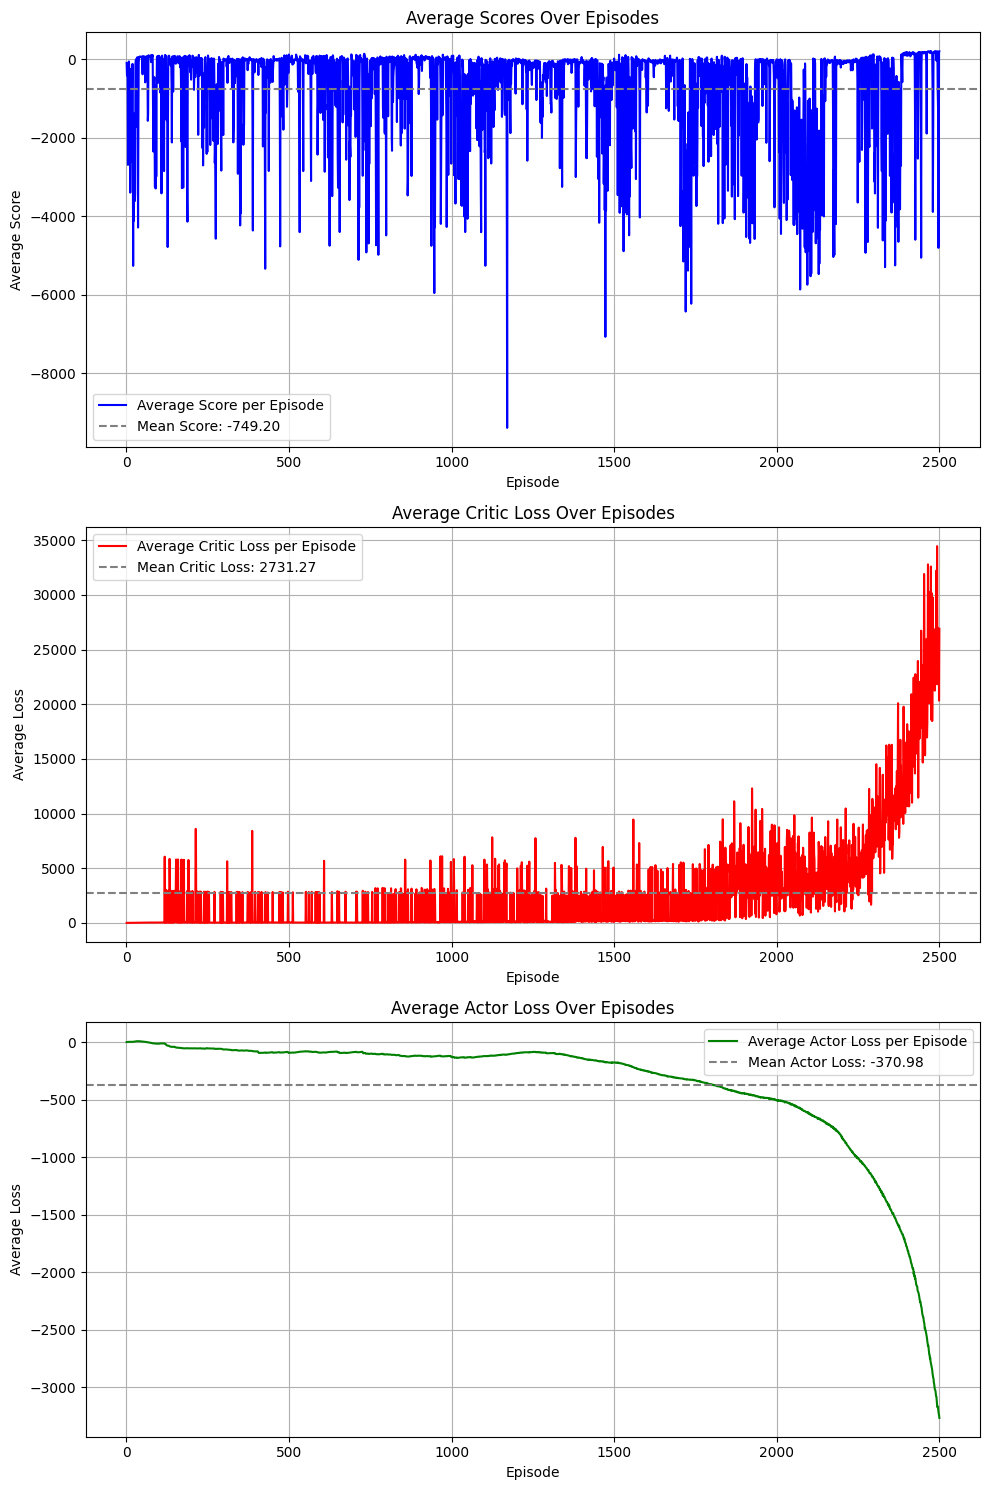

In [5]:
plot_training_results(training_data)

In [6]:
def plot_action_frequency_heatmap(actions):
    actions = np.array(actions)
    plt.figure(figsize=(10, 8))
    if actions.ndim > 1 and actions.shape[1] == 2:
        # Using a 2D histogram for two-dimensional actions
        plt.hist2d(actions[:, 0], actions[:, 1], bins=40, cmap='viridis', cmin=1)
        plt.colorbar(label='Frequency')
        plt.title('Joint Distribution of Left and Right Wheel Velocities')
        plt.xlabel('Left Wheel Velocity')
        plt.ylabel('Right Wheel Velocity')
        plt.grid(True)
        plt.show()
    else:
        # Fallback to a simple histogram if actions are not in the expected format
        sns.histplot(actions, bins=40, kde=True, color='blue')
        plt.title('Action Distribution')
        plt.xlabel('Action Value')
        plt.ylabel('Frequency')
        plt.show()

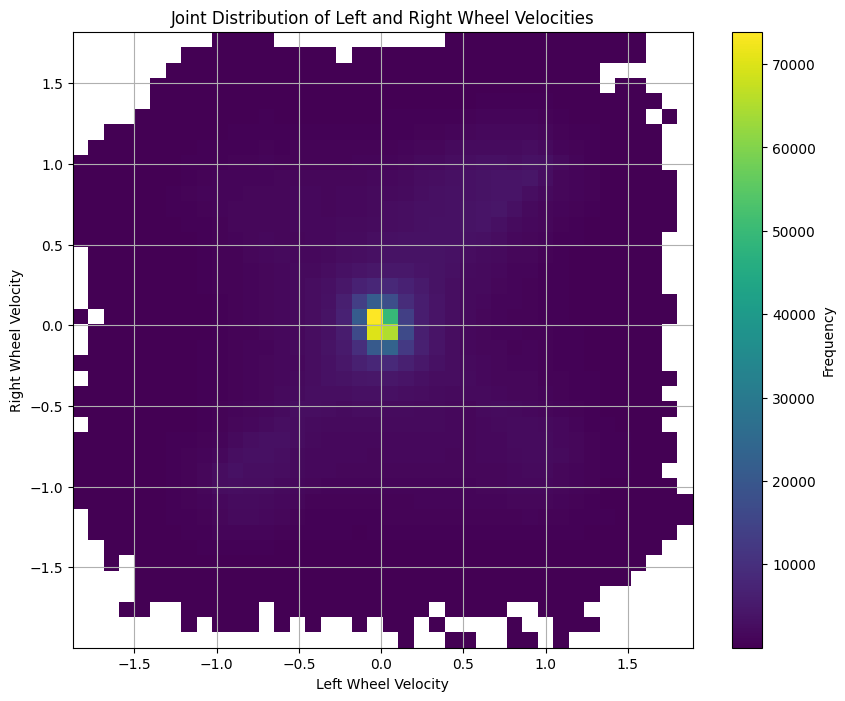

In [7]:

plot_action_frequency_heatmap(training_data['actions'])

In [8]:
def plot_state_transitions(states):
    states = np.array(states)
    plt.figure(figsize=(12, 10))
    if states.shape[1] >= 2:
        # Using the first two dimensions for x, y plotting
        plt.plot(states[:, 0], states[:, 1], 'r-', label='Path')
        plt.scatter(states[:, 0], states[:, 1], c=np.linspace(0, 1, len(states)), cmap='viridis', s=50, edgecolor='black', label='States over Time')
        plt.colorbar(label='Time Step')
        plt.title('Robot Path in Environment')
        plt.xlabel('X Position')
        plt.ylabel('Y Position')
        plt.grid(True)
        plt.legend()
        plt.show()
    else:
        plt.plot(states, np.arange(len(states)), 'r-', label='Path')
        plt.scatter(states, np.arange(len(states)), c=np.linspace(0, 1, len(states)), cmap='viridis', label='States over Time')
        plt.colorbar(label='Time Step')
        plt.title('State Transitions')
        plt.xlabel('State Dimension 1')
        plt.ylabel('State Dimension 2' if states.shape[1] >= 2 else 'Time Step')
        plt.grid(True)
        plt.legend()
        plt.show()

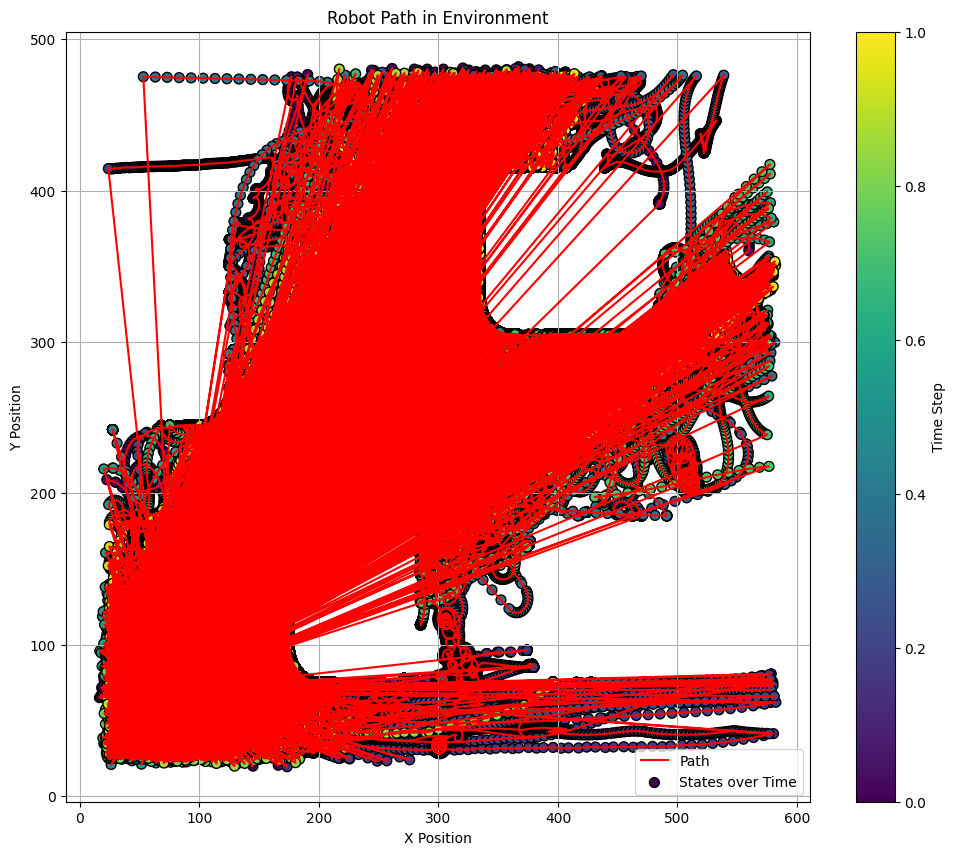

In [9]:
plot_state_transitions(training_data['states'])

Render mode 'rgb_array' works correctly.


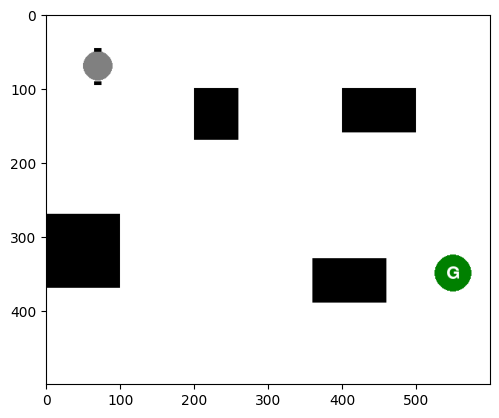

In [50]:
def test_render(env):
    env.reset()
    frame = env.render(mode='rgb_array')
    if frame is None:
        print("Render mode 'rgb_array' is not supported.")
    else:
        print("Render mode 'rgb_array' works correctly.")
        plt.imshow(frame)
        plt.show()

test_render(env) 

In [61]:
import os
import numpy as np
import imageio
from IPython.display import Image, display

def load_and_simulate(env, agent, n_episodes=5, max_steps=500, save_path='ddpg_trial_simulation.gif'):
    frames = []  # List to store frames
    
    for episode in range(n_episodes):
        state, info = env.reset()
        done = False
        steps = 0

        while not done and steps < max_steps:
            frame = env.render(mode='rgb_array')  # Capture the frame
            if frame is not None:
                frames.append(frame)  # Append the frame to the list

            action = agent.choose_action(state)
            state, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated
            steps += 1

        if steps >= max_steps:
            print(f"Episode {episode + 1} reached the maximum of {max_steps} steps.")
    
    env.close()
    
    # Save the frames as a GIF
    imageio.mimsave(save_path, frames, fps=30)  # Adjust fps to speed up or slow down the animation
    
    return save_path


In [62]:
def display_gif(path):
    with open(path, 'rb') as file:
        display(Image(file.read()))


In [70]:
def main():
    env = EscapeRoomEnv(max_steps_per_episode=500, goal=(550,350), delta= 6)
    n_actions = env.action_space.shape[0]
    input_dims = env.observation_space.shape

    # Parameters used during training, for consistency
    alpha = 0.0001
    beta = 0.001
    tau = 0.001
    fc1_dims = 400
    fc2_dims = 300

    agent = Agent(
        alpha=alpha,
        beta=beta,
        input_dims=input_dims,
        tau=tau,
        fc1_dims=fc1_dims,
        fc2_dims=fc2_dims,
        n_actions=n_actions,
        batch_size=64,  # Batch size might not be necessary for simulation but required for initialization
    )

    # Load models from the appropriate file paths
    agent.load_models()  # Ensure this matches your checkpoint saving logic or specify the paths if needed

    gif_path = load_and_simulate(env, agent, n_episodes=5, max_steps=500, save_path='ddpg_trial_simulation.gif')
    display_gif(gif_path)  # Display the GIF in the notebook

Goal 'G' reached in 97 steps with cumulative reward 11818.8938021239 for this episode.
Goal 'G' reached in 100 steps with cumulative reward 11792.77567879261 for this episode.
Goal 'G' reached in 101 steps with cumulative reward 11785.647968447844 for this episode.
Goal 'G' reached in 110 steps with cumulative reward 11713.378272232854 for this episode.


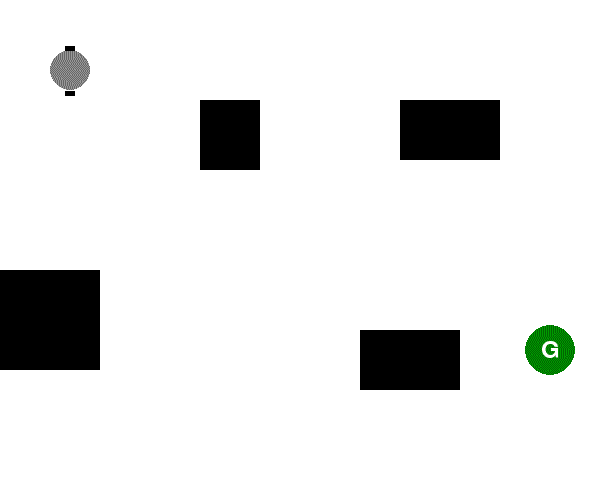

In [71]:
main()